In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
#Custom figures
import matplotlib 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
matplotlib.rc('font', size=18)

## 1. Import study data

In [3]:
ADNIMERGE = pd.read_csv("ADNIMERGE.csv",low_memory=False)
ADNIMERGE = ADNIMERGE[ADNIMERGE['VISCODE']=='bl']
ADNIMERGE.head()

RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl   AGE  \
0     2   ADNI1    ADNI1  011_S_0002    11      bl  2005-09-08    CN  74.3   
1     3   ADNI1    ADNI1  011_S_0003    11      bl  2005-09-12    AD  81.3   
5     4   ADNI1    ADNI1  022_S_0004    22      bl  2005-11-08  LMCI  67.5   
10    5   ADNI1    ADNI1  011_S_0005    11      bl  2005-09-07    CN  73.7   
15    6   ADNI1    ADNI1  100_S_0006   100      bl  2005-11-29  LMCI  80.4   

   PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  PIB  \
0      Male        16  Not Hisp/Latino    White  Married    0.0  1.33615  NaN   
1      Male        18  Not Hisp/Latino    White  Married    1.0  1.10860  NaN   
5      Male        10      Hisp/Latino    White  Married    0.0      NaN  NaN   
10     Male        16  Not Hisp/Latino    White  Married    0.0  1.25956  NaN   
15   Female        13  Not Hisp/Latino    White  Married    0.0      NaN  NaN   

    AV45  FBB  ABETA    TAU   PTAU  CDRSB  ADAS11  ADAS13  ADASQ4  MMSE  \
0    NaN  NaN    NaN    NaN    NaN    0.0   10.67   18.67     5.0  28.0   
1    NaN  NaN  741.5  239.7  22.83    4.5   22.00   31.00     8.0  20.0   
5    NaN  NaN   1501  153.1  13.29    1.0   14.33   21.33     6.0  27.0   
10   NaN  NaN  547.3    337  33.43    0.0    8.67   14.67     4.0  29.0   
15   NaN  NaN    NaN    NaN    NaN    0.5   18.67   25.67     7.0  25.0   

    RAVLT_immediate  RAVLT_learning  RAVLT_forgetting  RAVLT_perc_forgetting  \
0              44.0             4.0               6.0                54.5455   
1              22.0             1.0               4.0               100.0000   
5              37.0             7.0               4.0                36.3636   
10             37.0             4.0               4.0                44.4444   
15             30.0             1.0               5.0                83.3333   

    LDELTOTAL  DIGITSCOR  TRABSCOR   FAQ  MOCA  EcogPtMem  EcogPtLang  \
0        10.0       34.0     112.0   0.0   NaN        NaN         NaN   
1         2.0       25.0     148.0  10.0   NaN        NaN         NaN   
5         4.0       25.0     271.0   0.0   NaN        NaN         NaN   
10       12.0       38.0      90.0   0.0   NaN        NaN         NaN   
15        3.0       34.0     168.0   0.0   NaN        NaN         NaN   

    EcogPtVisspat  EcogPtPlan  EcogPtOrgan  EcogPtDivatt  EcogPtTotal  \
0             NaN         NaN          NaN           NaN          NaN   
1             NaN         NaN          NaN           NaN          NaN   
5             NaN         NaN          NaN           NaN          NaN   
10            NaN         NaN          NaN           NaN          NaN   
15            NaN         NaN          NaN           NaN          NaN   

    EcogSPMem  EcogSPLang  EcogSPVisspat  EcogSPPlan  EcogSPOrgan  \
0         NaN         NaN            NaN         NaN          NaN   
1         NaN         NaN            NaN         NaN          NaN   
5         NaN         NaN            NaN         NaN          NaN   
10        NaN         NaN            NaN         NaN          NaN   
15        NaN         NaN            NaN         NaN          NaN   

    EcogSPDivatt  EcogSPTotal      FLDSTRENG  \
0            NaN          NaN  1.5 Tesla MRI   
1            NaN          NaN  1.5 Tesla MRI   
5            NaN          NaN  1.5 Tesla MRI   
10           NaN          NaN  1.5 Tesla MRI   
15           NaN          NaN  1.5 Tesla MRI   

                                            FSVERSION  IMAGEUID  Ventricles  \
0   Cross-Sectional FreeSurfer (FreeSurfer Version...   35475.0    118233.0   
1   Cross-Sectional FreeSurfer (FreeSurfer Version...   32237.0     84599.0   
5   Cross-Sectional FreeSurfer (FreeSurfer Version...   64631.0     39605.0   
10  Cross-Sectional FreeSurfer (FreeSurfer Version...   32246.0     34062.0   
15  Cross-Sectional FreeSurfer (FreeSurfer Version...   33025.0     39826.0   

    Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp 

In [4]:
print("Number of rows: ", ADNIMERGE.shape[0])
print("Number of columns: ", ADNIMERGE.shape[1])

Number of rows:  2428
Number of columns:  116


## 2. EDA (Study Data)

### 2.1. Age distribution by diagnostic status in baseline

Diagnostic codes (in baseline):

- **CN**: controls
- **AD**: alzheimer's disease (dementia diagnostic)
- **LMCI**: late mild cognitive impairment
- **EMCI**: early mild cognitive impairment
- **SMC**: subjective memory concerns (it is considered cognitive normal)

In [5]:
ADNIMERGE['DX_bl'].unique()

array(['CN', 'AD', 'LMCI', 'SMC', 'EMCI', nan], dtype=object)

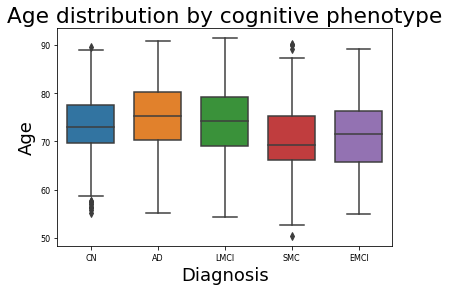

In [6]:
sns.boxplot( x=ADNIMERGE["DX_bl"], y=ADNIMERGE["AGE"], width=0.7);
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

#### Kruskal-Wallis Test

To compare the distributions, we have performed a **Kruskal-Wallis** test which is a non-parametric test and an alternative to one-way Anova. By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 

The hypothesese are: 
- **Null hypothesis (H0)**: the median is the same for all the data groups
- **Alternative hypothesis (Ha)**: the median is not equal for all data groups. 

In [7]:
#Import required package
from scipy import stats

In [8]:
#Count NAs
print("Number of missing values for the age: ", ADNIMERGE['AGE'].isna().sum())

Number of missing values for the age:  4


In [9]:
#drop rows with NANs as they are giving problems in the statistical analysis
ADNIMERGE = ADNIMERGE.dropna(subset = ['AGE'])
print("Number of missing values for the age: ", ADNIMERGE['AGE'].isna().sum())

Number of missing values for the age:  0


In [10]:
#Prepare data for statistical tests
CN_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='CN']['AGE'].values.tolist()
AD_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='AD']['AGE'].values.tolist()
LMCI_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='LMCI']['AGE'].values.tolist()
SMC_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='SMC']['AGE'].values.tolist()
EMCI_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='EMCI']['AGE'].values.tolist()

In [11]:
#Run Kruskal-Wallis test
KW_age = stats.kruskal(CN_age, AD_age, LMCI_age, SMC_age, EMCI_age)
print(KW_age)

KruskalResult(statistic=106.38929707080892, pvalue=4.283650979348773e-22)


The p-value is below 0.05 and thus, we can reject the null hypothesis, suggesting that the at least one of the groups do not have the same age distribution as the others.

#### Mann-Whitney Test

In addition, we can compare the distributions of each of the cognitive impairment groups with the controls using a **Mann-Whitney** test. This test is equivalent to the Kruskal-Wallis test, but compares only two grous at a time. 

In [12]:
#Mann-Whitney tests
print("Controls-SMC: ", stats.mannwhitneyu(CN_age,AD_age))
print("Controls-EMCI: ", stats.mannwhitneyu(CN_age,EMCI_age))
print("Controls-LMCI: ", stats.mannwhitneyu(CN_age,LMCI_age))
print("Controls-AD: ", stats.mannwhitneyu(CN_age,AD_age))

Controls-SMC:  MannwhitneyuResult(statistic=95390.0, pvalue=0.0002048873918692586)
Controls-EMCI:  MannwhitneyuResult(statistic=132295.0, pvalue=9.270313253534334e-06)
Controls-LMCI:  MannwhitneyuResult(statistic=174909.0, pvalue=0.08593701785458925)
Controls-AD:  MannwhitneyuResult(statistic=95390.0, pvalue=0.0002048873918692586)


We cannot reject the null hypothesis only for the LMCI group, where the p-value suggests that the two distributions are the same. 

In [13]:
#groupping all patients in the same group
noCN_age = ADNIMERGE[ADNIMERGE["DX_bl"]!='CN']['AGE'].values.tolist()
print("Controls-no controls: ", stats.mannwhitneyu(CN_age,noCN_age))

Controls-no controls:  MannwhitneyuResult(statistic=527537.0, pvalue=0.18847205346018037)


**Conclusion**: the age distribution is not the same in controls than in the different groups, except if we only consider two groups (healthy and patients with cognitive impairment). These results do not support a normalization based on the age of the controls. Nevertheless these tests should be repeated for the patients included in the batteries that are going to be used for the study. 

### 2.2. Gender distribution by diagnosis group

In [14]:
#calculate sum of values by group
df_sex = ADNIMERGE.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()
#df_sex

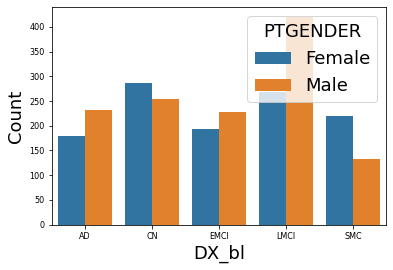

In [15]:
#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex)

plt.show()

### 2.3. Ethnic distribution by diagnosis group

In [16]:
#calculate sum of values by group
df_eth = ADNIMERGE.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()
#df_eth.head()

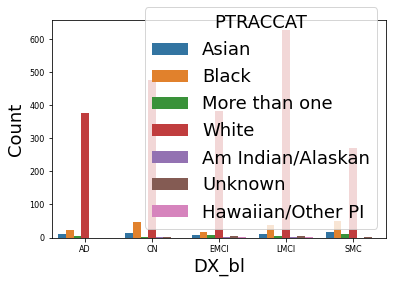

In [17]:
#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth)

plt.show()

## 3. Neurocognitive test batteries data inspection

First we are going to find how many patients -in baseline- have been administered with the three batteries (ADAS-cog, MMSE, MoCA).

### 3.1. Data import

#### ADAS-cog

In [18]:
#ADAS-cog (ADNIGO,2,3)
ADAS = pd.read_csv("Neuropsychological/ADAS_ADNIGO23.csv")
ADAS = ADAS[ADAS['VISCODE2']=='bl']
ADAS.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  \
5   ADNIGO  22  2002      48      bl       bl  2010-07-06  2011-02-28   
6   ADNIGO  24  2007      12      bl       bl  2010-07-07  2011-02-28   
7   ADNIGO  26  2010       1      bl       bl  2010-07-09  2011-02-28   
10  ADNIGO  32  2011      48      bl       bl  2010-07-21  2011-02-28   
13  ADNIGO  38  2003      48      bl       bl  2010-07-23  2011-02-28   

    WORDLIST  Q1UNABLE          Q1TR1                Q1TR2              Q1TR3  \
5        1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9  0:2:3:4:5:6:7:8:9   
6        1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9  0:2:3:4:5:6:7:8:9   
7        1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9    0:1:2:3:5:6:8:9   
10       1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9    0:1:2:3:4:5:8:9   
13       1.0       NaN        0:3:6:9        0:1:2:4:5:6:9    0:1:2:4:5:6:8:9   

    Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE     Q2TASK  Q2SCORE  \
5      NaN     NaN    NaN      1.0      NaN       NaN  1:2:3:4:5      0.0   
6      NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
7      NaN     NaN    NaN      2.0      NaN       NaN  1:2:3:4:5      0.0   
10     NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
13     NaN     NaN    NaN      4.0      NaN       NaN  1:2:3:4:5      0.0   

    Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  Q4UNABLE  \
5        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
6        NaN      1.0      1.0      1.0      2.0      1.0       NaN   
7        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
10       NaN      1.0      1.0      1.0      2.0      1.0       NaN   
13       NaN      1.0      1.0      1.0      2.0      1.0       NaN   

    TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
5         NaN  0:1:3:4:6:7:8:9      2.0       NaN   
6         NaN  0:1:2:4:5:6:7:8      2.0       NaN   
7         NaN    0:1:2:4:5:7:9      3.0       NaN   
10        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
13        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                       Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
5      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
6      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
7   1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
10  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
13     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

    Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
5       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
6       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
7       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
10      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
13      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

    Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
5        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
6        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
7        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
10       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
13       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

    Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
5        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
6        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
7        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
10       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
13       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0  

In [19]:
print("Number of subjects: ", len(ADAS['RID'].unique()))

Number of subjects:  1606


Count missing data

In [20]:
ADAS_columns = ["Q1SCORE","Q2SCORE","Q3SCORE","Q4SCORE","Q5SCORE","Q6SCORE","Q7SCORE",
          "Q8SCORE","Q9SCORE","Q10SCORE","Q11SCORE","Q12SCORE","Q13SCORE"]

for column in ADAS_columns:
    NullSum = ADAS[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", ADAS[ADAS_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(ADAS_columns) )

Q1SCORE: 3
Q2SCORE: 3
Q3SCORE: 3
Q4SCORE: 3
Q5SCORE: 5
Q6SCORE: 3
Q7SCORE: 4
Q8SCORE: 5
Q9SCORE: 4
Q10SCORE: 3
Q11SCORE: 3
Q12SCORE: 3
Q13SCORE: 8
Number of rows with missing values:  13
Total number of tests:  13


There are only 13 subjects that have missing data in any test. 

In [21]:
#Drop NaN
ADAS = ADAS.dropna(subset=ADAS_columns)
print("Number of subjects that have completed all tests: ", ADAS.shape[0])

Number of subjects that have completed all tests:  1593


#### MMSE

In [22]:
#MMSE (ADNI1,GO,2,3)
MMSE = pd.read_csv("Neuropsychological/MMSE.csv",low_memory=False)
MMSE = MMSE[MMSE['VISCODE2']=='sc']
MMSE.head()

Phase  ID  RID  SITEID VISCODE VISCODE2    USERDATE USERDATE2    EXAMDATE  \
0  ADNI1  10    2     107      sc       sc  2005-08-17       NaN  2005-08-17   
2  ADNI1  14    3     107      sc       sc  2005-08-18       NaN  2005-08-18   
3  ADNI1  16    4      10      sc       sc  2005-08-18       NaN  2005-08-18   
4  ADNI1  18    5     107      sc       sc  2005-08-23       NaN  2005-08-23   
6  ADNI1  22    7      10      sc       sc  2005-08-29       NaN  2005-08-25   

   MMDATE MMDATECM  MMYEAR MMYEARCM  MMMONTH   MMMNTHCM  MMDAY    MMDAYCM  \
0     1.0       17     1.0     2005      1.0     August    1.0  Wednesday   
2     2.0      IDK     1.0     2005      2.0  september    2.0        IDK   
3     1.0       18     1.0     2005      1.0     Agosto    1.0     Jueves   
4     1.0     23rd     1.0     2005      1.0     august    1.0    tuesday   
6     2.0       21     2.0     1975      1.0     Agosto    1.0     Jueves   

   MMSEASON MMSESNCM  MMHOSPIT          MMHOSPCM  MMFLOOR      MMFLRCM  \
0       1.0   Summer       1.0  Memory and Aging      1.0       ground   
2       2.0     fall       1.0            wash u      2.0          4th   
3       1.0   Verano       1.0             UPENN      1.0  primer piso   
4       1.0   summer       1.0               bjh      1.0          1st   
6       1.0   Verano       2.0             no se      1.0      primero   

   MMCITY   MMCITYCM  MMAREA     MMAREACM  MMSTATE MMSTCM  MMRECALL  MMBALL  \
0     1.0  St. Louis     1.0  Mississippi      1.0     MO       NaN     1.0   
2     1.0  st. louis     1.0  mississippi      1.0     mo       NaN     1.0   
3     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   
4     1.0  st. louis     1.0   misissippi      1.0     mo       NaN     1.0   
6     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   

   MMFLAG  MMTREE  MMTRIALS  MMD MMDLTR  MML MMLLTR  MMR MMRLTR  MMO MMOLTR  \
0     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
2     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  2.0      w   
3     1.0     1.0       1.0  1.0      o  1.0      d  1.0      n  1.0      u   
4     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
6     1.0     1.0       1.0  1.0      0  2.0     ND  2.0     ND  2.0     ND   

   MMW MMWLTR  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  \
0  1.0      w       2.0       1.0       2.0      1.0       1.0       1.0   
2  2.0     --       2.0       2.0       2.0      1.0       1.0       1.0   
3  1.0      m       1.0       2.0       2.0      1.0       1.0       1.0   
4  1.0      w       1.0       1.0       1.0      1.0       1.0       1.0   
6  1.0      m       2.0       2.0       2.0      1.0       1.0       1.0   

   MMHAND  MMFOLD  MMONFLR  MMREAD  MMWRITE  MMDRAW  MMSCORE  DONE MMLTR1  \
0     1.0     1.0      1.0     1.0      1.0     1.0     28.0   NaN    NaN   
2     1.0     1.0      1.0     1.0      1.0     1.0     20.0   NaN    NaN   
3     1.0     1.0      1.0     1.0      1.0     2.0     27.0   NaN    NaN   
4     2.0     1.0      1.0     1.0      1.0     1.0     29.0   NaN    NaN   
6     1.0     1.0      1.0     1.0      1.0     2.0     20.0   NaN    NaN   

  MMLTR2 MMLTR3 MMLTR4 MMLTR5 MMLTR6 MMLTR7  WORD1  WORD1DL  WORD2  WORD2DL  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
6    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   

   WORD3  WORD3DL  WORDLIST  WORLDSCORE DATE  SOURCE           update_stamp  
0    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-17 00:00:00.0  
2    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-18 00:00:00.0  
3    NaN      NaN       NaN        

In [23]:
print("Number of subjects: ", len(MMSE['RID'].unique()))

Number of subjects:  3470


In [24]:
#Count missing data
MMSE_columns = ["MMDATE","MMYEAR","MMMONTH","MMDAY","MMSEASON","MMHOSPIT","MMFLOOR",
          "MMCITY","MMAREA","MMSTATE","MMBALL","MMFLAG","MMTREE","MMD",
               "MML","MMR","MMO","MMW","MMBALLDL","MMFLAGDL","MMTREEDL","MMWATCH",
               "MMPENCIL","MMREPEAT","MMHAND","MMFOLD","MMONFLR","MMREAD","MMWRITE",
               "MMDRAW"]

for column in MMSE_columns:
    NullSum = MMSE[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")

print("Number of rows with missing values: ", MMSE[MMSE_columns].isna().any(axis=1).sum())

print("Total number of tests: ", len(MMSE_columns) )

MMDATE: 5
MMYEAR: 5
MMMONTH: 5
MMDAY: 5
MMSEASON: 5
MMHOSPIT: 5
MMFLOOR: 5
MMCITY: 5
MMAREA: 5
MMSTATE: 5
MMBALL: 1065
MMFLAG: 1065
MMTREE: 1065
MMD: 1065
MML: 1065
MMR: 1065
MMO: 1065
MMW: 1065
MMBALLDL: 1065
MMFLAGDL: 1065
MMTREEDL: 1065
MMWATCH: 5
MMPENCIL: 5
MMREPEAT: 5
MMHAND: 5
MMFOLD: 5
MMONFLR: 6
MMREAD: 5
MMWRITE: 5
MMDRAW: 5
Number of rows with missing values:  1065
Total number of tests:  30


There are 1605 patients that have missing data so maybe deleting all these rows is not the best strategy to deal with missing values. 

In [25]:
#Drop NaN
MMSE = MMSE.dropna(subset=MMSE_columns)
print("Number of subjects that have completed all tests: ", MMSE.shape[0])

Number of subjects that have completed all tests:  2405


#### MoCA

In [26]:
#MoCA (ADNIGO,2,3)
MOCA = pd.read_csv("Neuropsychological/MOCA.csv")
MOCA = MOCA[MOCA['VISCODE2']=='bl']
MOCA.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  TRAILS  \
5   ADNIGO  14  2002      48      bl       bl  2010-07-06  2010-08-31     1.0   
6   ADNIGO  16  2007      12      bl       bl  2010-07-07  2011-01-11     1.0   
7   ADNIGO  18  2010       1      bl       bl  2010-07-09  2010-07-23     1.0   
10  ADNIGO  24  2011      48      bl       bl  2010-07-21         NaN     1.0   
13  ADNIGO  30  2003      48      bl       bl  2010-07-23         NaN     1.0   

    CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  IMMT1W1  IMMT1W2  \
5    1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
6    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
7    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
10   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
13   0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   

    IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  IMMT2W4  IMMT2W5  \
5       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
10      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
13      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   

    DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  SERIAL4  SERIAL5  \
5      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7      1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
10     1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
13     1.0      1.0      0.0      1.0      0.0      0.0      0.0      0.0   

    REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  DELW2  DELW3  DELW4  \
5       1.0      1.0      30.0      1.0      1.0    2.0    1.0    2.0    1.0   
6       1.0      1.0      20.0      0.0      1.0    0.0    2.0    0.0    3.0   
7       1.0      1.0      18.0      1.0      1.0    1.0    1.0    0.0    0.0   
10      1.0      1.0      22.0      1.0      1.0    3.0    3.0    2.0    2.0   
13      1.0      1.0      14.0      1.0      1.0    2.0    1.0    0.0    2.0   

    DELW5  DATE  MONTH  YEAR  DAY  PLACE  CITY  MOCA MCDATE  SOURCE  \
5     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
6     0.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
7     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
10    2.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
13    1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   

             update_stamp  
5   2012-11-16 09:41:13.0  
6   2012-11-16 09:41:13.0  
7   2012-11-16 09:41:13.0  
10  2012-11-16 09:41:13.0  
13  2012-11-16 09:41:13.0

In [27]:
print("Number of subjects: ", len(MOCA['RID'].unique()))

Number of subjects:  1606


In [28]:
#Count missing data
MOCA_columns = MOCA.columns[8:-4].tolist()

for column in MOCA_columns:
    NullSum = MOCA[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", MOCA[MOCA_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(MOCA_columns) )

TRAILS: 5
CUBE: 6
CLOCKCON: 7
CLOCKNO: 8
CLOCKHAN: 9
LION: 6
RHINO: 6
CAMEL: 6
IMMT1W1: 8
IMMT1W2: 7
IMMT1W3: 11
IMMT1W4: 9
IMMT1W5: 8
IMMT2W1: 15
IMMT2W2: 11
IMMT2W3: 13
IMMT2W4: 13
IMMT2W5: 12
DIGFOR: 4
DIGBACK: 4
LETTERS: 8
SERIAL1: 7
SERIAL2: 7
SERIAL3: 9
SERIAL4: 10
SERIAL5: 11
REPEAT1: 4
REPEAT2: 5
FFLUENCY: 5
ABSTRAN: 6
ABSMEAS: 7
DELW1: 9
DELW2: 8
DELW3: 9
DELW4: 9
DELW5: 9
DATE: 4
MONTH: 4
YEAR: 4
DAY: 5
PLACE: 4
CITY: 5
Number of rows with missing values:  51
Total number of tests:  42


In [29]:
#Drop NaN
MOCA = MOCA.dropna(subset=MOCA_columns)
print("Number of subjects that have completed all tests: ", MOCA.shape[0])

Number of subjects that have completed all tests:  1555


There are 50 subjects that have missing data. 

#### Merged batteries

Merge the three test batteries (ADAS-cog, MMSE and MoCA).

In [30]:
df = pd.merge(pd.merge(ADAS,MMSE,on='RID'),MOCA,on='RID')
df.head()

Phase_x  ID_x   RID  SITEID_x VISCODE_x VISCODE2_x  USERDATE_x USERDATE2_x  \
0  ADNIGO    22  2002        48        bl         bl  2010-07-06  2011-02-28   
1  ADNIGO    24  2007        12        bl         bl  2010-07-07  2011-02-28   
2  ADNIGO    26  2010         1        bl         bl  2010-07-09  2011-02-28   
3  ADNIGO    32  2011        48        bl         bl  2010-07-21  2011-02-28   
4  ADNIGO    38  2003        48        bl         bl  2010-07-23  2011-02-28   

   WORDLIST_x  Q1UNABLE          Q1TR1                Q1TR2  \
0         1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9   
1         1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9   
2         1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9   
3         1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9   
4         1.0       NaN        0:3:6:9        0:1:2:4:5:6:9   

               Q1TR3  Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE  \
0  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      1.0      NaN       NaN   
1  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
2    0:1:2:3:5:6:8:9     NaN     NaN    NaN      2.0      NaN       NaN   
3    0:1:2:3:4:5:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
4    0:1:2:4:5:6:8:9     NaN     NaN    NaN      4.0      NaN       NaN   

      Q2TASK  Q2SCORE  Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  \
0  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
1  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
2  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
3  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
4  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   

   Q4UNABLE  TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
0       NaN        NaN  0:1:3:4:6:7:8:9      2.0       NaN   
1       NaN        NaN  0:1:2:4:5:6:7:8      2.0       NaN   
2       NaN        NaN    0:1:2:4:5:7:9      3.0       NaN   
3       NaN        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
4       NaN        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                      Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
0     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
1     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
2  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
3  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
4     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

   Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

   Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
0       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
1       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
2       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
3       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
4       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

   Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
0       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
1       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
2       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
3       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
4       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0   

In [31]:
print("Number of subjects with data for all batteries: ", df.shape[0])

Number of subjects with data for all batteries:  898


If we do not discard the rows that have missing values, the total number of patients in the merged table would be 1605. All of them will be patients with information for the 3 batteries -although not necessarily all test completed-.

### 3.2. EDA

In [32]:
def table_1(df, variables_ls): 
    
    columns = ['CN_median', 'CN_Q1', 'CN_Q3', 'MCI_median', 'MCI_Q1', 'MCI_Q3',
              'AD_median', 'AD_Q1', 'AD_Q3'] #columns
    
    dx_ls = ['CN', 'MCI', 'AD']
    
    table = pd.DataFrame(columns = columns, index = variables_ls) #create table 1
    
    for variable in variables_ls:
        for dx in dx_ls: 
            df_dx = df[df['DX_bl']==dx] #filter dataframe by diagnostic group
            #Median (Q2)
            median_col = dx + '_median'
            table.loc[variable, median_col] = np.quantile(df_dx[variable], 0.5)
            #Q1
            Q1_col = dx + '_Q1'
            table.loc[variable, Q1_col] = np.quantile(df_dx[variable], 0.25)
            #Q3
            Q3_col = dx + '_Q3'
            table.loc[variable, Q3_col] = np.quantile(df_dx[variable], 0.75)
    
    return table

C:\Users\anaso\AppData\Local\Temp\ipykernel_13652\4222530680.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_ADNIMERGE = pd.merge(df,ADNIMERGE,on='RID')


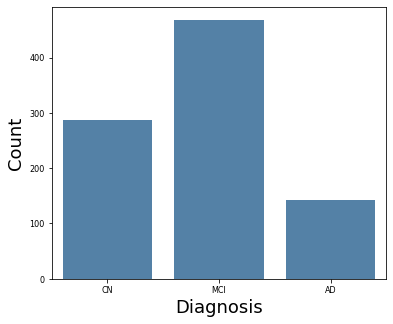

In [33]:
#Diagnosis bar plot
df_ADNIMERGE = pd.merge(df,ADNIMERGE,on='RID')

df_ADNIMERGE_groupped = df_ADNIMERGE.copy()
df_ADNIMERGE_groupped['DX_bl'] = df_ADNIMERGE['DX_bl'].replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

#calculate sum of values by group
df_dx = df_ADNIMERGE_groupped.groupby(['DX_bl']).agg(Count=("RID", 'count'))
df_dx = df_dx.reset_index()

#print barplot
fig = plt.figure(figsize=(6,5))

sns.barplot(x="DX_bl",
           y="Count",
           data=df_dx,
           color='steelblue',
           order=["CN","MCI","AD"])

plt.xlabel("Diagnosis")
plt.ylabel("Count")

plt.show()

In [34]:
import warnings
warnings.filterwarnings('ignore')

#Count number of instances in each group
df_CN = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='CN'],on='RID')
df_MCI = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='MCI'],on='RID')
df_AD = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='AD'],on='RID')

print("Number of controls: ", df_CN.shape[0])
print("Number of MCI subjects: ", df_MCI.shape[0])
print("Number of AD subjects: ", df_AD.shape[0])

Number of controls:  288
Number of MCI subjects:  468
Number of AD subjects:  142


#### Age distribution

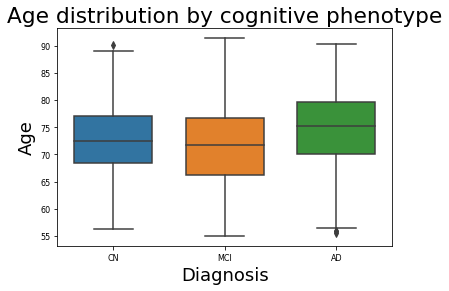

In [35]:
#Age Distribution 

sns.boxplot(x=df_ADNIMERGE_groupped["DX_bl"], y=df_ADNIMERGE["AGE"], width=0.7,
           order=["CN","MCI","AD"])
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

#### Kruskal-Wallis test

In [36]:
#Kruskal-Wallis test
KW_age = stats.kruskal(df_CN['AGE'].values.tolist(), df_MCI['AGE'].values.tolist(), df_AD['AGE'].values.tolist())
KW_age

KruskalResult(statistic=18.92772829201439, pvalue=7.760612946005333e-05)

#### Mann-Whitney tests

In [37]:
#Mann-Whitney tests
print("Controls-MCI: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_MCI['AGE'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_AD['AGE'].values.tolist()))

Controls-MCI:  MannwhitneyuResult(statistic=74409.5, pvalue=0.016107078598488866)
Controls-AD:  MannwhitneyuResult(statistic=17240.0, pvalue=0.008130636399248574)


These results indicate that the MCI group does not have the same age distribution than the controls. Thus, it does not supports a normalization based on age. 

#### Shapiro-Wilk test for normality

In [38]:
#Shapiro-Wilk test for normality
print("Controls: ", stats.shapiro(df_CN['AGE'].values.tolist()))
print("MCI: ", stats.shapiro(df_MCI['AGE'].values.tolist()))
print("AD: ", stats.shapiro(df_AD['AGE'].values.tolist()))

Controls:  ShapiroResult(statistic=0.9843282699584961, pvalue=0.003074418054893613)
MCI:  ShapiroResult(statistic=0.9916391968727112, pvalue=0.009754721075296402)
AD:  ShapiroResult(statistic=0.9782914519309998, pvalue=0.02337193489074707)


They do not follow a normal distribution

#### Sex distribution

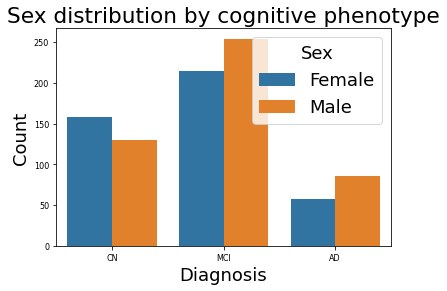

In [39]:
#Sex distribution

#calculate sum of values by group
df_sex = df_ADNIMERGE_groupped.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex,
           order=["CN","MCI","AD"])

plt.title("Sex distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Sex')

plt.show()

In [40]:
contingency_sex = pd.crosstab(df_ADNIMERGE_groupped['DX_bl'], df_ADNIMERGE_groupped['PTGENDER'])

# Chi-square test of independence. 
c, p, dof, expected = stats.chi2_contingency(contingency_sex)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.007083203220009745


#### Ethnicity distribution

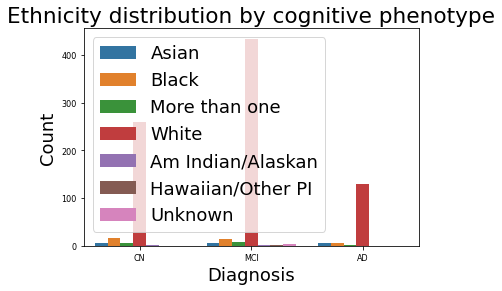

In [41]:
#Ethnic distribution

#calculate sum of values by group
df_eth = df_ADNIMERGE_groupped.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth,
           order=["CN","MCI","AD"])

plt.title("Ethnicity distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Ethnic group')
plt.legend(loc='upper left')

plt.show()

In [42]:
contingency_eth = pd.crosstab(df_ADNIMERGE_groupped['DX_bl'], df_ADNIMERGE_groupped['PTRACCAT'])

# Chi-square test of independence. 
c, p, dof, expected = stats.chi2_contingency(contingency_eth)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.40401720584313067


#### Years of education distribution

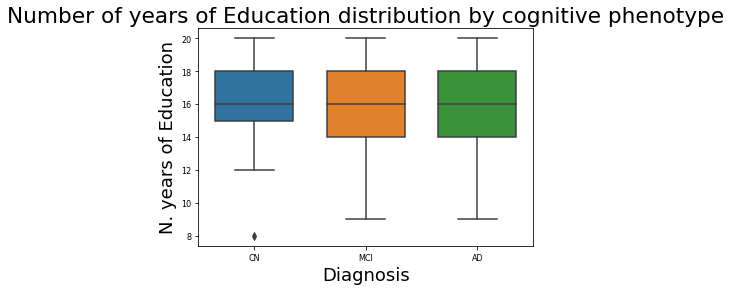

In [43]:
#Age Distribution 

sns.boxplot(x=df_ADNIMERGE_groupped["DX_bl"], y=df_ADNIMERGE_groupped["PTEDUCAT"], width=0.7,
           order=["CN","MCI","AD"])

plt.title("Number of years of Education distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("N. years of Education")
plt.show()

#### Kruskal-Wallis test

In [44]:
#Kruskal-Wallis test
KW_ed = stats.kruskal(df_CN['PTEDUCAT'].values.tolist(), df_MCI['PTEDUCAT'].values.tolist(), df_AD['PTEDUCAT'].values.tolist())
KW_ed

KruskalResult(statistic=9.896557267476583, pvalue=0.007095612570655553)

#### Mann-Whitney tests

In [45]:
#Mann-Whitney tests
print("Controls-MCI: ", stats.mannwhitneyu(df_CN['PTEDUCAT'].values.tolist(),df_MCI['PTEDUCAT'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['PTEDUCAT'].values.tolist(),df_AD['PTEDUCAT'].values.tolist()))

Controls-MCI:  MannwhitneyuResult(statistic=73997.5, pvalue=0.021741205962535988)
Controls-AD:  MannwhitneyuResult(statistic=23998.0, pvalue=0.0029532980234029554)


These results indicate that the MCI group does not have the same age distribution than the controls.

#### Shapiro-Wilk test for normality

In [46]:
#Shapiro-Wilk test for normality
print("Controls: ", stats.shapiro(df_CN['PTEDUCAT'].values.tolist()))
print("MCI: ", stats.shapiro(df_MCI['PTEDUCAT'].values.tolist()))
print("AD: ", stats.shapiro(df_AD['PTEDUCAT'].values.tolist()))

Controls:  ShapiroResult(statistic=0.9217047095298767, pvalue=3.799967285278427e-11)
MCI:  ShapiroResult(statistic=0.9340997338294983, pvalue=1.6230387259869028e-13)
AD:  ShapiroResult(statistic=0.9455486536026001, pvalue=2.3768745450070128e-05)


The education level does not follow a normal distribution. 

#### Table 1

In research, especially in medical research, we describe characteristics of our study populations through Table 1. Table 1 contains information about the mean for continue/scale variable, and proportion for a categorical variable. 

In [47]:
variables_ls = ['AGE', 'PTEDUCAT', 'CDRSB_bl', 'ADAS13_bl', 'MMSE_bl', 'MOCA_bl']
table_1(df_ADNIMERGE_groupped, variables_ls)

CN_median   CN_Q1   CN_Q3 MCI_median  MCI_Q1  MCI_Q3 AD_median  \
AGE            72.5  68.375  77.025      71.65  66.225  76.725     75.25   
PTEDUCAT       16.0    15.0    18.0       16.0    14.0    18.0      16.0   
CDRSB_bl        0.0     0.0     0.0        1.5     1.0     2.0       4.5   
ADAS13_bl       9.0     6.0    12.0       14.0    9.75    19.0      30.5   
MMSE_bl        29.0    29.0    30.0       28.0    27.0    29.0      23.0   
MOCA_bl        26.0    24.0    28.0       23.0    21.0    26.0      18.0   

            AD_Q1 AD_Q3  
AGE        70.175  79.6  
PTEDUCAT     14.0  18.0  
CDRSB_bl      3.5   5.5  
ADAS13_bl    25.0  36.0  
MMSE_bl      21.0  25.0  
MOCA_bl      14.0  20.0

## 4. DATA PREPROCESSING

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
def group_by_test(metadata, df):
    """Function to group the scores measuring the same functions"""

    test_ls = metadata['Label'].unique()
    
    #Iterate each test
    for test in test_ls:
        variable_ls = metadata[metadata['Label']==test]['ADNI column'].tolist()
        df[test] = df[variable_ls].sum(axis=1)
        
    return df

#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

In [50]:
def zscores_means(X, dx, metadata_path):
    """Function to generate a table with the means by cognitive domain and diagnostic group"""
    #Compute the test means
    means_df = X.mean(axis=0).to_frame()
    means_df.columns = ["Mean"]
    means_df['Label'] = means_df.index

    #Import the test-cognitive domain relations    
    metadata = pd.read_csv(metadata_path, sep=";", 
                            usecols = ['Label', 'Cognitive Domain'])

    means_df = means_df.join(metadata.set_index('Label'))[['Cognitive Domain', 'Mean']]

    #Compute NC domain means
    means_df = means_df.groupby(['Cognitive Domain'])['Mean'].mean().to_frame()
    means_df.reset_index(inplace=True)

    #Add diagnostic group
    means_df["Diagnostic"] = dx
    
    return(means_df)

### 4.1. ADAS-Cog

In [51]:
#group variables by cognitive test
metadata_path = "./NC_Tests/ADAS_Metadata.csv"
ADAS_metadata = pd.read_csv(metadata_path, sep=";")
ADAS = group_by_test(ADAS_metadata, ADAS)
#get test results for the controls
ADAS_CN = ADAS[ADAS.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", ADAS_CN.shape[0])

Number of controls:  311


#### Control data

In [52]:
#filter table to show only tests results
ADAS_columns = ADAS_metadata['Label'].unique()
ADAS_CN = ADAS_CN[ADAS_columns]
ADAS_CN.head()

Q1_WR  Q2_Comm  Q3_CP  Q4_DWR  Q5_NT  Q6_IP  Q7_O  Q8_WRT  Q9_RTI  \
484    2.0      0.0    1.0     2.0    0.0    0.0   0.0     3.0     0.0   
489    4.0      0.0    0.0     3.0    0.0    0.0   0.0     2.0     0.0   
494    1.0      0.0    0.0     2.0    0.0    0.0   0.0     1.0     0.0   
507    2.0      0.0    0.0     1.0    0.0    0.0   1.0     0.0     0.0   
508    5.0      0.0    0.0     6.0    0.0    0.0   0.0     4.0     0.0   

     Q10_Comp  Q11_WFD  Q12_SL  Q13_NC  
484       0.0      0.0     0.0     0.0  
489       0.0      0.0     0.0     1.0  
494       0.0      0.0     0.0     0.0  
507       0.0      0.0     0.0     1.0  
508       0.0      0.0     0.0     1.0

In [53]:
#Control statistics
ADAS_CN.describe()

Q1_WR     Q2_Comm       Q3_CP      Q4_DWR       Q5_NT       Q6_IP  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean     2.842347    0.067524    0.398714    2.681672    0.054662    0.070740   
std      1.308845    0.357329    0.552296    1.846955    0.227686    0.280804   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
50%      3.000000    0.000000    0.000000    2.000000    0.000000    0.000000   
75%      4.000000    0.000000    1.000000    4.000000    0.000000    0.000000   
max      6.670000    5.000000    2.000000   10.000000    1.000000    2.000000   

             Q7_O      Q8_WRT      Q9_RTI    Q10_Comp     Q11_WFD      Q12_SL  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean     0.096463    1.926045    0.016077    0.012862    0.045016    0.019293   
std      0.326793    1.888248    0.149403    0.112860    0.236710    0.159477   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    3.000000    0.000000    0.000000    0.000000    0.000000   
max      3.000000   12.000000    2.000000    1.000000    2.000000    2.000000   

           Q13_NC  
count  311.000000  
mean     0.389068  
std      0.686090  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      5.000000

#### Fit the scaler with the controls data

In [54]:
scaler = StandardScaler()
scaler.fit(ADAS_CN)

StandardScaler()

#### Transform data

In [55]:
ADAS_DX = pd.merge(ADAS,ADNIMERGE,on='RID')

X_ADAS = ADAS_DX[ADAS_columns] #tests scores
Y_ADAS = pd.DataFrame(ADAS_DX["DX_bl"]) #diagnosis

#scale data
X_ADAS = scaler.transform(X_ADAS)

#Convert into pandas dataframe
X_ADAS = pd.DataFrame(X_ADAS,columns=ADAS_columns)
X_ADAS.head()

Q1_WR   Q2_Comm     Q3_CP    Q4_DWR     Q5_NT     Q6_IP      Q7_O  \
0 -1.409881 -0.189274 -0.723084 -0.369674 -0.240464 -0.252324 -0.295656   
1  0.120646 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   
2 -0.644618 -0.189274 -0.723084  0.172631 -0.240464 -0.252324 -0.295656   
3  0.120646 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   
4  0.885910 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   

     Q8_WRT    Q9_RTI  Q10_Comp   Q11_WFD    Q12_SL    Q13_NC  
0 -0.491216 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
1  0.569674 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
2 -0.491216 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
3 -1.021661 -0.107783 -0.114146 -0.190481 -0.121169  0.891891  
4  0.569674 -0.107783 -0.114146 -0.190481 -0.121169  0.891891

#### Divide data by diagnostic group

In [56]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  659
Number of instances MCI:  699
Number of instances AD:  219


#### Plot z-scores by domain

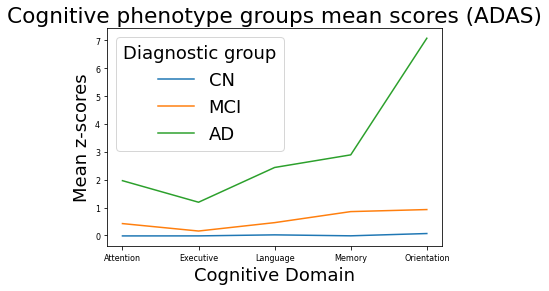

In [57]:
#Compute zscores means for each cognitive domain by diagnostic group
ADAS_means_CN = zscores_means(X_ADAS_CN, "CN", metadata_path)
ADAS_means_MCI = zscores_means(X_ADAS_MCI, "MCI", metadata_path)
ADAS_means_AD = zscores_means(X_ADAS_AD, "AD", metadata_path)

#Concanetate all dataframes
ADAS_means_df = pd.concat([ADAS_means_CN, ADAS_means_MCI, ADAS_means_AD])
ADAS_means_df.index = range(len(ADAS_means_df))

#plot dataframe
sns.lineplot(data=ADAS_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (ADAS)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.2. MMSE

In [58]:
#group variables by cognitive test
metadata_path = "./NC_Tests/MMSE_Metadata.csv"
MMSE_metadata = pd.read_csv(metadata_path, sep=";")
MMSE = group_by_test(MMSE_metadata, MMSE)
#get test results for the controls
MMSE_CN = MMSE[MMSE.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MMSE_CN.shape[0])

Number of controls:  417


In [59]:
#filter table to show only tests results
MMSE_columns = MMSE_metadata['Label'].unique()
MMSE_CN = MMSE_CN[MMSE_columns]
MMSE_CN.head()

MM1_OT  MM2_OP  MM3_Reg  MM4_SB  MM5_RR  MM6_NCO  MM7_Rep  MM8_CI  \
0      5.0     5.0      3.0     5.0     5.0      2.0      1.0     3.0   
4      5.0     5.0      3.0     5.0     3.0      2.0      1.0     4.0   
7      5.0     5.0      3.0     5.0     5.0      2.0      1.0     3.0   
10     5.0     5.0      3.0     5.0     4.0      2.0      1.0     3.0   
11     6.0     5.0      3.0     5.0     4.0      2.0      1.0     3.0   

    MM9_Read  MM10_Write  MM11_Draw  
0        1.0         1.0        1.0  
4        1.0         1.0        1.0  
7        1.0         1.0        1.0  
10       1.0         1.0        1.0  
11       1.0         1.0        1.0

In [60]:
#Control summary statistics
MMSE_CN.describe()

MM1_OT      MM2_OP     MM3_Reg      MM4_SB      MM5_RR     MM6_NCO  \
count  417.000000  417.000000  417.000000  417.000000  417.000000  417.000000   
mean     5.103118    5.124700    3.004796    5.167866    3.280576    2.002398   
std      0.312273    0.337965    0.069171    0.588858    0.532981    0.048970   
min      5.000000    5.000000    3.000000    5.000000    3.000000    2.000000   
25%      5.000000    5.000000    3.000000    5.000000    3.000000    2.000000   
50%      5.000000    5.000000    3.000000    5.000000    3.000000    2.000000   
75%      5.000000    5.000000    3.000000    5.000000    3.000000    2.000000   
max      7.000000    7.000000    4.000000    9.000000    6.000000    3.000000   

          MM7_Rep      MM8_CI  MM9_Read  MM10_Write   MM11_Draw  
count  417.000000  417.000000     417.0  417.000000  417.000000  
mean     1.091127    3.074341       1.0    1.007194    1.071942  
std      0.288135    0.262639       0.0    0.084615    0.258703  
min      1.000000    3.000000       1.0    1.000000    1.000000  
25%      1.000000    3.000000       1.0    1.000000    1.000000  
50%      1.000000    3.000000       1.0    1.000000    1.000000  
75%      1.000000    3.000000       1.0    1.000000    1.000000  
max      2.000000    4.000000       1.0    2.000000    2.000000

#### Fit the scaler with the controls data

In [61]:
scaler = StandardScaler()

scaler.fit(MMSE_CN)

StandardScaler()

#### Transform data

In [62]:
MMSE_DX = pd.merge(MMSE,ADNIMERGE,on='RID')

X_MMSE = MMSE_DX[MMSE_columns] #tests scores
Y_MMSE = pd.DataFrame(MMSE_DX["DX_bl"]) #diagnosis

#scale data
X_MMSE = scaler.transform(X_MMSE)


#Convert into pandas dataframe
X_MMSE = pd.DataFrame(X_MMSE,columns=MMSE_columns)
X_MMSE.head()

MM1_OT    MM2_OP   MM3_Reg    MM4_SB    MM5_RR   MM6_NCO   MM7_Rep  \
0  -0.330613 -0.369417 -0.069421 -0.285413  3.229926 -0.049029 -0.316645   
1  12.494087  2.593025 -0.069421  3.115074  5.108419 -0.049029 -0.316645   
2  -0.330613 -0.369417 -0.069421 -0.285413  3.229926 -0.049029 -0.316645   
3  -0.330613 -0.369417 -0.069421 -0.285413 -0.527059 -0.049029 -0.316645   
4   6.081737  2.593025 -0.069421  4.815317  5.108419 -0.049029 -0.316645   

     MM8_CI  MM9_Read  MM10_Write  MM11_Draw  
0 -0.283392       0.0   -0.085126  -0.278423  
1 -0.283392       0.0   -0.085126  -0.278423  
2 -0.283392       0.0   -0.085126   3.591657  
3  3.528684       0.0   -0.085126  -0.278423  
4 -0.283392       0.0   -0.085126   3.591657

#### Divide data by diagnostic group

In [63]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  878
Number of instances AD:  339


#### Plot z-scores by domain

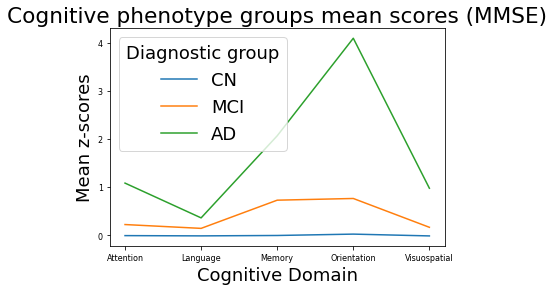

In [64]:
MMSE_means_CN = zscores_means(X_MMSE_CN, "CN", metadata_path)
MMSE_means_MCI = zscores_means(X_MMSE_MCI, "MCI", metadata_path)
MMSE_means_AD = zscores_means(X_MMSE_AD, "AD", metadata_path)

#Concanetate all dataframes
MMSE_means_df = pd.concat([MMSE_means_CN, MMSE_means_MCI, MMSE_means_AD])
MMSE_means_df.index = range(len(MMSE_means_df))

#plot dataframe
sns.lineplot(data=MMSE_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MMSE)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.3. MOCA

In [65]:
#group variables by cognitive test
metadata_path = "./NC_Tests/MOCA_Metadata.csv"
MOCA_metadata = pd.read_csv(metadata_path, sep=";")
MOCA = group_by_test(MOCA_metadata, MOCA)
#get test results for the controls
MOCA_CN = MOCA[MOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MOCA_CN.shape[0])

Number of controls:  306


In [66]:
#filter table to show only tests results
MOCA_columns = MOCA_metadata['Label'].unique()
MOCA_CN = MOCA_CN[MOCA_columns]
MOCA_CN.head()

Mo1_TMK  Mo2_CC  Mo3_Drawing  Mo4_Naming  Mo5_WRT1  Mo6_WRT2  Mo7_DSF  \
484      1.0     0.0          2.0         2.0       4.0       5.0      1.0   
489      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
494      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
507      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
508      1.0     1.0          3.0         3.0       4.0       4.0      0.0   

     Mo8_DSB  Mo9_SA  Mo10_Serial  Mo11_Rep  Mo12_VF  Mo13_Abs  Mo14_DWR  \
484      1.0     0.0          2.0       2.0     17.0       1.0       5.0   
489      0.0     0.0          5.0       2.0     15.0       2.0      14.0   
494      1.0     0.0          5.0       2.0     22.0       2.0      11.0   
507      1.0     0.0          5.0       1.0     20.0       2.0       5.0   
508      1.0     0.0          5.0       2.0     13.0       2.0      15.0   

     Mo15_OT  Mo16_OP  
484      4.0      2.0  
489      4.0      2.0  
494      4.0      2.0  
507      4.0      2.0  
508      4.0      2.0

In [67]:
#Control summary statistics
MOCA_CN.describe()

Mo1_TMK      Mo2_CC  Mo3_Drawing  Mo4_Naming    Mo5_WRT1  \
count  306.000000  306.000000   306.000000  306.000000  306.000000   
mean     0.921569    0.705882     2.745098    2.911765    4.718954   
std      0.269290    0.456391     0.499566    0.284101    0.566352   
min      0.000000    0.000000     0.000000    2.000000    2.000000   
25%      1.000000    0.000000     3.000000    3.000000    5.000000   
50%      1.000000    1.000000     3.000000    3.000000    5.000000   
75%      1.000000    1.000000     3.000000    3.000000    5.000000   
max      1.000000    1.000000     3.000000    3.000000    5.000000   

         Mo6_WRT2     Mo7_DSF     Mo8_DSB      Mo9_SA  Mo10_Serial  \
count  306.000000  306.000000  306.000000  306.000000   306.000000   
mean     4.898693    0.960784    0.934641    0.209150     4.594771   
std      0.435549    0.194426    0.247564    0.568617     0.860331   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      5.000000    1.000000    1.000000    0.000000     5.000000   
50%      5.000000    1.000000    1.000000    0.000000     5.000000   
75%      5.000000    1.000000    1.000000    0.000000     5.000000   
max      5.000000    1.000000    1.000000    5.000000     5.000000   

         Mo11_Rep     Mo12_VF    Mo13_Abs    Mo14_DWR     Mo15_OT     Mo16_OP  
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000  
mean     1.745098   14.725490    1.846405    7.450980    3.954248    1.986928  
std      0.506086    4.786916    0.412036    2.668434    0.209288    0.113769  
min      0.000000    1.000000    0.000000    0.000000    3.000000    1.000000  
25%      2.000000   11.250000    2.000000    5.000000    4.000000    2.000000  
50%      2.000000   15.000000    2.000000    7.000000    4.000000    2.000000  
75%      2.000000   18.000000    2.000000    9.000000    4.000000    2.000000  
max      2.000000   28.000000    2.000000   15.000000    4.000000    2.000000

#### Fit the scaler with the controls data

In [68]:
scaler = StandardScaler()

scaler.fit(MOCA_CN)

StandardScaler()

#### Transform data

In [69]:
MOCA_DX = pd.merge(MOCA,ADNIMERGE,on='RID')

X_MOCA = MOCA_DX[MOCA_columns] #tests scores
Y_MOCA = pd.DataFrame(MOCA_DX["DX_bl"]) #diagnosis

#scale data
X_MOCA = scaler.transform(X_MOCA)

#Convert into pandas dataframe
X_MOCA = pd.DataFrame(X_MOCA,columns=MOCA_columns)
X_MOCA.head()

Mo1_TMK    Mo2_CC  Mo3_Drawing  Mo4_Naming  Mo5_WRT1  Mo6_WRT2   Mo7_DSF  \
0  0.29173  0.645497     0.511083    0.311086  0.497052  0.232977  0.202031   
1  0.29173 -1.549193     0.511083    0.311086  0.497052  0.232977  0.202031   
2  0.29173 -1.549193     0.511083    0.311086  0.497052  0.232977  0.202031   
3  0.29173  0.645497     0.511083    0.311086  0.497052  0.232977  0.202031   
4  0.29173 -1.549193     0.511083    0.311086  0.497052  0.232977  0.202031   

    Mo8_DSB    Mo9_SA  Mo10_Serial  Mo11_Rep   Mo12_VF  Mo13_Abs  Mo14_DWR  \
0  0.264443  1.393107     0.471787  0.504498  3.196114  0.373381 -0.169282   
1  0.264443  1.393107     0.471787  0.504498  1.103665 -2.057565 -0.920013   
2  0.264443 -0.368425     0.471787  0.504498  0.685175  0.373381 -1.670744   
3  0.264443 -0.368425     0.471787  0.504498  1.522155  0.373381  1.707545   
4  0.264443 -0.368425    -4.185203  0.504498 -0.151805  0.373381 -0.544648   

    Mo15_OT   Mo16_OP  
0  0.218964  0.115087  
1  0.218964  0.115087  
2  0.218964  0.115087  
3  0.218964  0.115087  
4  0.218964  0.115087

#### Plot z-scores by domain

#### Divide data by diagnostic group

In [70]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  645
Number of instances MCI:  684
Number of instances AD:  212


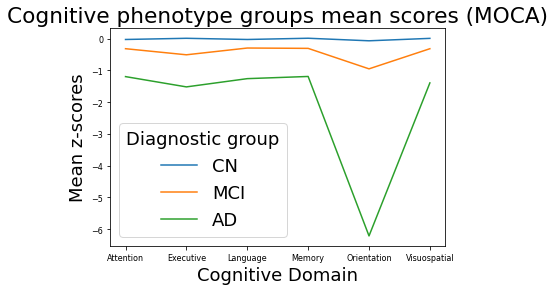

In [71]:
#Compute zscores means for each cognitive domain by diagnostic group
MOCA_means_CN = zscores_means(X_MOCA_CN, "CN", metadata_path)
MOCA_means_MCI = zscores_means(X_MOCA_MCI, "MCI", metadata_path)
MOCA_means_AD = zscores_means(X_MOCA_AD, "AD", metadata_path)

#Concanetate all dataframes
MOCA_means_df = pd.concat([MOCA_means_CN, MOCA_means_MCI, MOCA_means_AD])
MOCA_means_df.index = range(len(MOCA_means_df))

#plot dataframe
sns.lineplot(data=MOCA_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MOCA)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.4. Merged data

In [72]:
#group variables by cognitive test
metadata_path = "./NC_Tests/merged_Metadata.csv"
merged_metadata = pd.read_csv(metadata_path, sep=";")
merged = group_by_test(merged_metadata, df)
#get test results for the controls
merged_CN = merged[merged.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", merged_CN.shape[0])

Number of controls:  184


In [73]:
#filter table to show only tests results
merged_columns = merged_metadata['Label'].unique()
merged_CN = merged_CN[merged_columns]
merged_CN.head()

Q1_WR  Q2_Comm  Q3_CP  Q4_DWR  Q5_NT  Q6_IP  Q7_O  Q8_WRT  Q9_RTI  \
127    2.0      0.0    1.0     2.0    0.0    0.0   0.0     3.0     0.0   
129    4.0      0.0    0.0     3.0    0.0    0.0   0.0     2.0     0.0   
131    1.0      0.0    0.0     2.0    0.0    0.0   0.0     1.0     0.0   
137    2.0      0.0    0.0     1.0    0.0    0.0   1.0     0.0     0.0   
138    5.0      0.0    0.0     6.0    0.0    0.0   0.0     4.0     0.0   

     Q10_Comp  Q11_WFD  Q12_SL  Q13_NC  MM1_OT  MM2_OP  MM3_Reg  MM4_SB  \
127       0.0      0.0     0.0     0.0     5.0     5.0      3.0     5.0   
129       0.0      0.0     0.0     1.0     5.0     5.0      3.0     5.0   
131       0.0      0.0     0.0     0.0     5.0     5.0      3.0     5.0   
137       0.0      0.0     0.0     1.0     5.0     5.0      3.0     5.0   
138       0.0      0.0     0.0     1.0     5.0     6.0      3.0     5.0   

     MM5_RR  MM6_NCO  MM7_Rep  MM8_CI  MM9_Read  MM10_Write  MM11_Draw  \
127     3.0      2.0      1.0     4.0       1.0         1.0        1.0   
129     3.0      2.0      1.0     3.0       1.0         1.0        1.0   
131     4.0      2.0      1.0     3.0       1.0         1.0        1.0   
137     3.0      2.0      1.0     3.0       1.0         1.0        1.0   
138     3.0      2.0      1.0     3.0       1.0         1.0        1.0   

     Mo1_TMK  Mo2_CC  Mo3_Drawing  Mo4_Naming  Mo5_WRT1  Mo6_WRT2  Mo7_DSF  \
127      1.0     0.0          2.0         2.0       4.0       5.0      1.0   
129      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
131      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
137      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
138      1.0     1.0          3.0         3.0       4.0       4.0      0.0   

     Mo8_DSB  Mo9_SA  Mo10_Serial  Mo11_Rep  Mo12_VF  Mo13_Abs  Mo14_DWR  \
127      1.0     0.0          2.0       2.0     17.0       1.0       5.0   
129      0.0     0.0          5.0       2.0     15.0       2.0      14.0   
131      1.0     0.0          5.0       2.0     22.0       2.0      11.0   
137      1.0     0.0          5.0       1.0     20.0       2.0       5.0   
138      1.0     0.0          5.0       2.0     13.0       2.0      15.0   

     Mo15_OT  Mo16_OP  
127      4.0      2.0  
129      4.0      2.0  
131      4.0      2.0  
137      4.0      2.0  
138      4.0      2.0

#### Fit the scaler with the controls data

In [74]:
scaler = StandardScaler()

scaler.fit(merged_CN)

StandardScaler()

#### Transform data

In [75]:
merged_DX = pd.merge(df,ADNIMERGE,on='RID')

X_merged = merged_DX[merged_columns] #tests scores
Y_merged = pd.DataFrame(merged_DX["DX_bl"]) #diagnosis

#scale data
X_merged = scaler.transform(X_merged)

#Convert into pandas dataframe
X_merged = pd.DataFrame(X_merged,columns=merged_columns)
X_merged.head()

Q1_WR  Q2_Comm     Q3_CP    Q4_DWR     Q5_NT     Q6_IP      Q7_O  \
0 -1.508121 -0.19027 -0.711416 -0.480655 -0.286972 -0.273434 -0.312115   
1  0.020773 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   
2 -0.743674 -0.19027 -0.711416  0.065274 -0.286972 -0.273434 -0.312115   
3  0.020773 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   
4  0.785220 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   

     Q8_WRT    Q9_RTI  Q10_Comp   Q11_WFD    Q12_SL    Q13_NC    MM1_OT  \
0 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.349215   
1  0.550329 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.349215   
2 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.349215   
3 -1.048522 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.349215   
4  0.550329 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.349215   

     MM2_OP  MM3_Reg    MM4_SB    MM5_RR   MM6_NCO   MM7_Rep    MM8_CI  \
0 -0.387298      0.0  1.151169  1.479142 -0.073922 -0.349215 -0.264135   
1 -0.387298      0.0 -0.330055 -0.478859 -0.073922 -0.349215  3.785939   
2 -0.387298      0.0 -0.330055 -0.478859 -0.073922 -0.349215 -0.264135   
3 -0.387298      0.0  2.632393  1.479142 -0.073922 -0.349215 -0.264135   
4  2.581989      0.0 -0.330055  1.479142 -0.073922 -0.349215 -0.264135   

   MM9_Read  MM10_Write  MM11_Draw   Mo1_TMK    Mo2_CC  Mo3_Drawing  \
0       0.0   -0.073922  -0.264135  0.308607  0.644503     0.567309   
1       0.0   -0.073922  -0.264135  0.308607 -1.551582     0.567309   
2       0.0   -0.073922  -0.264135  0.308607 -1.551582     0.567309   
3       0.0   -0.073922  -0.264135  0.308607  0.644503     0.567309   
4       0.0   13.527749  -0.264135  0.308607 -1.551582     0.567309   

   Mo4_Naming  Mo5_WRT1  Mo6_WRT2   Mo7_DSF   Mo8_DSB    Mo9_SA  Mo10_Serial  \
0    0.308607  0.527447  0.240786  0.183597  0.286972  1.133893     0.503833   
1    0.308607  0.527447  0.240786  0.183597  0.286972  1.133893     0.503833   
2    0.308607  0.527447  0.240786  0.183597  0.286972 -0.377964     0.503833   
3    0.308607  0.527447  0.240786  0.183597  0.286972 -0.377964     0.503833   
4    0.308607  0.527447  0.240786  0.183597  0.286972 -0.377964    -4.440444   

   Mo11_Rep   Mo12_VF  Mo13_Abs  Mo14_DWR   Mo15_OT   Mo16_OP  
0   0.52457  3.325219  0.408131 -0.207744  0.198867  0.104828  
1   0.52457  1.150947 -1.800576 -0.928969  0.198867  0.104828  
2   0.52457  0.716092  0.408131 -1.650194  0.198867  0.104828  
3   0.52457  1.585801  0.408131  1.595318  0.198867  0.104828  
4   0.52457 -0.153617  0.408131 -0.568357  0.198867  0.104828

#### Divide data by diagnostic group

In [76]:
#Get indexes of subjects belonging to each group
merged_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_merged = Y_merged.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    merged_indexes[dx] = Y_merged.index[Y_merged['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_merged_CN = X_merged.iloc[merged_indexes["CN"]]
X_merged_MCI = X_merged.iloc[merged_indexes["MCI"]]
X_merged_AD = X_merged.iloc[merged_indexes["AD"]]

print("Number of instances CN: ", X_merged_CN.shape[0])
print("Number of instances MCI: ", X_merged_MCI.shape[0])
print("Number of instances AD: ", X_merged_AD.shape[0])

Number of instances CN:  288
Number of instances MCI:  468
Number of instances AD:  142


#### Plot z-scores by domain

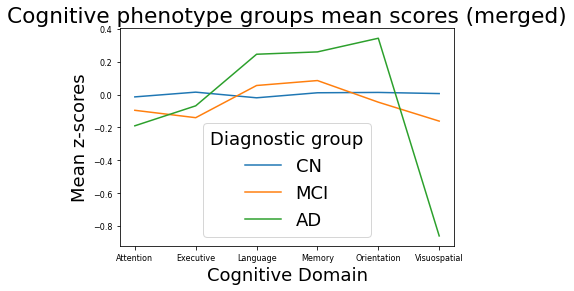

In [77]:
#Compute zscores means for each cognitive domain by diagnostic group
merged_means_CN = zscores_means(X_merged_CN, "CN", metadata_path)
merged_means_MCI = zscores_means(X_merged_MCI, "MCI", metadata_path)
merged_means_AD = zscores_means(X_merged_AD, "AD", metadata_path)

#Concanetate all dataframes
merged_means_df = pd.concat([merged_means_CN, merged_means_MCI, merged_means_AD])
merged_means_df.index = range(len(merged_means_df))

#plot dataframe
sns.lineplot(data=merged_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (merged)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

## 5. ADJACENCY MATRIX

Simple correlation (a.k.a. Pearson correlation coefficient) may not give a complete picture while trying to understand the relationship between two variables (A and B) especially when there exist other influencing variables that affect A (and/or) B.
In fact, simple correlation mainly focuses on finding the influence of each variable on the other.

Whereas **partial correlation** is used to find the refined relationship between two variables with the effect of the other influencing variables being excluded/controlled.

#### Import required packages

In [78]:
#!pip install pingouin

In [79]:
from pingouin import partial_corr

#### Create partial correlation function

In [80]:
def par_corr(data_df):
    """
    Compute partial pairwise correlation of columns. 
    When a pair of columns are picked, then all other columns are treated as control variables. 
    
    @param data_df DataFrame
    @return DataFrame, whose data is a symmetric matrix
    """ 
    
    n = data_df.shape[1] #total number of tests
    mat = np.empty((n, n)) #empty matrix to store results 
    np.fill_diagonal(mat, 1) #diagonal elements have correlation equal to 1.0
    count_neg = 0 #count negative correlations
    
    for i in range(n):
        for j in range(i + 1, n):
            #get columns names
            x = data_df.columns[i]
            y = data_df.columns[j]
            xy_colnames = [data_df.columns[index] for index in [i,j]]
            covar = [ var for var in data_df.columns if var not in xy_colnames]
            
            #partial correlation
            corr_df = partial_corr(data=data_df, x=x, y=y, covar=covar, method='spearman') #partial correlation stats
            p_value = corr_df.iloc[0]['p-val']
            corr = corr_df.iloc[0]['r'] #get partial correlation value
            #if p_value < 0.05:
            #    corr = corr_df.iloc[0]['r'] #get partial correlation value
            #else:
            #    corr = 0

            #store results
            mat[i, j] = corr
            mat[j, i] = corr
            
            if corr < 0:
                count_neg += 1
                #print(x, "-", y, ": ", round(corr,3))
                
    print("Total number of negative correlations: ", count_neg)
            
    return pd.DataFrame(mat, index=data_df.columns, columns=data_df.columns)

In [81]:
def plot_adjacency_mx(CN_mx, MCI_mx, AD_mx, battery_name):
    
    fig, axes = plt.subplots(1,3, figsize=(20,6))

    sns.heatmap(ax=axes[0],data=CN_mx, annot=False, cmap="Spectral_r", vmin=-1, vmax=1)
    sns.heatmap(ax=axes[1],data=MCI_mx, annot=False, cmap="Spectral_r", vmin=-1, vmax=1)
    sns.heatmap(ax=axes[2],data=AD_mx, annot=False, cmap="Spectral_r", vmin=-1, vmax=1)

    #add titles to subfigures
    fig.suptitle('Adjacency matrixes (' + battery_name + ')')
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    filename = "./Results/Figures/Matrix/matrix_" + battery_name + ".svg"
    
    plt.savefig(filename, format="svg")

    plt.show()

### ADAS-Cog

#### Divide data by diagnostic group

In [82]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  659
Number of instances MCI:  699
Number of instances AD:  219


#### Compute adjacency matrixes

In [83]:
print("CONTROLS---------------")
ADAS_CN_mx = par_corr(X_ADAS_CN)
print("MCI--------------------")
ADAS_MCI_mx = par_corr(X_ADAS_MCI)
print("AD---------------------")
ADAS_AD_mx = par_corr(X_ADAS_AD)

CONTROLS---------------
Total number of negative correlations:  26
MCI--------------------
Total number of negative correlations:  20
AD---------------------
Total number of negative correlations:  25


#### Plot correlation matrixes as heatmaps

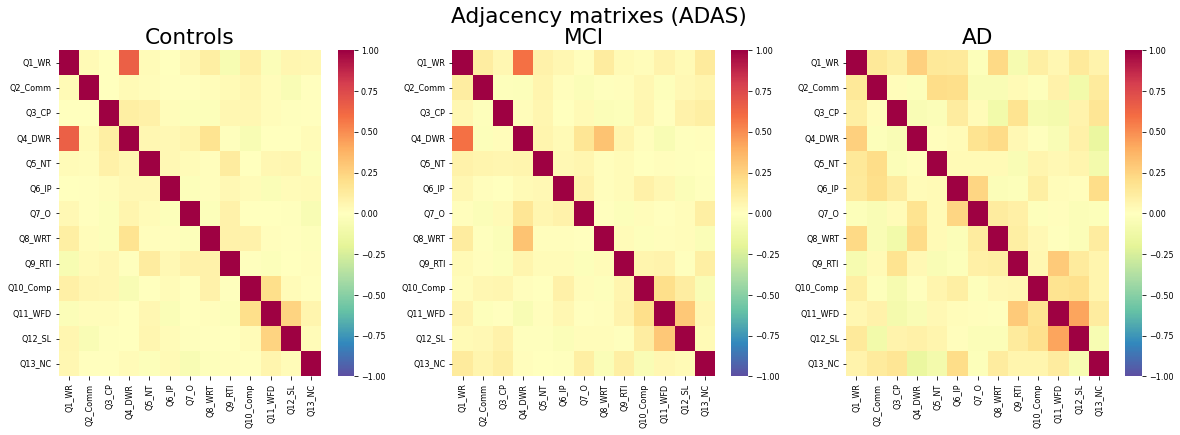

In [84]:
plot_adjacency_mx(ADAS_CN_mx, ADAS_MCI_mx, ADAS_AD_mx, 'ADAS')

### MMSE

#### Divide data by diagnostic group

In [85]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  878
Number of instances AD:  339


#### Compute adjacency matrixes

In [86]:
MMSE_CN_mx = par_corr(X_MMSE_CN)
MMSE_MCI_mx = par_corr(X_MMSE_MCI)
MMSE_AD_mx = par_corr(X_MMSE_AD)

Total number of negative correlations:  32
Total number of negative correlations:  28
Total number of negative correlations:  32


#### Plot correlation matrixes as heatmaps

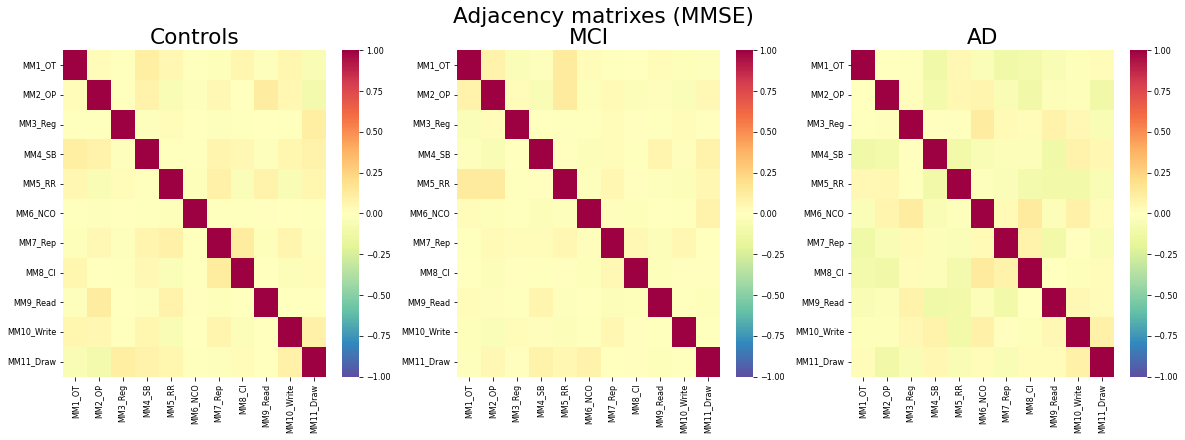

In [87]:
plot_adjacency_mx(MMSE_CN_mx, MMSE_MCI_mx, MMSE_AD_mx, 'MMSE')

Blank variables are those that are constant in the controls. Thus, the standard deviation is 0 (and the mean) is 0 and when computing the partial correlation matrixes it will raise an error. 

### MOCA

#### Divide data by diagnostic group

In [88]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  645
Number of instances MCI:  684
Number of instances AD:  212


#### Compute adjacency matrixes

In [89]:
MOCA_CN_mx = par_corr(X_MOCA_CN)
MOCA_MCI_mx = par_corr(X_MOCA_MCI)
MOCA_AD_mx = par_corr(X_MOCA_AD)

Total number of negative correlations:  42
Total number of negative correlations:  35
Total number of negative correlations:  49


#### Plot correlation matrixes as heatmaps

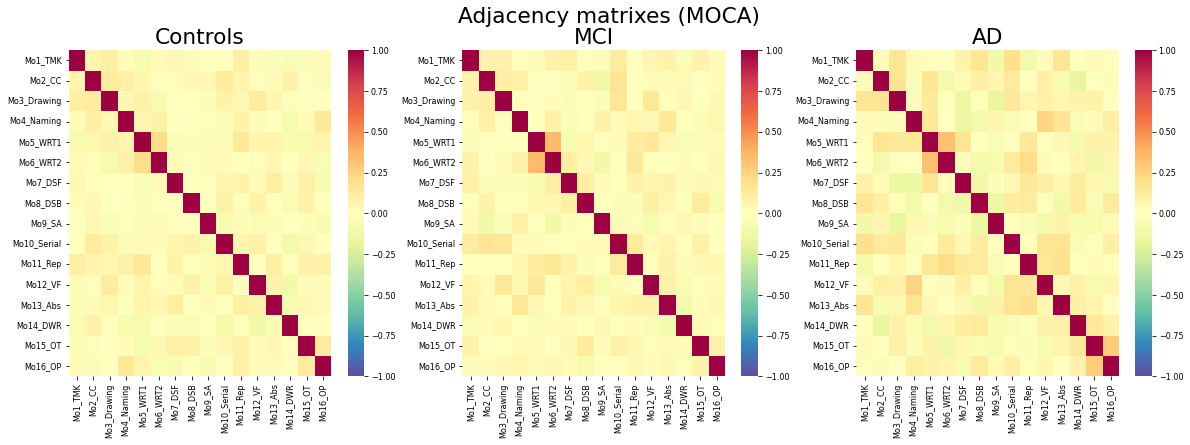

In [90]:
plot_adjacency_mx(MOCA_CN_mx, MOCA_MCI_mx, MOCA_AD_mx, 'MOCA')

He encontrado un artículo que puede ser interesante (hacen algo parecido a lo que queremos hacer), aunque todavía no he tenido tiempo de leerlo: https://doi.org/10.3390/healthcare10102045. Se centra especialmente en métodos de clasificación de Machine Learning clásicos usando ADAS-cog. Sin embargo, también realizan una matriz de correlaciones. 

### Merged

#### Divide data by diagnostic group

In [91]:
#Get indexes of subjects belonging to each group
merged_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_merged = Y_merged.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    merged_indexes[dx] = Y_merged.index[Y_merged['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_merged_CN = X_merged.iloc[merged_indexes["CN"]]
X_merged_MCI = X_merged.iloc[merged_indexes["MCI"]]
X_merged_AD = X_merged.iloc[merged_indexes["AD"]]

print("Number of instances CN: ", X_merged_CN.shape[0])
print("Number of instances MCI: ", X_merged_MCI.shape[0])
print("Number of instances AD: ", X_merged_AD.shape[0])

Number of instances CN:  288
Number of instances MCI:  468
Number of instances AD:  142


#### Compute adjacency matrixes

In [92]:
merged_CN_mx = par_corr(X_merged_CN)
merged_MCI_mx = par_corr(X_merged_MCI)
merged_AD_mx = par_corr(X_merged_AD)

Total number of negative correlations:  388
Total number of negative correlations:  389
Total number of negative correlations:  407


#### Plot correlation matrixes as heatmaps

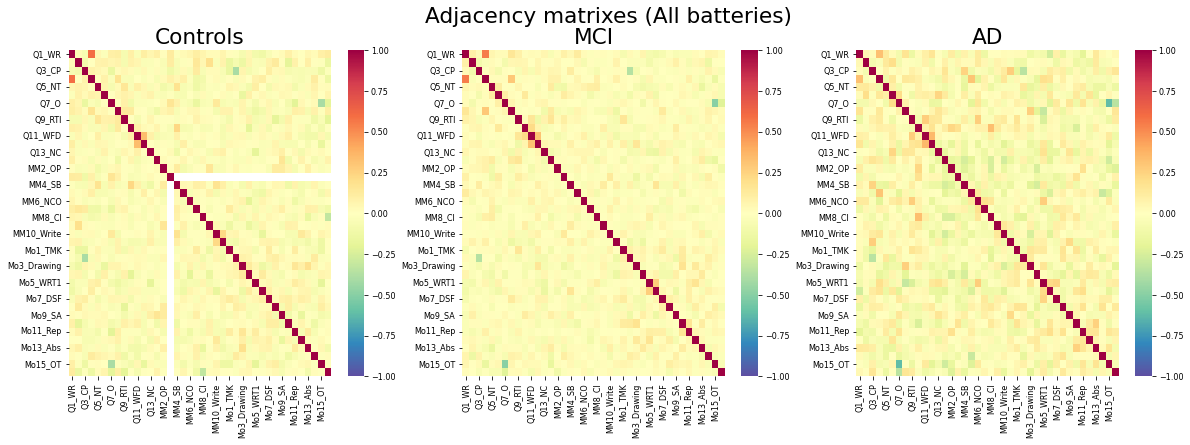

In [93]:
plot_adjacency_mx(merged_CN_mx, merged_MCI_mx, merged_AD_mx, 'All batteries')

## 6. GRAPH CONSTRUCTION

In [94]:
import networkx as nx

In [95]:
def cognitive_network(mx):
    """Function to remove diagonal elements and convert scores into absolute values. It returns a networkx graph"""

    for i in range(mx.shape[1]): #iterate matrix elements
        colname = mx.columns[i]
        #Remove diagonal elements
        mx[colname] =np.where((mx[colname]==1.0) | (mx[colname].isnull()),0, mx[colname]) 
        #Convert negative correlations in positive ones
        mx[colname] = np.where((mx[colname]<0),-1*mx[colname], mx[colname]) 
    
    #Create graph from adjacency matrix
    g = nx.from_numpy_array(mx.to_numpy())
    
    return g

In [96]:
def node_attributes(metadata_path, graphs_ls, X_ls): 
    """Function to add attributes to the nodes of the graph"""
    
    attribute_ls = ['Node', 'Label', 'Test', 'Cognitive Domain']
    
    #Import node metadata
    metadata_df = pd.read_csv(metadata_path, sep=";", 
                                usecols = attribute_ls)
    metadata_df = metadata_df[attribute_ls].drop_duplicates()
    
    #Add attributes
    for graph in graphs_ls:
        for attribute in attribute_ls:
            nx.set_node_attributes(graph, dict(zip(metadata_df.Node, metadata_df[attribute])), name=attribute)
        
    #add mean z-score to each node
    for dx in range(len(X_ls)): 
        means = X_ls[dx].mean(axis=0).tolist()
        nx.set_node_attributes(graphs_ls[dx], dict(zip(metadata_df.Node, means)), name='Zscore mean')

In [97]:
def draw_graph(graphs_ls, test_labels, pos, battery_name):
    
    #Color by NC domain
    ATTRIBUTE_NAME = 'Cognitive Domain'
    mapping = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4, 'Visuospatial':5}
    
    colors=[]
    for node in list(graphs_ls[0].nodes()): #iterate each node
        domain = graphs_ls[0].nodes[node][ATTRIBUTE_NAME]
        colors.append(mapping[domain])

    #set colormap
    n = len(np.unique(colors))
    colorCodes_ls = ["#F564E3", "#C77CFF", "#F8766D", "#00BFC4", "#00BA38", "#619CFF"]
    colorCodes_ls = colorCodes_ls[0:n]
    cm = matplotlib.colors.ListedColormap(colorCodes_ls)

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(22,8))
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, cmap=cm, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, cmap=cm,
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title to subfigures
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results/Figures/Graphs/"+ battery_name + ".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

### ADAS-Cog

#### 6.1 Compute graph

In [98]:
import networkx as nx

#convert adjacency matrix into graph
ADAS_CN_graph = cognitive_network(ADAS_CN_mx)
ADAS_MCI_graph = cognitive_network(ADAS_MCI_mx)
ADAS_AD_graph = cognitive_network(ADAS_AD_mx)

In [99]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", ADAS_CN_graph.number_of_nodes())
print("- Number of edges: ", ADAS_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", ADAS_MCI_graph.number_of_nodes())
print("- Number of edges: ", ADAS_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", ADAS_AD_graph.number_of_nodes())
print("- Number of edges: ", ADAS_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  13
- Number of edges:  78

MCI-------------------------
- Number of nodes:  13
- Number of edges:  78

AD-------------------------
- Number of nodes:  13
- Number of edges:  78


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [100]:
metadata_path = "./NC_Tests/ADAS_Metadata.csv"
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]
X_ls = [X_ADAS_CN, X_ADAS_MCI, X_ADAS_AD]

node_attributes(metadata_path, graphs_ls, X_ls)

#### 6.3. Draw graph

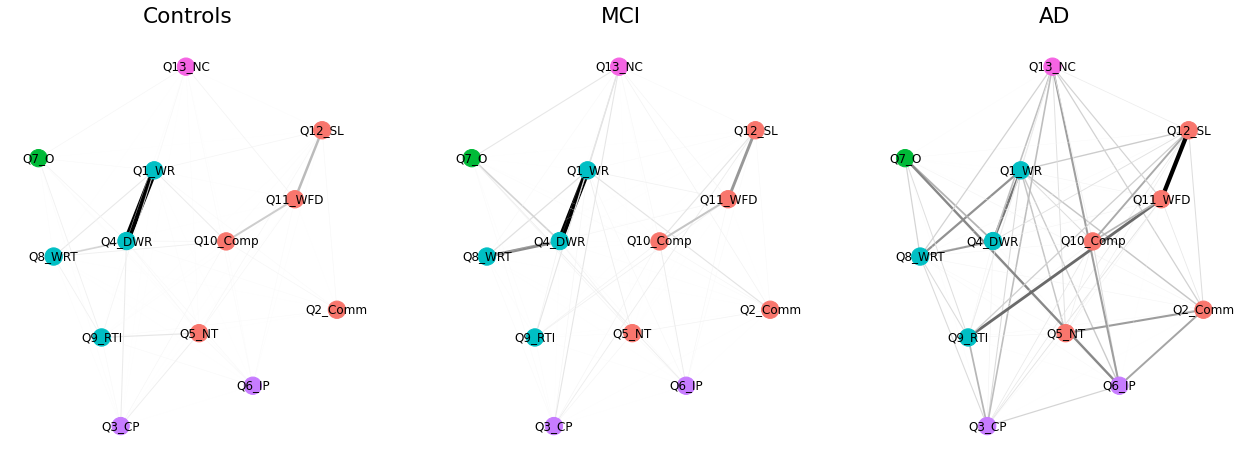

In [101]:
#Node labels
ADAS_labels = {} #create empty dictionary

for i in range(ADAS_CN_mx.shape[1]):
    ADAS_labels[i] = ADAS_CN_mx.columns[i]

#convert domains into numeric keys
mapping_ADAS = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4} 

#fix position
pos_ADAS=nx.spring_layout(ADAS_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, ADAS_labels, pos_ADAS, 'ADAS')

#### Edges weights

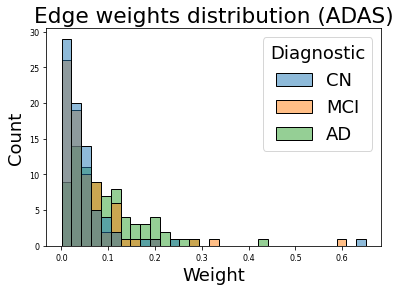

In [102]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(ADAS_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(ADAS_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(ADAS_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution (ADAS)")
plt.savefig("./Results/Figures/Weights/ADAS_weights.svg", format="svg")
plt.show()

### MMSE

#### 6.1 Compute graph

In [103]:
import networkx as nx

#convert adjacency matrix into graph
MMSE_CN_graph = cognitive_network(MMSE_CN_mx)
MMSE_MCI_graph = cognitive_network(MMSE_MCI_mx)
MMSE_AD_graph = cognitive_network(MMSE_AD_mx)

In [104]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MMSE_CN_graph.number_of_nodes())
print("- Number of edges: ", MMSE_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MMSE_MCI_graph.number_of_nodes())
print("- Number of edges: ", MMSE_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MMSE_AD_graph.number_of_nodes())
print("- Number of edges: ", MMSE_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  11
- Number of edges:  55

MCI-------------------------
- Number of nodes:  11
- Number of edges:  55

AD-------------------------
- Number of nodes:  11
- Number of edges:  55


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [105]:
metadata_path = "./NC_Tests/MMSE_Metadata.csv"
graphs_ls = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]
X_ls = [X_MMSE_CN, X_MMSE_MCI, X_MMSE_AD]

node_attributes(metadata_path, graphs_ls, X_ls)

#### 6.3. Draw graph

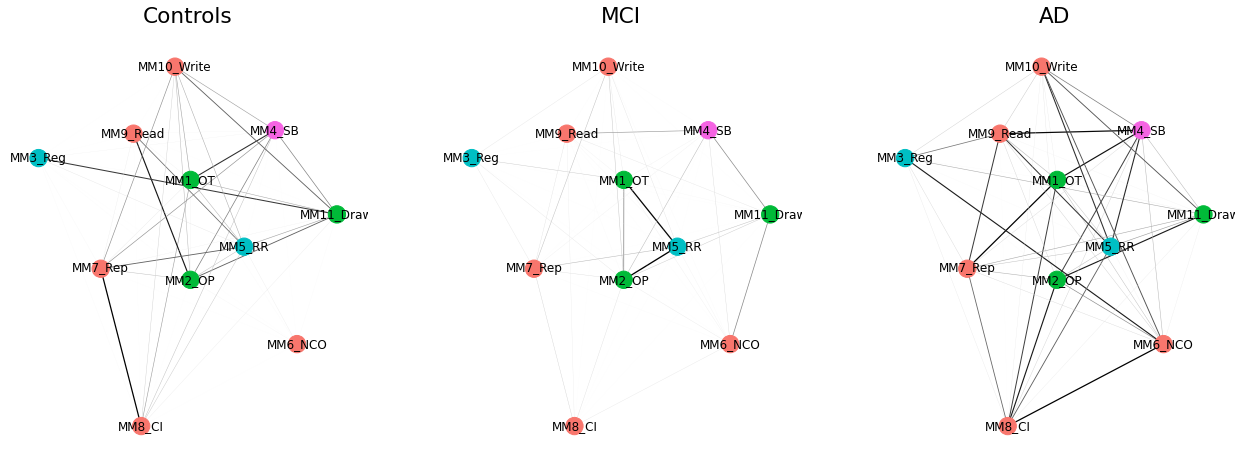

In [106]:
#Node labels
MMSE_labels = {} #create empty dictionary

for i in range(MMSE_CN_mx.shape[1]):
    MMSE_labels[i] = MMSE_CN_mx.columns[i]

#convert domains into numeric keys
mapping_MMSE = {'Attention':0, 'Language':1, 'Memory':2, 'Orientation':3, 'Visuospatial':4} 

#fix position
pos_MMSE=nx.spring_layout(MMSE_MCI_graph, weight='weight', seed=0)

draw_graph(graphs_ls, MMSE_labels, pos_MMSE, 'MMSE')

#### Edges weights

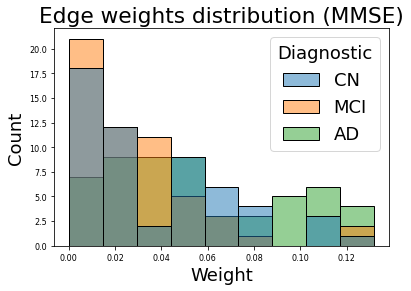

In [107]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(MMSE_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(MMSE_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(MMSE_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution (MMSE)")
plt.savefig("./Results/Figures/Weights/MMSE_weights.svg", format="svg")
plt.show()

### MOCA

#### 6.1 Compute graph

In [108]:
import networkx as nx

#convert adjacency matrix into graph
MOCA_CN_graph = cognitive_network(MOCA_CN_mx)
MOCA_MCI_graph = cognitive_network(MOCA_MCI_mx)
MOCA_AD_graph = cognitive_network(MOCA_AD_mx)

In [109]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MOCA_CN_graph.number_of_nodes())
print("- Number of edges: ", MOCA_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MOCA_MCI_graph.number_of_nodes())
print("- Number of edges: ", MOCA_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MOCA_AD_graph.number_of_nodes())
print("- Number of edges: ", MOCA_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  16
- Number of edges:  120

MCI-------------------------
- Number of nodes:  16
- Number of edges:  120

AD-------------------------
- Number of nodes:  16
- Number of edges:  120


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [110]:
metadata_path = "./NC_Tests/MOCA_Metadata.csv"
graphs_ls = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]
X_ls = [X_MOCA_CN, X_MOCA_MCI, X_MOCA_AD]

node_attributes(metadata_path, graphs_ls, X_ls)

#### 6.3. Draw graph

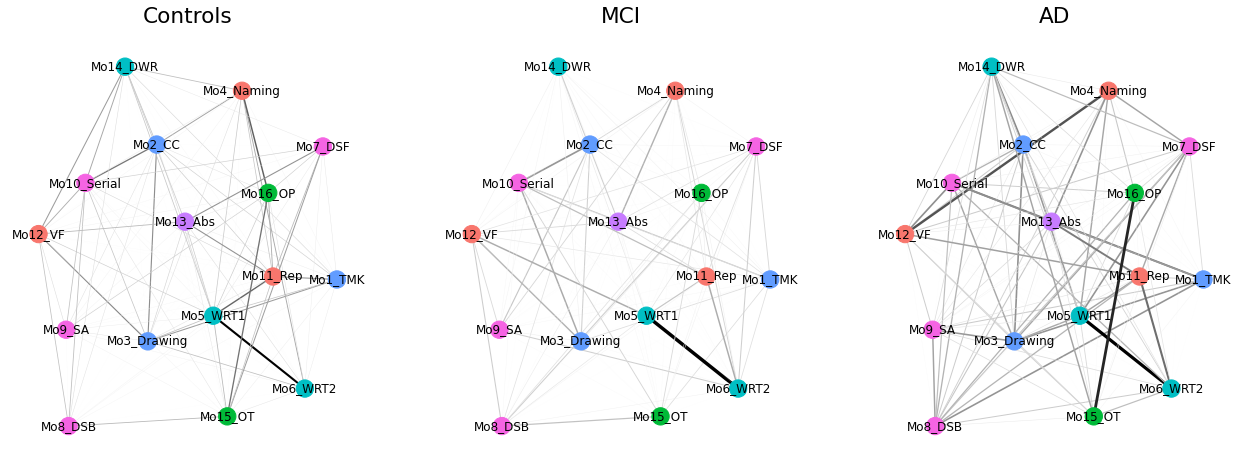

In [111]:
#Node labels
MOCA_labels = {} #create empty dictionary

for i in range(MOCA_CN_mx.shape[1]):
    MOCA_labels[i] = MOCA_CN_mx.columns[i]

#convert domains into numeric keys
mapping_MOCA = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4, 
          'Visuospatial':5}  

#fix position
pos_MOCA=nx.spring_layout(MOCA_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, MOCA_labels, pos_MOCA, 'MOCA')

#### Edges weights

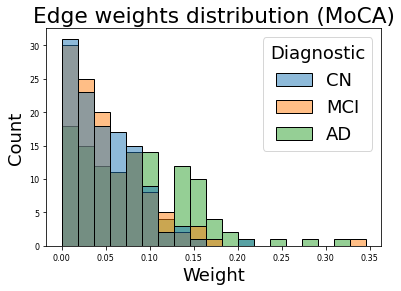

In [112]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(MOCA_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(MOCA_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(MOCA_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution (MoCA)")
plt.savefig("./Results/Figures/Weights/MOCA_weights.svg", format="svg")
plt.show()

### Merged

#### 6.1 Compute graph

In [113]:
import networkx as nx

#convert adjacency matrix into graph
merged_CN_graph = cognitive_network(merged_CN_mx)
merged_MCI_graph = cognitive_network(merged_MCI_mx)
merged_AD_graph = cognitive_network(merged_AD_mx)

In [114]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", merged_CN_graph.number_of_nodes())
print("- Number of edges: ", merged_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", merged_MCI_graph.number_of_nodes())
print("- Number of edges: ", merged_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", merged_AD_graph.number_of_nodes())
print("- Number of edges: ", merged_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  40
- Number of edges:  756

MCI-------------------------
- Number of nodes:  40
- Number of edges:  780

AD-------------------------
- Number of nodes:  40
- Number of edges:  780


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [115]:
metadata_path = "./NC_Tests/merged_Metadata.csv"
graphs_ls = [merged_CN_graph, merged_MCI_graph, merged_AD_graph]
X_ls = [X_merged_CN, X_merged_MCI, X_merged_AD]

node_attributes(metadata_path, graphs_ls, X_ls)

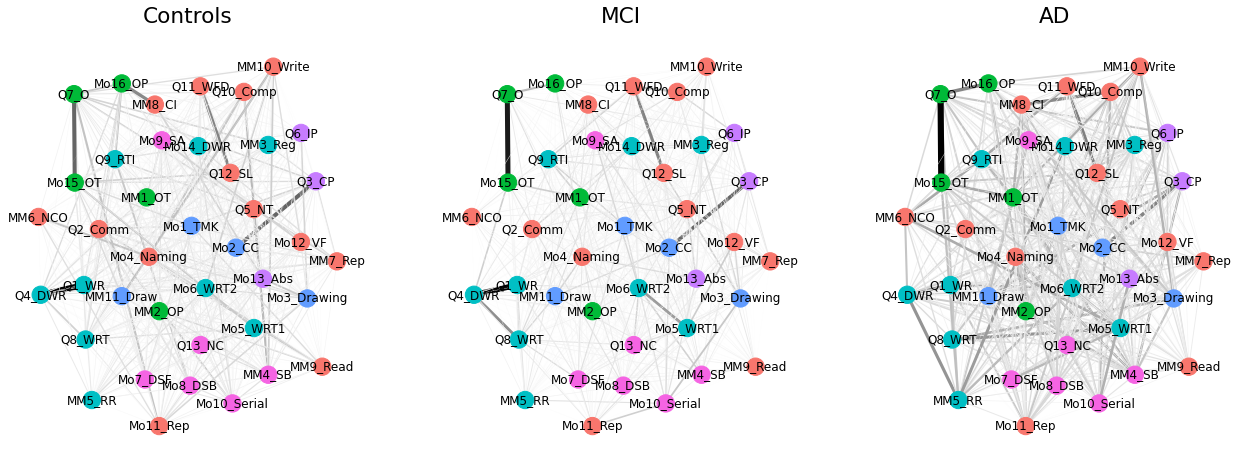

In [116]:
#Node labels
#test_labels = None

#Node labels
merged_labels = {} #create empty dictionary

for i in range(merged_CN_mx.shape[1]):
    merged_labels[i] = merged_CN_mx.columns[i]

#convert domains into numeric keys
mapping_merged = {'Attention':0, 'Concentration':1, 'Executive':2, 'Language':3, 'Memory':4,
          'Orientation':5, 'Visuospatial':6} 

#fix position
pos_merged=nx.spring_layout(merged_MCI_graph, weight='weight', seed=0)

draw_graph(graphs_ls, merged_labels, pos_merged, 'merged')

#### 6.3. Draw graph

#### Edges weights

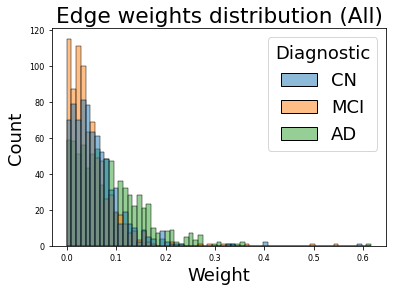

In [117]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(merged_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(merged_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(merged_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution (All)")
plt.savefig("./Results/Figures/Weights/merged_weights.svg", format="svg")
plt.show()

## 7. NETWORK ANALYSIS

#### 1. CENTRALITY MEASURES

#### Degree Centrality

In network analysis, measures of the importance of nodes are referred to as **centrality** measures. **Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges between all the possible connections. This is the centrality measure used in the epilepsy paper. 

#### Other centrality measures

- **Closeness centrality**: is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. 
- **Eigenvector centrality**: is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. 
- **Betweenness centrality**: t doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network.

In [118]:
def centrality(graph,columns):
    
    """Function to compute a table with the different centrality measures for each node."""
    
    #compute edges distances based on weights
    g_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in graph.edges(data='weight')}
    nx.set_edge_attributes(graph, g_distance_dict, 'distance')
    
    #DC = nx.degree_centrality(graph) #degree centrality
    #CC = nx.closeness_centrality(graph) #closeness centrality     
    DC = [graph.degree(n, weight='weight') for n in graph.nodes()] #degree centrality
    CC = nx.closeness_centrality(graph, distance='distance')
    EC = nx.eigenvector_centrality(graph, weight='weight') #eigenvector centrality
    BC = nx.betweenness_centrality(graph, weight='weight') #betweenness centrality
    
    
    centrality_df = pd.DataFrame() #create empty dataframe
    
    for node in BC:
        centrality_df.at[node, "Degree_Centrality"] = DC[node] / (len(DC) - 1)
        centrality_df.at[node, "Closeness_Centrality"] = CC[node] 
        centrality_df.at[node, "Eigenvector_Centrality"] = EC[node] 
        centrality_df.at[node, "Betweenness_Centrality"] = BC[node] 
    
    centrality_df.index = columns
        
    return centrality_df

In [119]:
### Plot degree centrality

def plot_centrality_top5(graph_CN, graph_MCI, graph_AD, columns, centrality_metric):
    #Compute centrality measures
    df_CN = centrality(graph_CN, columns)
    df_MCI = centrality(graph_MCI, columns)
    df_AD = centrality(graph_AD, columns)
    
    #Order dataframe by centrality
    df_CN = df_CN.sort_values(by=[centrality_metric],ascending = False)
    df_MCI = df_MCI.sort_values(by=[centrality_metric],ascending = False)
    df_AD = df_AD.sort_values(by=[centrality_metric],ascending = False)
    
    #Truncate table to show only top 5 tests by centrality measure
    top_CN = df_CN.iloc[0:5]
    top_MCI = df_MCI.iloc[0:5] 
    top_AD = df_AD.iloc[0:5] 
    
    #Plot 
    fig, ax = plt.subplots(1,3, figsize=(20,6))
    
    sns.barplot(ax=ax[0], x=top_CN.index, y=centrality_metric, data=top_CN, palette=['#1f77b4']) 
    sns.barplot(ax=ax[1], x=top_MCI.index, y=centrality_metric, data=top_MCI, palette=['#ff7f0e']) 
    sns.barplot(ax=ax[2], x=top_AD.index, y=centrality_metric, data=top_AD, palette=['#2ca02c']) 
    
    for i in range(3):
        ax[i].set_xlabel("Test")
    
    #add title to subfigures
    ax[0].title.set_text("Controls")
    ax[1].title.set_text("MCI")
    ax[2].title.set_text("AD")
    
    plt.show()

In [120]:
def plot_centrality(graph_CN, graph_MCI, graph_AD, columns, centrality_metric, battery_name):
    #Compute centrality measures
    df_CN = centrality(graph_CN, columns)
    df_MCI = centrality(graph_MCI, columns)
    df_AD = centrality(graph_AD, columns)
    
    #Order dataframe by centrality
    df_CN = df_CN.sort_values(by=[centrality_metric],ascending = False)
    df_MCI = df_MCI.sort_values(by=[centrality_metric],ascending = False)
    df_AD = df_AD.sort_values(by=[centrality_metric],ascending = False)
    
    
    #Plot 
    fig, ax = plt.subplots(1,3, figsize=(24,10))
    
    sns.barplot(ax=ax[0], x=centrality_metric, y=df_CN.index, data=df_CN, palette=['#1f77b4']) 
    sns.barplot(ax=ax[1], x=centrality_metric, y=df_MCI.index, data=df_MCI, palette=['#ff7f0e']) 
    sns.barplot(ax=ax[2], x=centrality_metric, y=df_AD.index, data=df_AD, palette=['#2ca02c']) 
    
    for i in range(3):
        ax[i].set_ylabel("Test")
    
    #add title to subfigures
    ax[0].title.set_text("Controls")
    ax[1].title.set_text("MCI")
    ax[2].title.set_text("AD")
        
    filename = "./Results/Figures/Metrics/" + centrality_metric + "_" + battery_name + ".svg"
    plt.savefig(filename, format="svg")
    
    plt.show()

In [121]:
#print(sns.color_palette().as_hex()[0])
#print(sns.color_palette().as_hex()[1])
#print(sns.color_palette().as_hex()[2])

#### 2. GLOBAL METRICS

#### Average clustering coefficient

In graph theory, a **clustering coefficient** is a measure of the degree to which nodes in a graph tend to cluster together. Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes. In this work we are computing **global measures**.

The clustering coefficient for the graph is the average,

$$
    C = \frac{1}{n}\sum_{v \in G}c_v
$$

where $n$ is the number of nodes in the graph $G$.

#### Global efficiency

The **efficiency** of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. Edge weights are ignored when computing the shortest path distances.

Note than in the epilepsy paper they computed *normalized global efficiencies*.

#### Global measures summary

The following global metrics are going to be computed:

- **Number of nodes**: number of entities
- **Number of edges**: pairs of connected entities
- **Diameter**: the diameter of a graph is definded as the largest shortest path distance in the graph. It is the maximum value of $d(u,v)$ overf all $u,v$ pairs, where $d(u,v)$ denotes the shortest path distance from vertex $u$ to vertex $v$.
- **Density**: it is the ratio of actual edges in the network to all possible connections between the entities of the network. Network density gives you a quick sense of how closely knit your network is. It is also know as the *sparsity* of the graph and ranges between 0 and 1. Low values would indicate a network with a few specific conexions, whereas high values are indicative of a low specificity. 
- **Average degree**: The average degree of an undirected graph is used to measure the number of edges compared to the number of nodes. To do this we simply divide the summation of all nodes' degree by the total number of nodes. 
- **Transitivity**: it is the ratio of all triangles over all possible triangles. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. 
- **Average clustering coefficient**: In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. The global clustering coefficient is based on triplets of nodes. The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 
- **Glogbal Efficiency**: In network science, the efficiency of a network is a measure of how efficiently it exchanges information and it is also called *communication efficiency*. The global efficiency is the average inverse shortest path length in the network.

In [122]:
def global_metrics(graphs_ls):
    
    """Function to compute a table with some global metrics of the graphs. 
    It returns a pandas DataFrame object."""
    
    columns = ['NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE']
    index = ['CN', 'MCI', 'AD']
    
    df = pd.DataFrame(columns = columns,
                     index = index) #empty dataframe
    
    #GLOBAL METRICS
    
    for i in range(len(index)): 
        graph = graphs_ls[i]
        dx = index[i]
        
        df.loc[dx,'NNodes'] = graph.number_of_nodes() #number of nodes
        df.loc[dx,'NEdges'] = graph.number_of_edges() #number of edges
        shortest = nx.shortest_path_length(graph, weight="weight") #matrix of shortest paths
        ecc = nx.eccentricity(graph, sp=dict(shortest))
        df.loc[dx,'Diameter'] = nx.diameter(graph, e=ecc) #diameter of graph
        df.loc[dx,'Density'] = nx.density(graph) #density of graph
        df.loc[dx,'AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes() #average degree
        df.loc[dx,'Transitivity'] = nx.transitivity(graph) #transitivity of graph
        df.loc[dx,'AvCC'] = nx.average_clustering(graph,weight='weight') #average clustering coefficient
        df.loc[dx,'AvGE'] = nx.global_efficiency(graph) #average global efficiency (shortest path)
    
    return df

In [123]:
def plot_global_metrics(gm, battery_name):
    """Function to plot global metrics."""

    fig, ax = plt.subplots(2, 3, figsize=(22,13))

    sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=gm) 
    sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=gm)
    sns.barplot(ax=ax[0,2], x="index", y="Density", data=ADAS_gm) 
    sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=gm) 
    sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=gm)
    sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=gm)

    fig.suptitle("Global metrics (" + battery_name +")", fontsize=20)

    rows, cols = 2, 3
    for i in range(rows):
        for j in range(cols):
            ax[i, j].set_xlabel('Diagnostic group')
    
    filename = "./Results/Figures/Metrics/GlobalMetrics_"+ battery_name + ".svg"
    plt.savefig(filename, format="svg")

    plt.show()

### 7.1. ADAS-Cog

#### 7.1.1. CENTRALITY MEASURES

In [124]:
print("Controls----------------------------------")
CM_ADAS_CN = centrality(ADAS_CN_graph, ADAS_columns)
CM_ADAS_CN.to_csv("./Results/ADAS/CM_CN.csv", sep=";")
display(CM_ADAS_CN)
print("MCI----------------------------------")
CM_ADAS_MCI = centrality(ADAS_MCI_graph, ADAS_columns)
CM_ADAS_MCI.to_csv("./Results/ADAS/CM_MCI.csv", sep=";")
display(CM_ADAS_MCI)
print("AD----------------------------------")
CM_ADAS_AD = centrality(ADAS_AD_graph, ADAS_columns)
CM_ADAS_AD.to_csv("./Results/ADAS/CM_AD.csv", sep=";")
display(CM_ADAS_AD)

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1_WR              0.099738              0.065590                0.603263   
Q2_Comm            0.024346              0.032560                0.099419   
Q3_CP              0.034717              0.046203                0.141428   
Q4_DWR             0.102371              0.065044                0.609129   
Q5_NT              0.044582              0.047486                0.137516   
Q6_IP              0.027983              0.034276                0.090055   
Q7_O               0.031631              0.040809                0.130322   
Q8_WRT             0.048128              0.055486                0.266474   
Q9_RTI             0.045090              0.049244                0.145444   
Q10_Comp           0.052997              0.057568                0.211993   
Q11_WFD            0.060113              0.054331                0.155295   
Q12_SL             0.044992              0.050334                0.132214   
Q13_NC             0.029757              0.041522                0.111561   

          Betweenness_Centrality  
Q1_WR                   0.000000  
Q2_Comm                 0.469697  
Q3_CP                   0.136364  
Q4_DWR                  0.242424  
Q5_NT                   0.000000  
Q6_IP                   0.015152  
Q7_O                    0.484848  
Q8_WRT                  0.015152  
Q9_RTI                  0.000000  
Q10_Comp                0.136364  
Q11_WFD                 0.318182  
Q12_SL                  0.166667  
Q13_NC                  0.060606

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1_WR              0.108556              0.081364                0.544418   
Q2_Comm            0.038968              0.053167                0.153539   
Q3_CP              0.042001              0.054066                0.137290   
Q4_DWR             0.114064              0.078515                0.572385   
Q5_NT              0.036936              0.047112                0.148142   
Q6_IP              0.037498              0.048346                0.125799   
Q7_O               0.046431              0.064878                0.182471   
Q8_WRT             0.052556              0.064014                0.319818   
Q9_RTI             0.040838              0.053176                0.146978   
Q10_Comp           0.057693              0.055757                0.151723   
Q11_WFD            0.070390              0.062830                0.215896   
Q12_SL             0.058969              0.054491                0.168908   
Q13_NC             0.060081              0.068264                0.201117   

          Betweenness_Centrality  
Q1_WR                   0.000000  
Q2_Comm                 0.075758  
Q3_CP                   0.151515  
Q4_DWR                  0.000000  
Q5_NT                   0.166667  
Q6_IP                   0.090909  
Q7_O                    0.227273  
Q8_WRT                  0.121212  
Q9_RTI                  0.015152  
Q10_Comp                0.060606  
Q11_WFD                 0.212121  
Q12_SL                  0.045455  
Q13_NC                  0.045455

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1_WR              0.123949              0.122253                0.342086   
Q2_Comm            0.087474              0.098345                0.249611   
Q3_CP              0.087589              0.094395                0.259019   
Q4_DWR             0.094256              0.103698                0.278127   
Q5_NT              0.069360              0.080079                0.203376   
Q6_IP              0.096507              0.106563                0.261051   
Q7_O               0.071593              0.094923                0.200398   
Q8_WRT             0.092111              0.102177                0.266142   
Q9_RTI             0.094788              0.090289                0.281732   
Q10_Comp           0.076146              0.086321                0.235123   
Q11_WFD            0.113134              0.099541                0.338418   
Q12_SL             0.113014              0.099644                0.337865   
Q13_NC             0.108199              0.111228                0.303958   

          Betweenness_Centrality  
Q1_WR                   0.000000  
Q2_Comm                 0.045455  
Q3_CP                   0.000000  
Q4_DWR                  0.090909  
Q5_NT                   0.015152  
Q6_IP                   0.136364  
Q7_O                    0.409091  
Q8_WRT                  0.000000  
Q9_RTI                  0.000000  
Q10_Comp                0.121212  
Q11_WFD                 0.181818  
Q12_SL                  0.000000  
Q13_NC                  0.000000

#### Plot centrality metrics

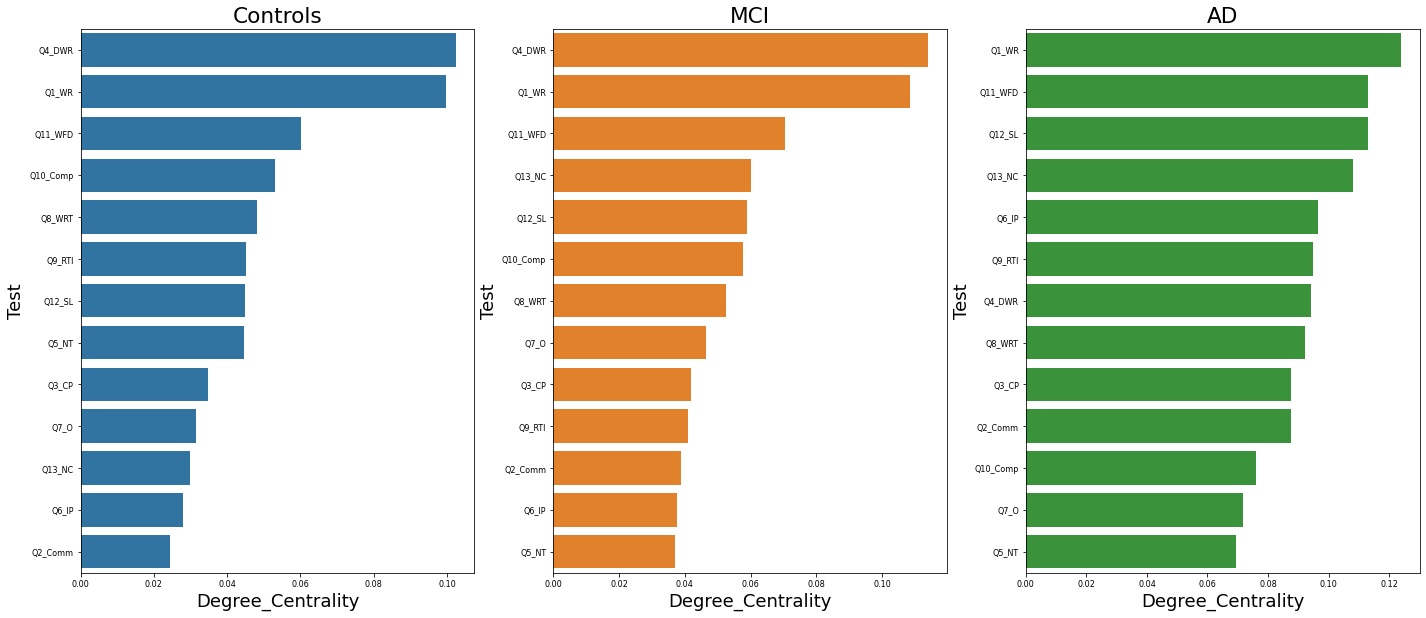

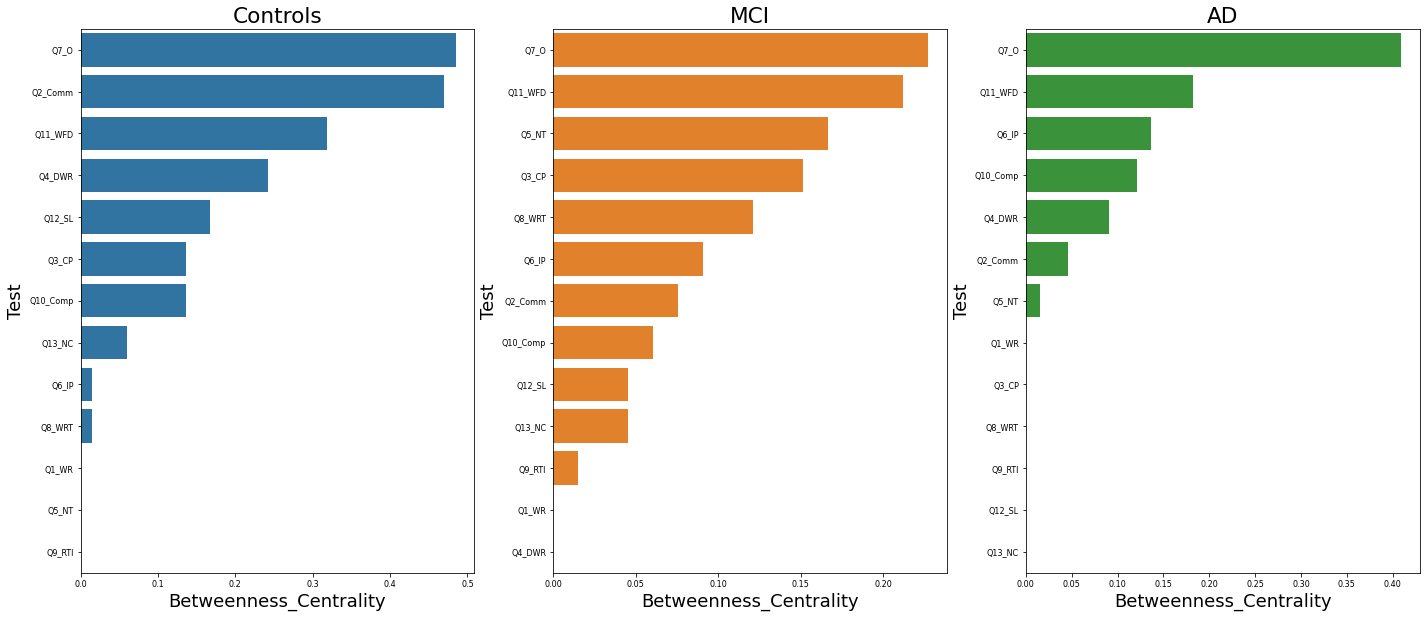

In [125]:
plot_centrality(ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph, ADAS_columns, "Degree_Centrality", 'ADAS')
plot_centrality(ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph, ADAS_columns, "Betweenness_Centrality", 'ADAS')

#### Relation between node degree and betweenness centrality

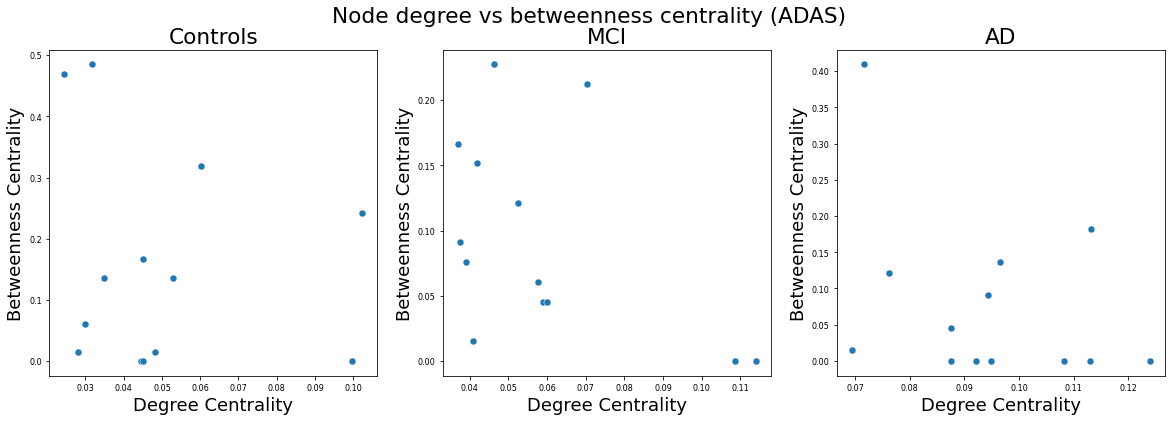

In [126]:
#Get centrality metrics table
ADAS_CN_centrality = centrality(ADAS_CN_graph, ADAS_columns)
ADAS_MCI_centrality = centrality(ADAS_MCI_graph, ADAS_columns)
ADAS_AD_centrality = centrality(ADAS_AD_graph, ADAS_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=ADAS_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=ADAS_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=ADAS_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (ADAS)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.savefig("./Results/Figures/Metrics/BCvsDG_ADAS.svg", format="svg")
plt.show()

#### 7.1.2. GLOBAL METRICS

In [127]:
ADAS_gm = global_metrics([ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph])
ADAS_gm.reset_index(inplace=True)
ADAS_gm

index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE
0    CN     13     78  0.024934     1.0  0.596719          1.0  0.049668  1.0
1   MCI     13     78  0.032201     1.0  0.706134          1.0  0.067241  1.0
2    AD     13     78  0.072843     1.0  1.133648          1.0  0.177877  1.0

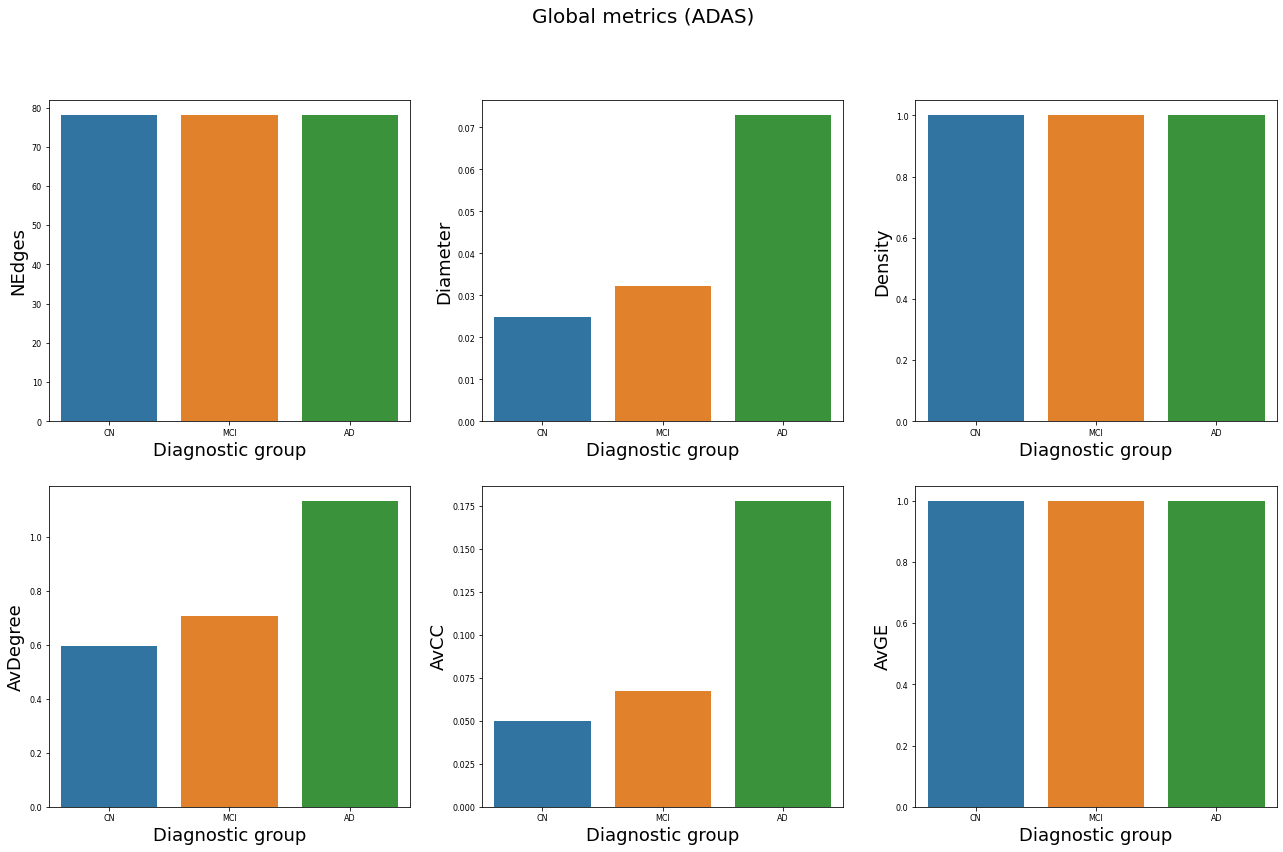

In [128]:
plot_global_metrics(ADAS_gm, 'ADAS')

### 7.2. MMSE

#### 7.2.1. CENTRALITY MEASURES

In [129]:
print("Controls----------------------------------")
CM_MMSE_CN = centrality(MMSE_CN_graph, MMSE_columns)
CM_MMSE_CN.to_csv("./Results/MMSE/CM_CN.csv", sep=";")
display(CM_MMSE_CN)
print("MCI----------------------------------")
CM_MMSE_MCI = centrality(MMSE_MCI_graph, MMSE_columns)
CM_MMSE_MCI.to_csv("./Results/MMSE/CM_MCI.csv", sep=";")
display(CM_MMSE_MCI)
print("AD----------------------------------")
CM_MMSE_AD = centrality(MMSE_AD_graph, MMSE_columns)
CM_MMSE_AD.to_csv("./Results/MMSE/CM_AD.csv", sep=";")
display(CM_MMSE_AD)

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MM1_OT               0.042055              0.039790                0.320146   
MM2_OP               0.046951              0.043907                0.337172   
MM3_Reg              0.021864              0.032146                0.179463   
MM4_SB               0.047155              0.042661                0.357617   
MM5_RR               0.048012              0.046149                0.336035   
MM6_NCO              0.009593              0.017033                0.075476   
MM7_Rep              0.048456              0.041975                0.355915   
MM8_CI               0.036695              0.034195                0.287211   
MM9_Read             0.027247              0.037756                0.216048   
MM10_Write           0.042006              0.042658                0.336180   
MM11_Draw            0.052366              0.044686                0.369120   

            Betweenness_Centrality  
MM1_OT                    0.000000  
MM2_OP                    0.000000  
MM3_Reg                   0.000000  
MM4_SB                    0.200000  
MM5_RR                    0.000000  
MM6_NCO                   0.777778  
MM7_Rep                   0.000000  
MM8_CI                    0.155556  
MM9_Read                  0.466667  
MM10_Write                0.000000  
MM11_Draw                 0.000000

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MM1_OT               0.036838              0.033360                0.398868   
MM2_OP               0.048300              0.040310                0.467544   
MM3_Reg              0.017016              0.022243                0.169749   
MM4_SB               0.029690              0.030755                0.258385   
MM5_RR               0.044879              0.038772                0.476922   
MM6_NCO              0.024524              0.024383                0.222621   
MM7_Rep              0.028187              0.031112                0.245355   
MM8_CI               0.015302              0.024175                0.133911   
MM9_Read             0.022668              0.025009                0.194441   
MM10_Write           0.023584              0.026189                0.231089   
MM11_Draw            0.030145              0.031658                0.283504   

            Betweenness_Centrality  
MM1_OT                    0.000000  
MM2_OP                    0.000000  
MM3_Reg                   0.444444  
MM4_SB                    0.000000  
MM5_RR                    0.000000  
MM6_NCO                   0.044444  
MM7_Rep                   0.000000  
MM8_CI                    0.377778  
MM9_Read                  0.200000  
MM10_Write                0.000000  
MM11_Draw                 0.111111

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MM1_OT               0.053942              0.058001                0.297164   
MM2_OP               0.056900              0.062022                0.305401   
MM3_Reg              0.037737              0.051232                0.194867   
MM4_SB               0.069368              0.068962                0.364951   
MM5_RR               0.063576              0.064416                0.337406   
MM6_NCO              0.061070              0.060942                0.304522   
MM7_Rep              0.056906              0.057240                0.298189   
MM8_CI               0.063048              0.069957                0.330238   
MM9_Read             0.059770              0.060736                0.313276   
MM10_Write           0.052245              0.057727                0.275353   
MM11_Draw            0.050981              0.054415                0.262200   

            Betweenness_Centrality  
MM1_OT                    0.177778  
MM2_OP                    0.177778  
MM3_Reg                   0.311111  
MM4_SB                    0.022222  
MM5_RR                    0.066667  
MM6_NCO                   0.022222  
MM7_Rep                   0.066667  
MM8_CI                    0.111111  
MM9_Read                  0.022222  
MM10_Write                0.111111  
MM11_Draw                 0.022222

#### Plot centrality metrics

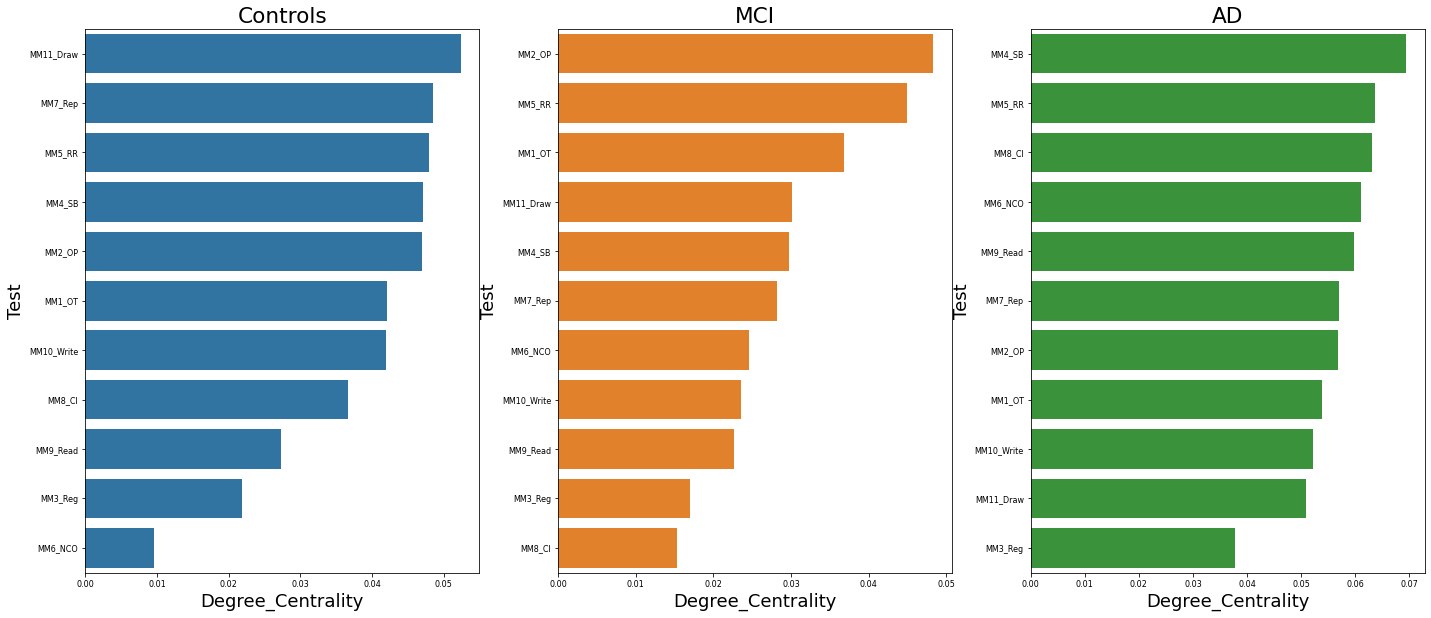

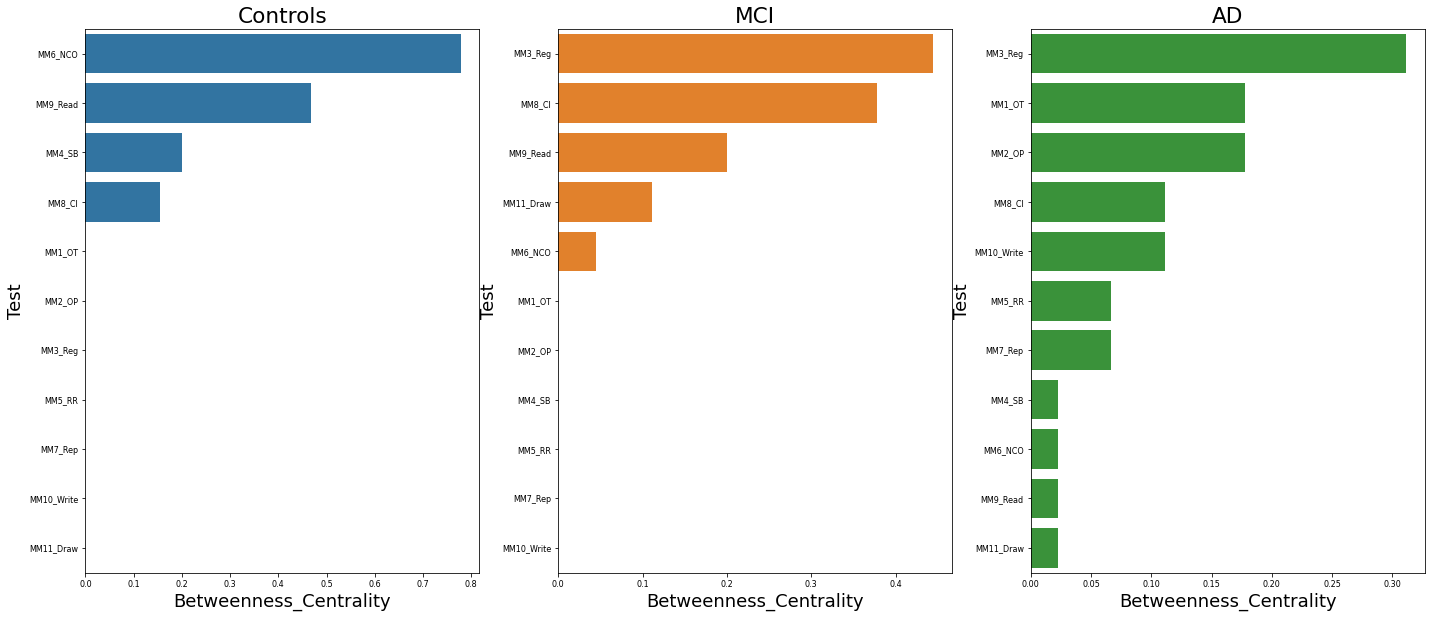

In [130]:
plot_centrality(MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph, MMSE_columns, "Degree_Centrality", 'MMSE')
plot_centrality(MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph, MMSE_columns, "Betweenness_Centrality", 'MMSE')

#### Relation between node degree and betweenness centrality

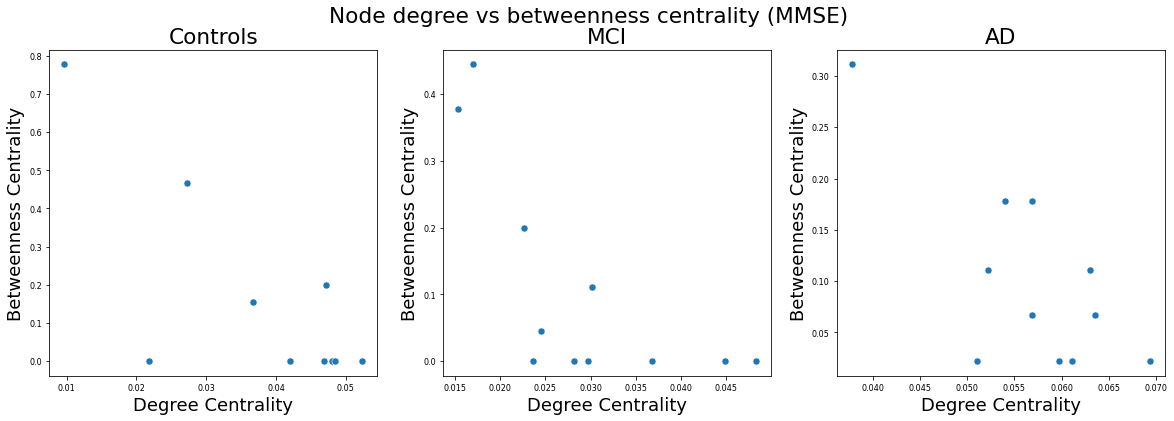

In [131]:
#Get centrality metrics table
MMSE_CN_centrality = centrality(MMSE_CN_graph, MMSE_columns)
MMSE_MCI_centrality = centrality(MMSE_MCI_graph, MMSE_columns)
MMSE_AD_centrality = centrality(MMSE_AD_graph, MMSE_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MMSE_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MMSE_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MMSE_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (MMSE)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.savefig("./Results/Figures/Metrics/BCvsDG_MMSE.svg", format="svg")
plt.show()

#### 7.1.2. GLOBAL METRICS

In [132]:
MMSE_gm = global_metrics([MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph])
MMSE_gm.reset_index(inplace=True)
MMSE_gm

index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE
0    CN     11     55   0.03063     1.0     0.384          1.0  0.236921  1.0
1   MCI     11     55  0.027727     1.0  0.291939          1.0  0.169387  1.0
2    AD     11     55  0.047426     1.0  0.568676          1.0  0.359604  1.0

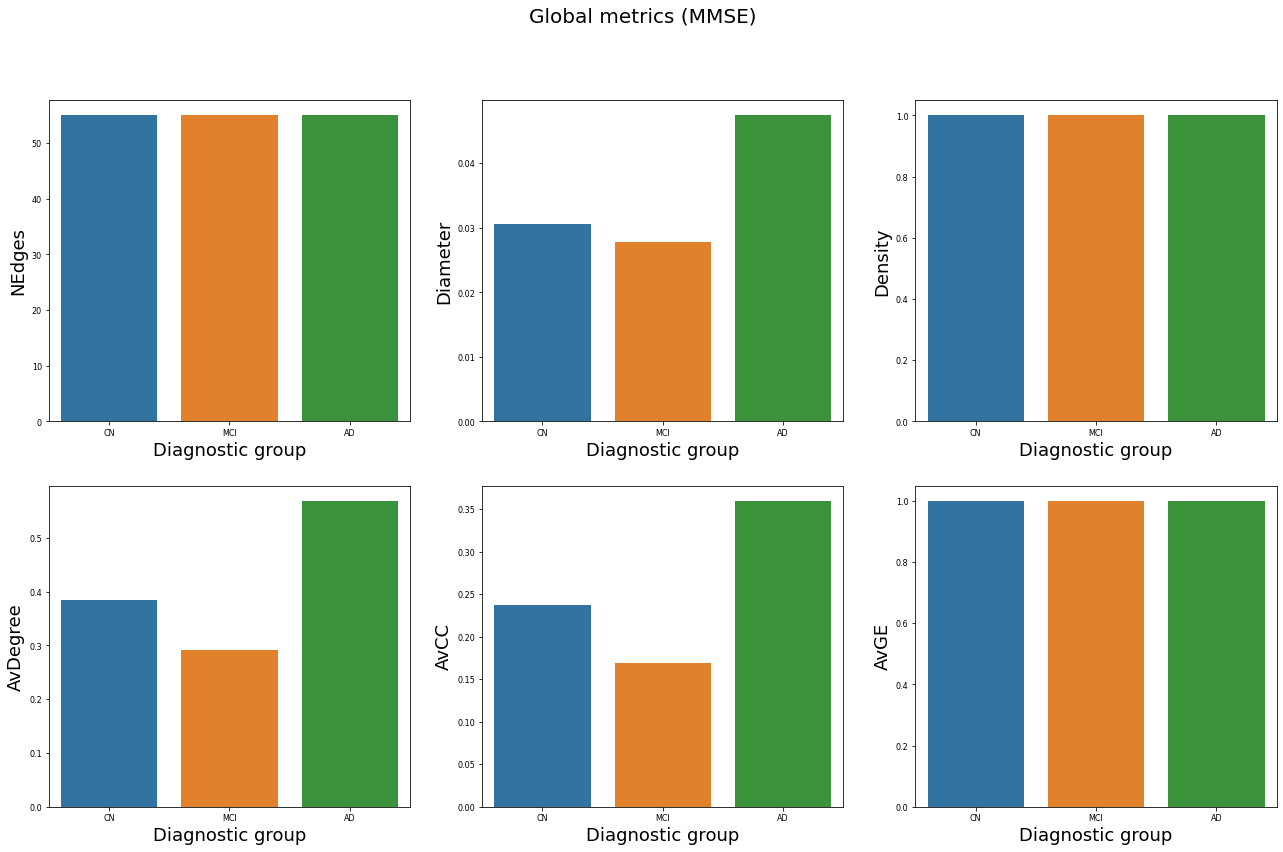

In [133]:
plot_global_metrics(MMSE_gm, 'MMSE')

### 7.3. MoCA

#### 7.1.1. CENTRALITY MEASURES

In [134]:
print("Controls----------------------------------")
CM_MOCA_CN = centrality(MOCA_CN_graph, MOCA_columns)
CM_MOCA_CN.to_csv("./Results/MOCA/CM_CN.csv", sep=";")
display(CM_MOCA_CN)
print("MCI----------------------------------")
CM_MOCA_MCI = centrality(MOCA_MCI_graph, MOCA_columns)
CM_MOCA_MCI.to_csv("./Results/MOCA/CM_MCI.csv", sep=";")
display(CM_MOCA_MCI)
print("AD----------------------------------")
CM_MOCA_AD = centrality(MOCA_AD_graph, MOCA_columns)
CM_MOCA_AD.to_csv("./Results/MOCA/CM_AD.csv", sep=";")
display(CM_MOCA_AD)

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Mo1_TMK               0.044065              0.050351                0.228527   
Mo2_CC                0.053979              0.057798                0.264961   
Mo3_Drawing           0.052623              0.057402                0.264016   
Mo4_Naming            0.050588              0.057421                0.259013   
Mo5_WRT1              0.074376              0.062900                0.362305   
Mo6_WRT2              0.046209              0.052693                0.251043   
Mo7_DSF               0.042245              0.050501                0.212594   
Mo8_DSB               0.031699              0.045590                0.155711   
Mo9_SA                0.034285              0.040795                0.172409   
Mo10_Serial           0.053932              0.056494                0.250899   
Mo11_Rep              0.062035              0.063815                0.311558   
Mo12_VF               0.049299              0.056553                0.233219   
Mo13_Abs              0.049168              0.053121                0.245365   
Mo14_DWR              0.046312              0.056917                0.228519   
Mo15_OT               0.049205              0.054538                0.238960   
Mo16_OP               0.050360              0.056080                0.251770   

             Betweenness_Centrality  
Mo1_TMK                    0.009524  
Mo2_CC                     0.019048  
Mo3_Drawing                0.285714  
Mo4_Naming                 0.114286  
Mo5_WRT1                   0.000000  
Mo6_WRT2                   0.190476  
Mo7_DSF                    0.209524  
Mo8_DSB                    0.161905  
Mo9_SA                     0.000000  
Mo10_Serial                0.142857  
Mo11_Rep                   0.000000  
Mo12_VF                    0.009524  
Mo13_Abs                   0.000000  
Mo14_DWR                   0.238095  
Mo15_OT                    0.000000  
Mo16_OP                    0.380952

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Mo1_TMK               0.053878              0.061336                0.248139   
Mo2_CC                0.053263              0.060772                0.231875   
Mo3_Drawing           0.050029              0.064405                0.229769   
Mo4_Naming            0.047985              0.058785                0.222040   
Mo5_WRT1              0.063656              0.066323                0.334154   
Mo6_WRT2              0.070043              0.069005                0.346950   
Mo7_DSF               0.056854              0.059933                0.269634   
Mo8_DSB               0.050639              0.056948                0.233250   
Mo9_SA                0.041675              0.056962                0.196897   
Mo10_Serial           0.061257              0.069027                0.270223   
Mo11_Rep              0.054454              0.066670                0.270756   
Mo12_VF               0.061034              0.070408                0.280530   
Mo13_Abs              0.056762              0.062174                0.252288   
Mo14_DWR              0.037043              0.044019                0.173557   
Mo15_OT               0.041772              0.051290                0.184826   
Mo16_OP               0.039522              0.044920                0.178036   

             Betweenness_Centrality  
Mo1_TMK                    0.076190  
Mo2_CC                     0.123810  
Mo3_Drawing                0.200000  
Mo4_Naming                 0.114286  
Mo5_WRT1                   0.257143  
Mo6_WRT2                   0.152381  
Mo7_DSF                    0.000000  
Mo8_DSB                    0.000000  
Mo9_SA                     0.238095  
Mo10_Serial                0.076190  
Mo11_Rep                   0.238095  
Mo12_VF                    0.000000  
Mo13_Abs                   0.000000  
Mo14_DWR                   0.019048  
Mo15_OT                    0.000000  
Mo16_OP                    0.028571

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Mo1_TMK               0.074796              0.091764                0.225730   
Mo2_CC                0.079408              0.093149                0.241602   
Mo3_Drawing           0.091786              0.099679                0.268766   
Mo4_Naming            0.078820              0.095246                0.236005   
Mo5_WRT1              0.097733              0.102976                0.285627   
Mo6_WRT2              0.082793              0.102164                0.251499   
Mo7_DSF               0.087799              0.096668                0.262038   
Mo8_DSB               0.095351              0.103420                0.272986   
Mo9_SA                0.075028              0.082391                0.224034   
Mo10_Serial           0.088349              0.103686                0.258650   
Mo11_Rep              0.086236              0.095859                0.259617   
Mo12_VF               0.086876              0.097942                0.252750   
Mo13_Abs              0.087009              0.094972                0.255422   
Mo14_DWR              0.084916              0.088544                0.250591   
Mo15_OT               0.077546              0.084746                0.225103   
Mo16_OP               0.074587              0.082507                0.218263   

             Betweenness_Centrality  
Mo1_TMK                    0.276190  
Mo2_CC                     0.085714  
Mo3_Drawing                0.000000  
Mo4_Naming                 0.152381  
Mo5_WRT1                   0.276190  
Mo6_WRT2                   0.409524  
Mo7_DSF                    0.000000  
Mo8_DSB                    0.019048  
Mo9_SA                     0.000000  
Mo10_Serial                0.190476  
Mo11_Rep                   0.180952  
Mo12_VF                    0.000000  
Mo13_Abs                   0.161905  
Mo14_DWR                   0.000000  
Mo15_OT                    0.000000  
Mo16_OP                    0.066667

#### Plot centrality metrics

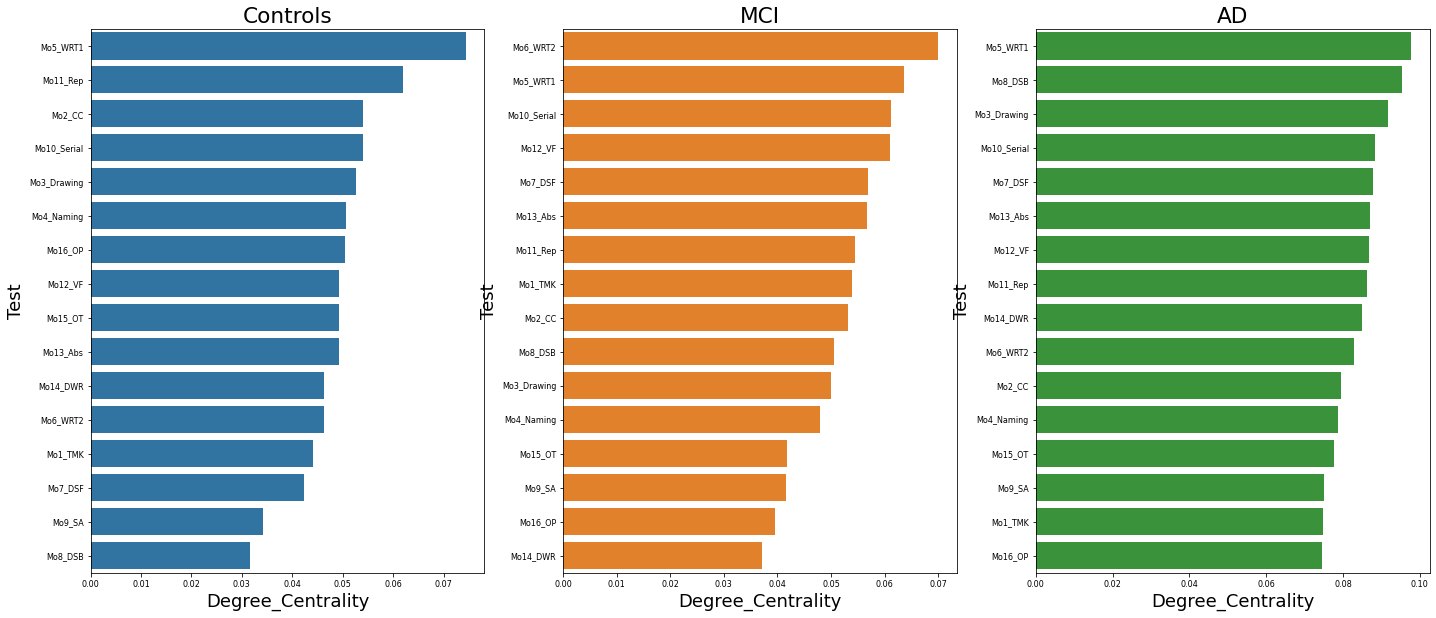

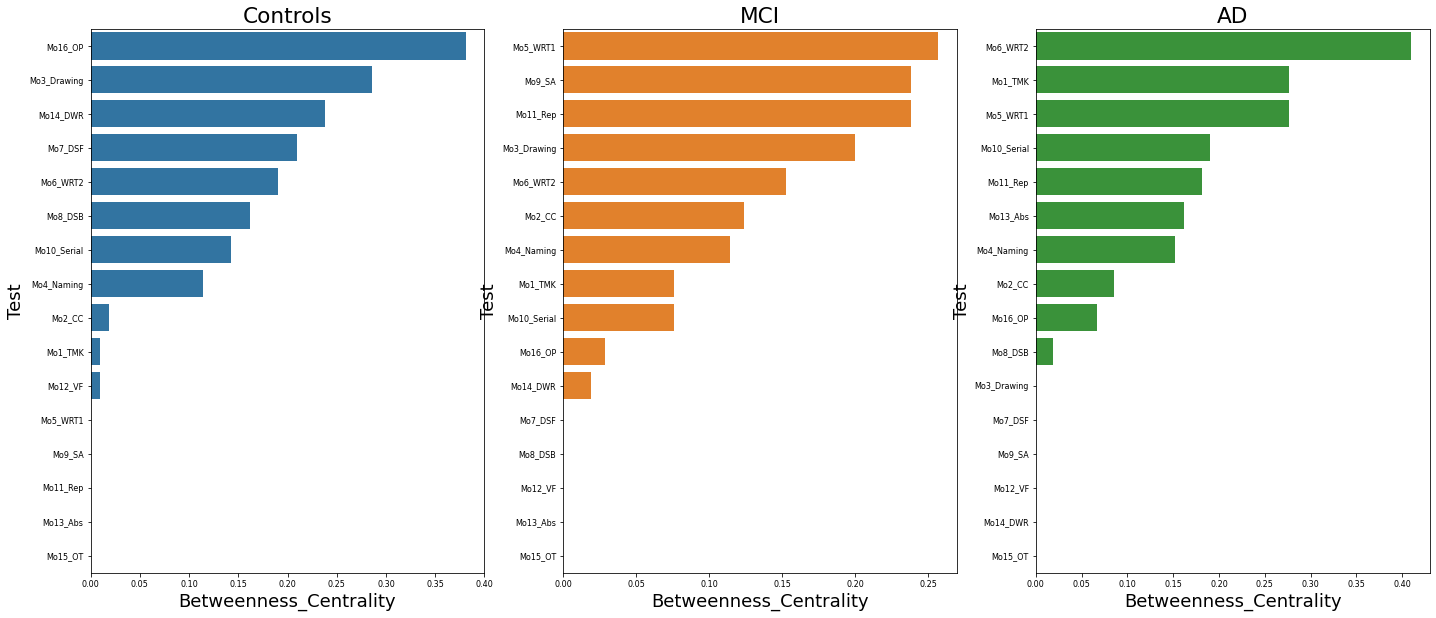

In [135]:
plot_centrality(MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph, MOCA_columns, "Degree_Centrality",'MOCA')
plot_centrality(MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph, MOCA_columns, "Betweenness_Centrality", 'MOCA')

#### Relation between node degree and betweenness centrality

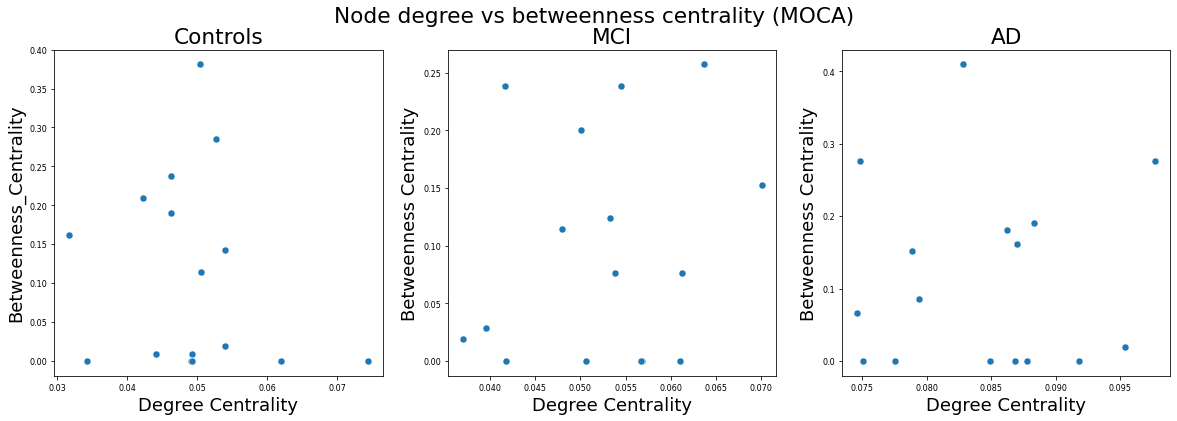

In [136]:
#Get centrality metrics table
MOCA_CN_centrality = centrality(MOCA_CN_graph, MOCA_columns)
MOCA_MCI_centrality = centrality(MOCA_MCI_graph, MOCA_columns)
MOCA_AD_centrality = centrality(MOCA_AD_graph, MOCA_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MOCA_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MOCA_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MOCA_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (MOCA)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.savefig("./Results/Figures/Metrics/BCvsDG_MOCA.svg", format="svg")
plt.show()

#### 7.1.2. GLOBAL METRICS

In [137]:
MOCA_gm = global_metrics([MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph])
MOCA_gm.reset_index(inplace=True)
MOCA_gm

index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE
0    CN     16    120  0.050079     1.0   0.74098          1.0  0.182495  1.0
1   MCI     16    120  0.036204     1.0  0.787374          1.0  0.112654  1.0
2    AD     16    120  0.045455     1.0  1.264718          1.0   0.20536  1.0

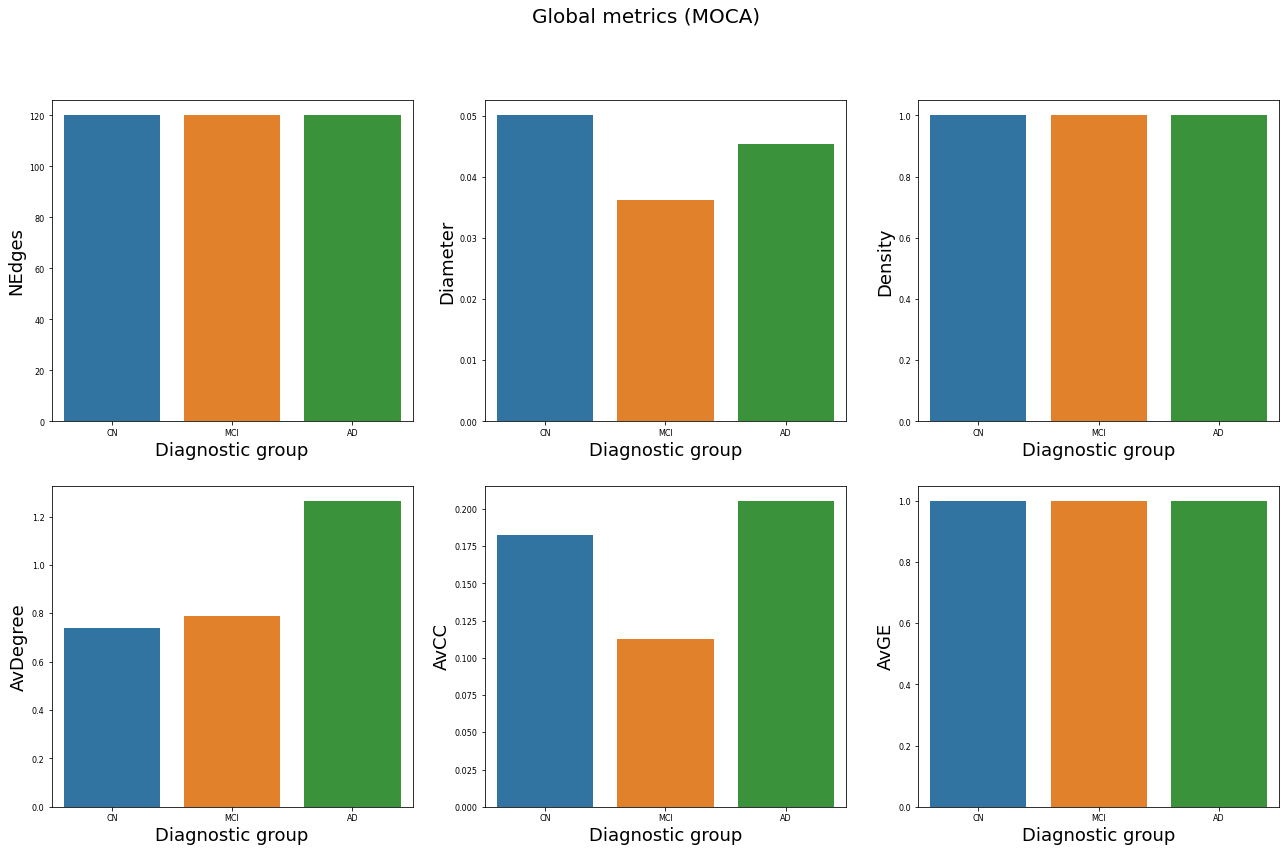

In [138]:
plot_global_metrics(MOCA_gm, 'MOCA')

### 7.4. Merged

#### 7.1.1. CENTRALITY MEASURES

In [139]:
print("Controls----------------------------------")
CM_merged_CN = centrality(merged_CN_graph, merged_columns)
CM_merged_CN.to_csv("./Results/merged/CM_CN.csv", sep=";")
display(CM_merged_CN)
print("MCI----------------------------------")
CM_merged_MCI = centrality(merged_MCI_graph, merged_columns)
CM_merged_MCI.to_csv("./Results/merged/CM_MCI.csv", sep=";")
display(CM_merged_MCI)
print("AD----------------------------------")
CM_merged_AD = centrality(merged_AD_graph, merged_columns)
CM_merged_AD.to_csv("./Results/merged/CM_AD.csv", sep=";")
display(CM_merged_AD)

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1_WR                 0.073767              0.075884                0.207445   
Q2_Comm               0.071923              0.080020                0.191970   
Q3_CP                 0.071234              0.073471                0.194634   
Q4_DWR                0.068562              0.074693                0.194389   
Q5_NT                 0.061694              0.073139                0.167062   
Q6_IP                 0.044609              0.059291                0.121848   
Q7_O                  0.077306              0.088039                0.215581   
Q8_WRT                0.064342              0.075100                0.174445   
Q9_RTI                0.060469              0.074561                0.167860   
Q10_Comp              0.060730              0.076733                0.169085   
Q11_WFD               0.057707              0.068087                0.151376   
Q12_SL                0.048435              0.068195                0.135010   
Q13_NC                0.045044              0.064243                0.122328   
MM1_OT                0.043512              0.059363                0.118729   
MM2_OP                0.045927              0.063092                0.123295   
MM3_Reg               0.024863              0.066325                0.079167   
MM4_SB                0.068769              0.076623                0.185845   
MM5_RR                0.048220              0.063917                0.129889   
MM6_NCO               0.040833              0.059597                0.114511   
MM7_Rep               0.060197              0.076800                0.173731   
MM8_CI                0.050330              0.070297                0.142672   
MM9_Read              0.047237              0.068524                0.128798   
MM10_Write            0.051169              0.072600                0.143643   
MM11_Draw             0.061113              0.071514                0.166448   
Mo1_TMK               0.053787              0.072649                0.152373   
Mo2_CC                0.053695              0.068835                0.151021   
Mo3_Drawing           0.062799              0.075725                0.171797   
Mo4_Naming            0.061166              0.071541                0.163306   
Mo5_WRT1              0.059098              0.073357                0.164387   
Mo6_WRT2              0.056013              0.069075                0.152150   
Mo7_DSF               0.053145              0.063409                0.147533   
Mo8_DSB               0.050869              0.067661                0.141659   
Mo9_SA                0.055021              0.066501                0.143187   
Mo10_Serial           0.057465              0.074723                0.158594   
Mo11_Rep              0.060933              0.079079                0.168681   
Mo12_VF               0.051311              0.066172                0.138087   
Mo13_Abs              0.058208              0.070441                0.161003   
Mo14_DWR              0.050315              0.065144                0.139604   
Mo15_OT               0.066507              0.085225                0.190046   
Mo16_OP               0.057910              0.080686                0.165640   

             Betweenness_Centrality  
Q1_WR                      0.000000  
Q2_Comm                    0.070175  
Q3_CP                      0.000000  
Q4_DWR                     0.091768  
Q5_NT                      0.000000  
Q6_IP                      0.062078  
Q7_O                       0.033738  
Q8_WRT                     0.002699  
Q9_RTI                     0.039136  
Q10_Comp                   0.000000  
Q11_WFD                    0.012146  
Q12_SL                     0.053981  
Q13_NC                     0.125506  
MM1_OT                     0.113360  
MM2_OP                     0.101215  
MM3_Reg                    0.000000  
MM4_SB                     0.018893  
MM5_RR                     0.067476  
MM6_NCO   

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1_WR                 0.061223              0.067188                0.212554   
Q2_Comm               0.042025              0.058136                0.138021   
Q3_CP                 0.047441              0.060170                0.158040   
Q4_DWR                0.057527              0.067307                0.203268   
Q5_NT                 0.053400              0.064746                0.168664   
Q6_IP                 0.046259              0.062428                0.150740   
Q7_O                  0.047046              0.060646                0.156376   
Q8_WRT                0.053588              0.066036                0.179078   
Q9_RTI                0.049089              0.064924                0.163435   
Q10_Comp              0.045050              0.059756                0.145364   
Q11_WFD               0.053168              0.066572                0.171962   
Q12_SL                0.060590              0.067283                0.196325   
Q13_NC                0.049269              0.063411                0.163796   
MM1_OT                0.052167              0.068252                0.173763   
MM2_OP                0.038974              0.056854                0.128471   
MM3_Reg               0.046544              0.062327                0.151631   
MM4_SB                0.046572              0.060083                0.153042   
MM5_RR                0.035931              0.051947                0.118387   
MM6_NCO               0.032442              0.047675                0.105357   
MM7_Rep               0.041687              0.054016                0.132556   
MM8_CI                0.037613              0.059027                0.124445   
MM9_Read              0.031753              0.048365                0.104517   
MM10_Write            0.038265              0.051332                0.123681   
MM11_Draw             0.046883              0.062812                0.154045   
Mo1_TMK               0.048081              0.060169                0.159744   
Mo2_CC                0.057877              0.064091                0.187238   
Mo3_Drawing           0.051370              0.064386                0.165287   
Mo4_Naming            0.051143              0.064734                0.167485   
Mo5_WRT1              0.052836              0.065510                0.173643   
Mo6_WRT2              0.058913              0.069770                0.194455   
Mo7_DSF               0.048207              0.059221                0.156744   
Mo8_DSB               0.043271              0.056458                0.137714   
Mo9_SA                0.047523              0.063765                0.159157   
Mo10_Serial           0.046240              0.061477                0.149893   
Mo11_Rep              0.041054              0.058566                0.135396   
Mo12_VF               0.047059              0.058433                0.151847   
Mo13_Abs              0.049988              0.064674                0.162243   
Mo14_DWR              0.049084              0.060165                0.163407   
Mo15_OT               0.055805              0.061941                0.184203   
Mo16_OP               0.037307              0.054168                0.119046   

             Betweenness_Centrality  
Q1_WR                      0.000000  
Q2_Comm                    0.060729  
Q3_CP                      0.240216  
Q4_DWR                     0.122807  
Q5_NT                      0.008097  
Q6_IP                      0.067476  
Q7_O                       0.106613  
Q8_WRT                     0.020243  
Q9_RTI                     0.010796  
Q10_Comp                   0.022942  
Q11_WFD                    0.048583  
Q12_SL                     0.000000  
Q13_NC                     0.012146  
MM1_OT                     0.090418  
MM2_OP                     0.323887  
MM3_Reg                    0.006748  
MM4_SB                     0.068826  
MM5_RR                     0.043185  
MM6_NCO   

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1_WR                 0.087768              0.109319                0.163300   
Q2_Comm               0.067265              0.087151                0.117693   
Q3_CP                 0.091353              0.104601                0.162707   
Q4_DWR                0.093206              0.111464                0.173829   
Q5_NT                 0.084141              0.099392                0.154295   
Q6_IP                 0.085337              0.105870                0.156967   
Q7_O                  0.106623              0.121654                0.194919   
Q8_WRT                0.070429              0.105220                0.133414   
Q9_RTI                0.084923              0.101425                0.154284   
Q10_Comp              0.086566              0.105832                0.153601   
Q11_WFD               0.067265              0.093952                0.122930   
Q12_SL                0.101063              0.111549                0.186400   
Q13_NC                0.093155              0.112168                0.170443   
MM1_OT                0.110767              0.121703                0.204519   
MM2_OP                0.088169              0.109591                0.166064   
MM3_Reg               0.072748              0.090875                0.132053   
MM4_SB                0.107559              0.121575                0.197922   
MM5_RR                0.090069              0.110020                0.169734   
MM6_NCO               0.084940              0.105992                0.158718   
MM7_Rep               0.071786              0.089762                0.132426   
MM8_CI                0.090038              0.111891                0.161179   
MM9_Read              0.066351              0.086150                0.120450   
MM10_Write            0.087346              0.110544                0.165000   
MM11_Draw             0.073708              0.093958                0.133998   
Mo1_TMK               0.075755              0.099837                0.136533   
Mo2_CC                0.072581              0.098679                0.129697   
Mo3_Drawing           0.095022              0.111654                0.171521   
Mo4_Naming            0.092533              0.113813                0.166955   
Mo5_WRT1              0.107407              0.111947                0.194572   
Mo6_WRT2              0.109601              0.123592                0.208137   
Mo7_DSF               0.069716              0.095717                0.126186   
Mo8_DSB               0.090939              0.103250                0.159894   
Mo9_SA                0.064811              0.086555                0.119146   
Mo10_Serial           0.087587              0.103209                0.157512   
Mo11_Rep              0.085326              0.104922                0.156867   
Mo12_VF               0.063277              0.083880                0.114153   
Mo13_Abs              0.080506              0.094136                0.144801   
Mo14_DWR              0.067036              0.093536                0.122034   
Mo15_OT               0.099782              0.119055                0.191101   
Mo16_OP               0.084134              0.114049                0.156781   

             Betweenness_Centrality  
Q1_WR                      0.049933  
Q2_Comm                    0.133603  
Q3_CP                      0.026991  
Q4_DWR                     0.161943  
Q5_NT                      0.075574  
Q6_IP                      0.114710  
Q7_O                       0.083671  
Q8_WRT                     0.025641  
Q9_RTI                     0.013495  
Q10_Comp                   0.009447  
Q11_WFD                    0.006748  
Q12_SL                     0.017544  
Q13_NC                     0.000000  
MM1_OT                     0.004049  
MM2_OP                     0.004049  
MM3_Reg                    0.147099  
MM4_SB                     0.000000  
MM5_RR                     0.062078  
MM6_NCO   

#### Plot centrality metrics

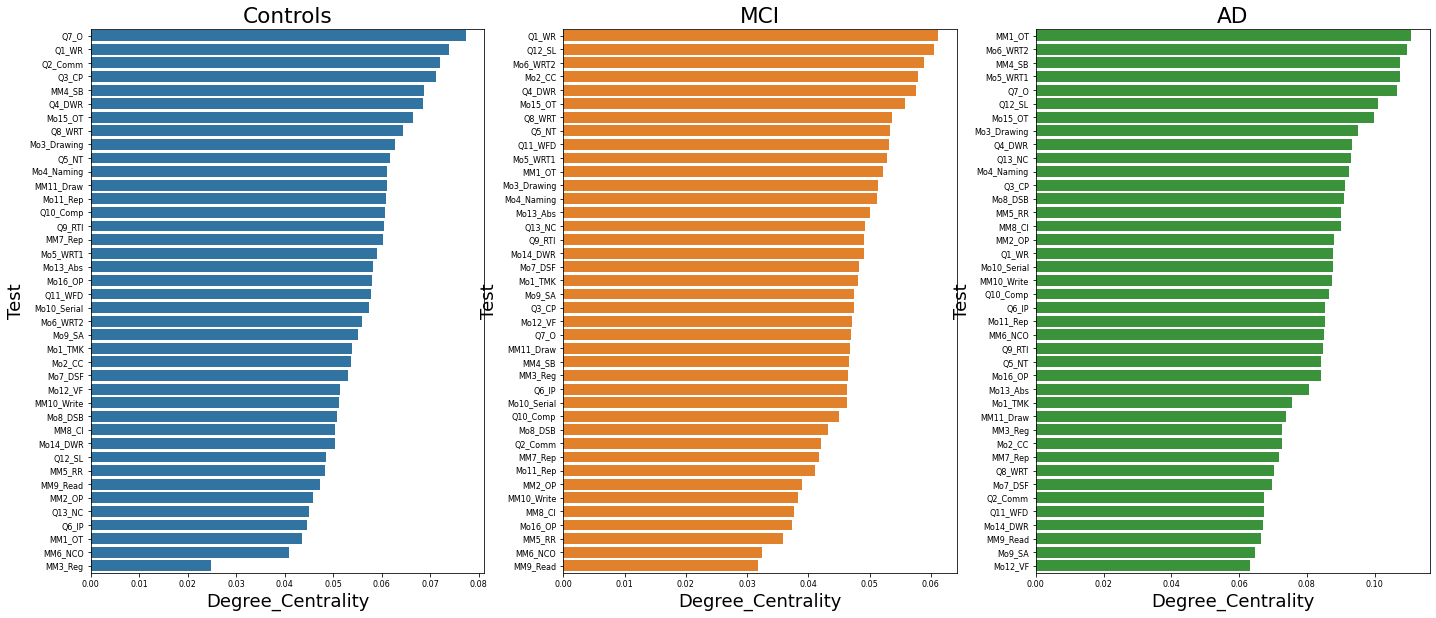

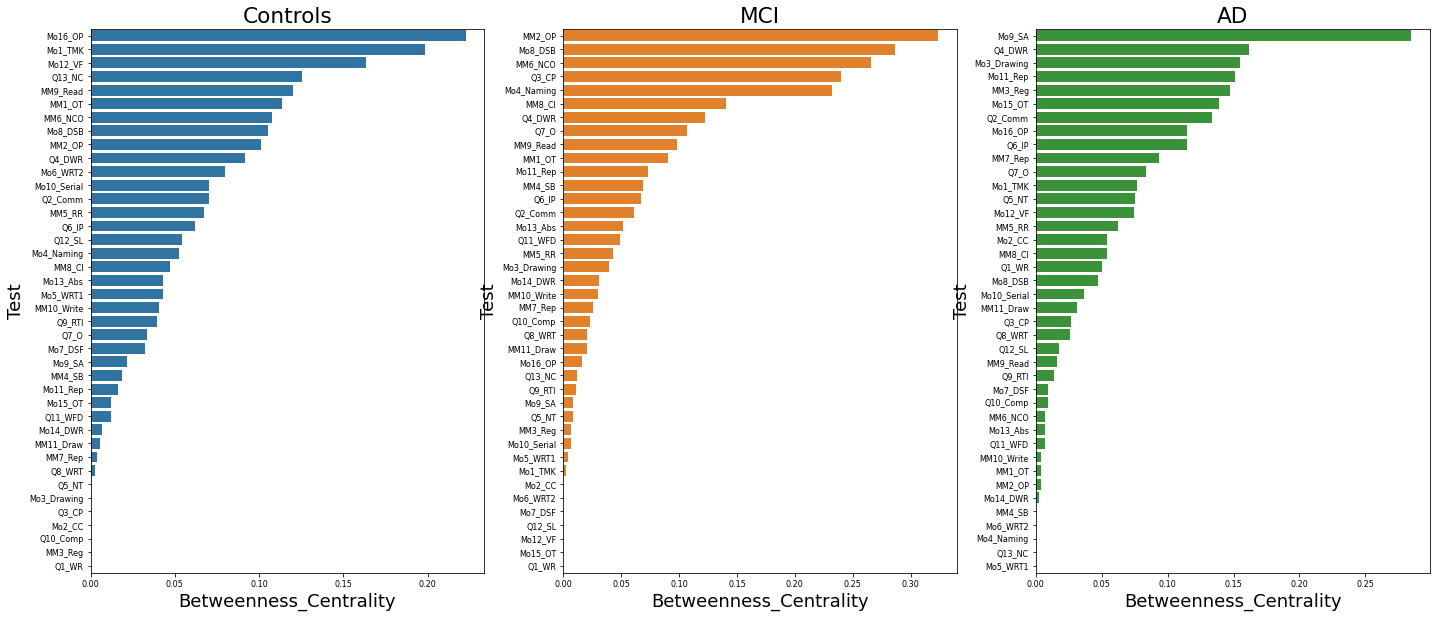

In [140]:
plot_centrality(merged_CN_graph, merged_MCI_graph, merged_AD_graph, merged_columns, "Degree_Centrality", 'merged')
plot_centrality(merged_CN_graph, merged_MCI_graph, merged_AD_graph, merged_columns, "Betweenness_Centrality", 'merged')

#### Relation between node degree and betweenness centrality

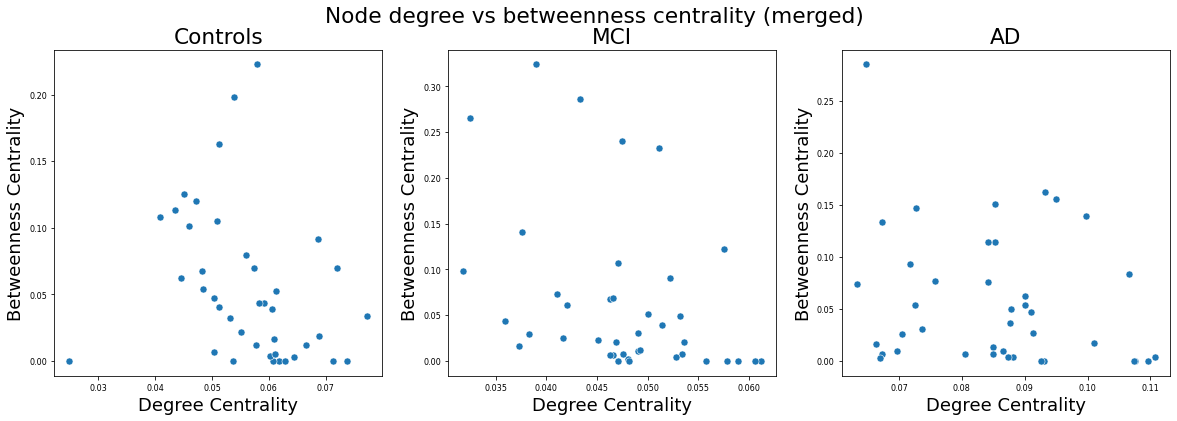

In [141]:
#Get centrality metrics table
merged_CN_centrality = centrality(merged_CN_graph, merged_columns)
merged_MCI_centrality = centrality(merged_MCI_graph, merged_columns)
merged_AD_centrality = centrality(merged_AD_graph, merged_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=merged_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=merged_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=merged_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (merged)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.savefig("./Results/Figures/Metrics/BCvsDG_merged.svg", format="svg")
plt.show()

#### 7.1.2. GLOBAL METRICS

In [142]:
merged_gm = global_metrics([merged_CN_graph, merged_MCI_graph, merged_AD_graph])
merged_gm.reset_index(inplace=True)
merged_gm

index NNodes NEdges  Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     40    756   0.02798  0.969231  2.199828     0.987185  0.075977   
1   MCI     40    780  0.014572       1.0  1.852759          1.0    0.0658   
2    AD     40    780  0.031649       1.0  3.323374          1.0  0.108622   

       AvGE  
0  0.984615  
1       1.0  
2       1.0

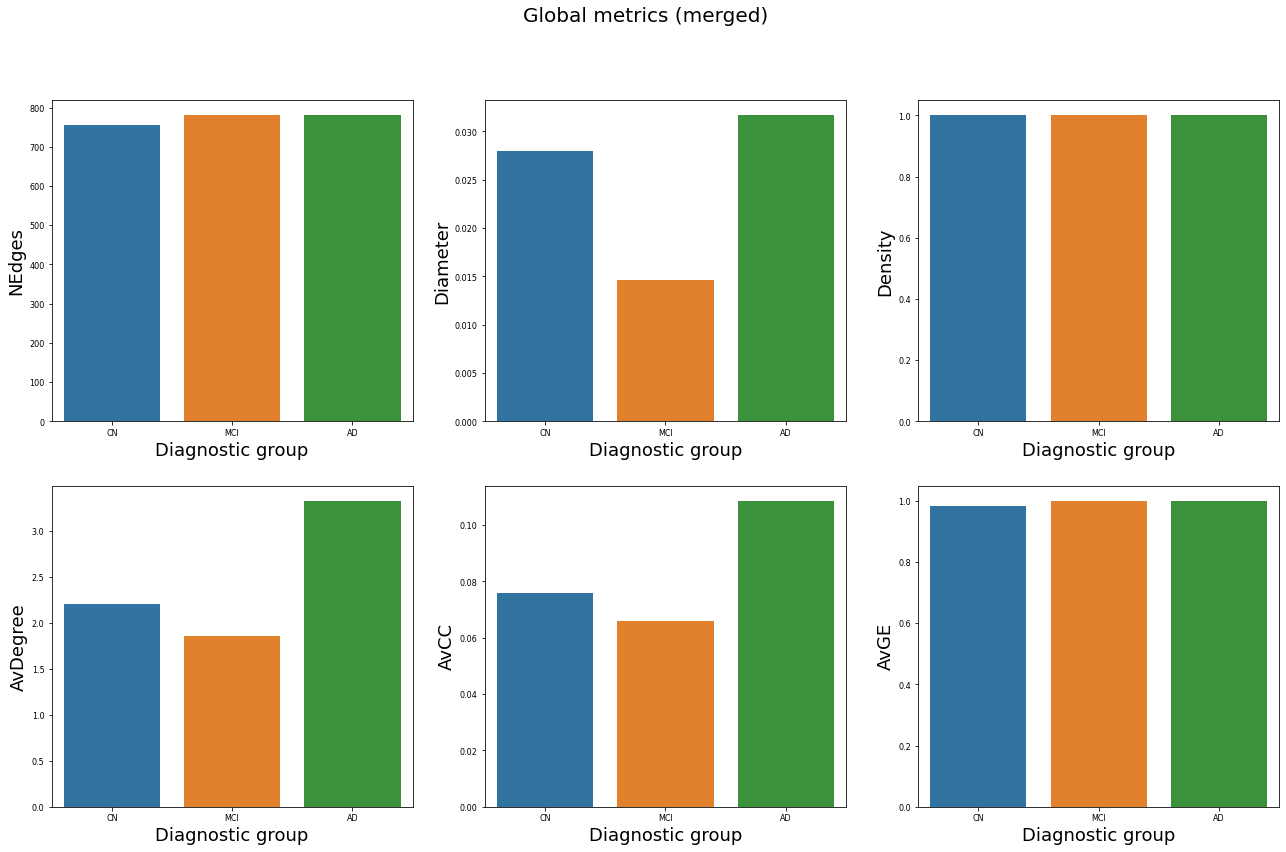

In [143]:
plot_global_metrics(merged_gm, 'merged')

## 8. COMMUNITY DETECTION

In [144]:
import networkx.algorithms.community as nx_comm

#### 1. PARTITIONS

#### 1.1. Louvain algorithm:

**Louvain Community Detection Algorithm** is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization. 

The community structure of a network indexes the sub-division of such a network into segregated communities ormodules that contribute to the same processes while alsoallowing for a visual inspection of the network

Note that the order in which the nodes are considered can affect the final output. In the algorithm the ordering happens using a random shuffle. 

- In the epilepsy paper they calculated modularity 1,000 times for each group, and the highest proportion was chosen as the number of modules in that group. 

- Furthermore, in order to be certain regarding the module assignment for each node, they created a script that calculated the proportion of module assignment for each node in order to have each node assigned to the module with the highest probability. 

#### 1.2. Greedy modularity algorithm

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

#### 1.3. Kernighan-Lin bisection algorithm

This function uses **Kernighan-Lin bipartition algorithm** to partition a graph into two blocks.

This algorithm partitions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets. The pairs are chosen according to a modified form of Kernighan-Lin, which moves node individually, alternating between sides to keep the bisection balanced.

#### 1.4. Asynchronous label propagation algorithm

This function uses the **asynchronous label propagation algorithm** which is probabilistic and the found communities may vary on different executions.

The algorithm proceeds as follows. After initializing each node with a unique label, the algorithm repeatedly sets the label of a node to be the label that appears most frequently among that nodes neighbors. The algorithm halts when each node has the label that appears most frequently among its neighbors. The algorithm is asynchronous because each node is updated without waiting for updates on the remaining nodes.

In [145]:
def community_detection(graphs_ls, algorithm):
    
    print("--------------------------------")
    print(algorithm, "algorithm")
    print("--------------------------------")
      
    partition_ls = []
    dx_ls = ['CN', 'MCI', 'AD']
    
    for i in range(len(graphs_ls)):
        if algorithm == "Louvain": 
            partition = nx_comm.louvain_communities(graphs_ls[i], weight='weight',seed=0)
            
        elif algorithm == "Greedy":
            partition = nx_comm.greedy_modularity_communities(graphs_ls[i], weight='weight')
        
        elif algorithm == "Bisection":
            partition = nx_comm.kernighan_lin_bisection(graphs_ls[i], weight='weight', seed=0)
            
        elif algorithm == "Label Propagation":
            partition = list(nx_comm.asyn_lpa_communities(graphs_ls[i], weight='weight', seed=0))
        
        else:
            print("This algorithm is not implemented. Please, try again.")
            break
            
        partition_ls.append(partition) #partitions
        print(dx_ls[i], ": ", partition)
        
        MI = nx_comm.modularity(graphs_ls[i], partition, weight='weight') #modularity index  
        print("Modularity Index: ", MI, "\n")
    
    return partition_ls

#### 2. DRAW GRAPH BY COMMUNITIES

In [146]:
def color_communities(graph, partition):
    
    colors = {} #create empty node dictionary
    
    #Convert set of partitions into node dictionary
    for i in range(len(partition)): #iterate for each group
        for node in partition[i]:
            colors[node] = i
            
    #Sort dictionary by keys
    node_list = list(colors.keys())
    node_list.sort()
    sorted_colors = {i: colors[i] for i in node_list}
            
    return list(sorted_colors.values())

In [147]:
def draw_graph_communities(graphs_ls, partition_ls, test_labels, pos, battery_name, algorithm):

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(20,6))
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]
        partition = partition_ls[i]
        
        #node colors
        colors = color_communities(graph, partition)

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, cmap= plt.cm.Spectral,
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, cmap= plt.cm.Spectral,
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title to subfigures
    fig.suptitle(algorithm + " (" + battery_name +")", fontsize=20)
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results/Figures/Modularity/"+ battery_name + "/"+ algorithm +".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

#### 3. COMMUNITY SUBGRAPH METRICS

Each community detected by an algorithm is going to be considered as a subgraph. 

In [148]:
def metrics(graph):
    """Function to create a dictionary with all the metrics computed for a community"""
    
    metrics_dict = {}
    
    #GLOBAL METRICS
    #Compute the number of nodes 
    metrics_dict['NNodes'] = graph.number_of_nodes()
    #Compute the number of edges 
    metrics_dict['NEdges'] = graph.number_of_edges()
    #Compute the diameter of the graph
    shortest = nx.shortest_path_length(graph, weight="weight")
    ecc = nx.eccentricity(graph, sp=dict(shortest))
    metrics_dict['Diameter'] = nx.diameter(graph, e=ecc)
    #Compute the density of the graph
    metrics_dict['Density'] = nx.density(graph)
    #Compute the average degree of the network  
    metrics_dict['AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes()
    #Compute the transitivity of the graph
    metrics_dict['Transitivity'] = nx.transitivity(graph)
    #Compute the average clustering coefficient
    metrics_dict['AvCC'] = nx.average_clustering(graph,weight='weight')
    #Compute the average global efficiency (shortest path)
    metrics_dict['AvGE'] = nx.global_efficiency(graph)
    
    #TESTS BELONGING TO THE COMMUNITY
    metrics_dict['Tests'] = list(dict(graph.nodes(data="Label")).values())
    
    return metrics_dict

In [149]:
def community_metrics(graph, partition):
    
    """Function to create a dataframe with all the metrics computed for each of the communities"""
    
    domains_list = list(dict(graph.nodes(data="Cognitive Domain")).values())
    domains = [*set(domains_list)] #unique list of domains
    
    df = pd.DataFrame(columns = ['Index','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 
                                 'Transitivity','AvCC', 'AvGE', 'Tests'] + domains) #empty dataframe
    
    for i in range(len(partition)): #iterate for each community
        #create subgraph for this community
        subgraph = graph.subgraph(partition[i]) 
        #compute metrics for the subgraph 
        metrics_dict = metrics(subgraph)
        
        #community index
        metrics_dict['Index'] = i
        
        #representation of each neurocognitive domain
        domains_list_community = list(dict(subgraph.nodes(data="Cognitive Domain")).values())
        
        for domain in domains: 
            #domain_count_total = domains_list.count(domain)
            domain_count_community = domains_list_community.count(domain)
            domain_count_total = len(domains_list_community)
            metrics_dict[domain] = domain_count_community/domain_count_total #percentage of representation 
        
        #introduce metrics in new row
        df = df.append(metrics_dict, ignore_index=True)
        
    return df

#### 4. DOMAINS REPRESENTATION IN EACH COMMUNITY

In [150]:
def domains_rep(graphs_ls, partition_ls, battery_name, algorithm): 
    domains_ls = np.unique(list(nx.get_node_attributes(graphs_ls[0], 'Cognitive Domain').values())).tolist()
    columns = ['Index'] + domains_ls
    dx_ls = ['CN', 'MCI', 'AD']
    for i in range(len(graphs_ls)):
        graph = graphs_ls[i]
        partition = partition_ls[i]
        domains = community_metrics(graph, partition) #get data
        nodomains = domains.loc[:, ~domains.columns.isin(columns)]
        filepath = "./Results/Communities/" + battery_name + "/" + algorithm + "_" + dx_ls[i] + ".csv" 
        nodomains.to_csv(filepath, index=False)
        
        #Reshape data with melt() function
        domains = domains[columns]
        domains_rs = domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
        
        #send data to build stacked barplot in R
        filepath = "./Results/" + battery_name + "/" + algorithm + "_" + dx_ls[i] + ".csv" 
        domains_rs.to_csv(filepath, index=False) 
     

### 8.1. ADAS-Cog

In [151]:
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]

#### 8.1.1. LOUVAIN ALGORITHM

In [152]:
ADAS_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 3, 7}, {2, 4, 5, 6, 8, 12}, {1, 10, 11, 9}]
Modularity Index:  0.23109224207541662 

MCI :  [{0, 3, 7}, {9, 10, 11, 5}, {1, 2, 4, 6, 8, 12}]
Modularity Index:  0.22148481313980212 

AD :  [{0, 3, 6, 7}, {1, 5, 4, 12}, {2, 8, 9, 10, 11}]
Modularity Index:  0.14293614334231983 



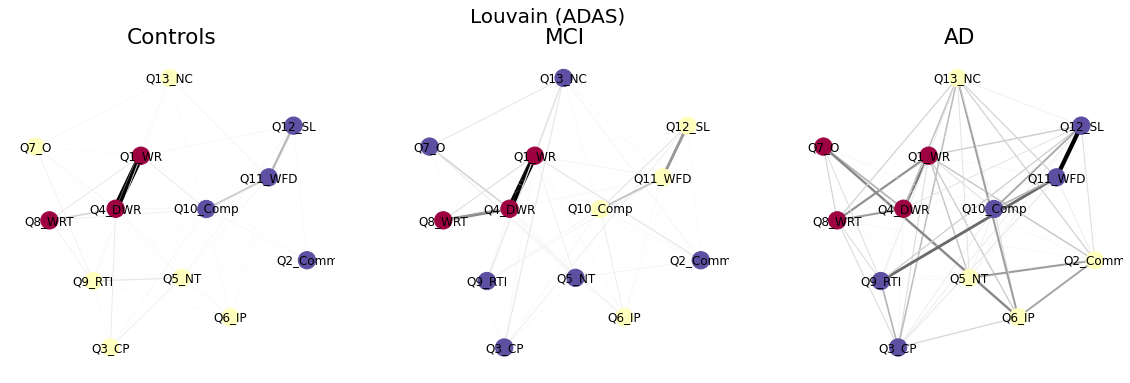

In [153]:
draw_graph_communities(graphs_ls, ADAS_Louvain_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Louvain')

#### Subgraph metrics

In [154]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3  0.280964     1.0  0.621274          1.0  0.353061  1.0   
1     1      6     15  0.051924     1.0  0.224667          1.0  0.328306  1.0   
2     2      4      6  0.076438     1.0  0.302338          1.0  0.284131  1.0   

                                         Tests    Memory Executive  \
0                      [Q1_WR, Q4_DWR, Q8_WRT]       1.0       0.0   
1  [Q3_CP, Q5_NT, Q6_IP, Q7_O, Q9_RTI, Q13_NC]  0.166667  0.333333   
2         [Q2_Comm, Q11_WFD, Q12_SL, Q10_Comp]       0.0       0.0   

  Orientation Attention  Language  
0         0.0       0.0       0.0  
1    0.166667  0.166667  0.166667  
2         0.0       0.0       1.0

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3  0.439859     1.0  0.686782          1.0   0.48111  1.0   
1     1      4      6  0.140052     1.0  0.389671          1.0  0.373748  1.0   
2     2      6     15  0.058828     1.0   0.24944          1.0  0.381853  1.0   

                                           Tests    Memory Executive  \
0                        [Q1_WR, Q4_DWR, Q8_WRT]       1.0       0.0   
1             [Q10_Comp, Q11_WFD, Q12_SL, Q6_IP]       0.0      0.25   
2  [Q2_Comm, Q3_CP, Q5_NT, Q7_O, Q9_RTI, Q13_NC]  0.166667  0.166667   

  Orientation Attention  Language  
0         0.0       0.0       0.0  
1         0.0       0.0      0.75  
2    0.166667  0.166667  0.333333

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      4      6  0.213317     1.0  0.510848          1.0  0.558965  1.0   
1     1      4      6  0.208184     1.0   0.43289          1.0   0.61236  1.0   
2     2      5     10  0.212984     1.0  0.665832          1.0  0.340818  1.0   

                                        Tests Memory Executive Orientation  \
0               [Q1_WR, Q4_DWR, Q7_O, Q8_WRT]   0.75       0.0        0.25   
1             [Q2_Comm, Q13_NC, Q5_NT, Q6_IP]    0.0      0.25         0.0   
2  [Q3_CP, Q9_RTI, Q10_Comp, Q11_WFD, Q12_SL]    0.2       0.2         0.0   

  Attention Language  
0       0.0      0.0  
1      0.25      0.5  
2       0.0      0.6

#### Export results

In [155]:
domains_rep(graphs_ls, ADAS_Louvain_partitions, 'ADAS', 'Louvain')

#### 8.1.2. GREEDY ALGORITHM

In [156]:
ADAS_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({2, 4, 5, 6, 8, 12}), frozenset({1, 10, 11, 9}), frozenset({0, 3, 7})]
Modularity Index:  0.23109224207541662 

MCI :  [frozenset({1, 2, 4, 6, 8, 12}), frozenset({9, 10, 11, 5}), frozenset({0, 3, 7})]
Modularity Index:  0.2214848131398021 

AD :  [frozenset({2, 8, 9, 10, 11}), frozenset({1, 4, 5, 6, 12}), frozenset({0, 3, 7})]
Modularity Index:  0.14201022848599693 



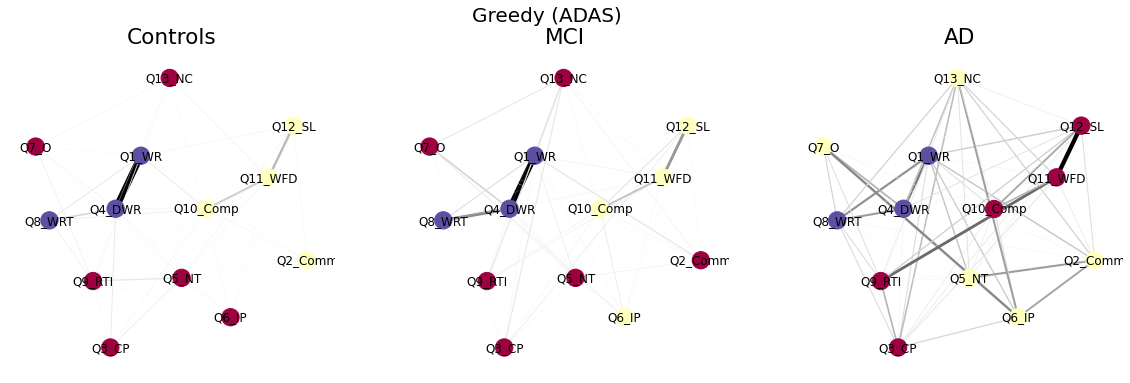

In [157]:
draw_graph_communities(graphs_ls, ADAS_Greedy_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Greedy')

#### Subgraph metrics

In [158]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.051924     1.0  0.224667          1.0  0.328306  1.0   
1     1      4      6  0.076438     1.0  0.302338          1.0  0.284131  1.0   
2     2      3      3  0.280964     1.0  0.621274          1.0  0.353061  1.0   

                                         Tests    Memory Executive  \
0  [Q3_CP, Q5_NT, Q6_IP, Q7_O, Q9_RTI, Q13_NC]  0.166667  0.333333   
1         [Q2_Comm, Q11_WFD, Q12_SL, Q10_Comp]       0.0       0.0   
2                      [Q1_WR, Q4_DWR, Q8_WRT]       1.0       0.0   

  Orientation Attention  Language  
0    0.166667  0.166667  0.166667  
1         0.0       0.0       1.0  
2         0.0       0.0       0.0

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.058828     1.0   0.24944          1.0  0.381853  1.0   
1     1      4      6  0.140052     1.0  0.389671          1.0  0.373748  1.0   
2     2      3      3  0.439859     1.0  0.686782          1.0   0.48111  1.0   

                                           Tests    Memory Executive  \
0  [Q2_Comm, Q3_CP, Q5_NT, Q7_O, Q9_RTI, Q13_NC]  0.166667  0.166667   
1             [Q10_Comp, Q11_WFD, Q12_SL, Q6_IP]       0.0      0.25   
2                        [Q1_WR, Q4_DWR, Q8_WRT]       1.0       0.0   

  Orientation Attention  Language  
0    0.166667  0.166667  0.333333  
1         0.0       0.0      0.75  
2         0.0       0.0       0.0

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10  0.212984     1.0  0.665832          1.0  0.340818  1.0   
1     1      5     10  0.121862     1.0  0.486813          1.0  0.417834  1.0   
2     2      3      3  0.263082     1.0  0.466302          1.0  0.882573  1.0   

                                        Tests Memory Executive Orientation  \
0  [Q3_CP, Q9_RTI, Q10_Comp, Q11_WFD, Q12_SL]    0.2       0.2         0.0   
1       [Q2_Comm, Q5_NT, Q6_IP, Q7_O, Q13_NC]    0.0       0.2         0.2   
2                     [Q1_WR, Q4_DWR, Q8_WRT]    1.0       0.0         0.0   

  Attention Language  
0       0.0      0.6  
1       0.2      0.4  
2       0.0      0.0

#### Export results

In [159]:
domains_rep(graphs_ls, ADAS_Greedy_partitions, 'ADAS', 'Greedy')

#### 8.1.3. BISECTION ALGORITHM

In [160]:
ADAS_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({1, 5, 9, 10, 11, 12}, {0, 2, 3, 4, 6, 7, 8})
Modularity Index:  0.16114241722644163 

MCI :  ({2, 5, 8, 9, 10, 11}, {0, 1, 3, 4, 6, 7, 12})
Modularity Index:  0.1686903744315489 

AD :  ({2, 4, 8, 9, 10, 11}, {0, 1, 3, 5, 6, 7, 12})
Modularity Index:  0.11551408374016062 



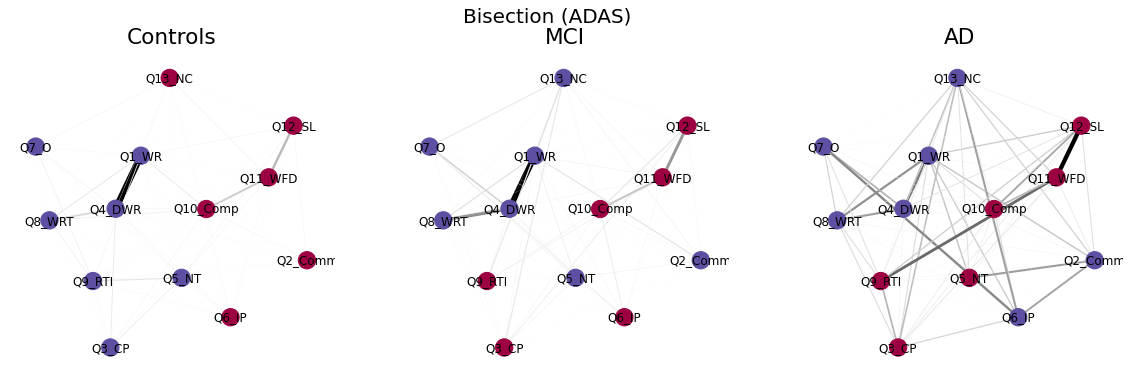

In [161]:
draw_graph_communities(graphs_ls, ADAS_Bisection_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Bisection')

#### Subgraph metrics

In [162]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.049277     1.0  0.282655          1.0  0.155638  1.0   
1     1      7     21  0.077898     1.0  0.526964          1.0  0.088312  1.0   

                                               Tests    Memory Executive  \
0  [Q2_Comm, Q6_IP, Q10_Comp, Q11_WFD, Q12_SL, Q1...       0.0  0.166667   
1  [Q1_WR, Q3_CP, Q4_DWR, Q5_NT, Q7_O, Q8_WRT, Q9...  0.571429  0.142857   

  Orientation Attention  Language  
0         0.0  0.166667  0.666667  
1    0.142857       0.0  0.142857

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.078733     1.0  0.376077          1.0  0.181583  1.0   
1     1      7     21  0.041247     1.0  0.579843          1.0  0.100616  1.0   

                                               Tests    Memory Executive  \
0  [Q3_CP, Q6_IP, Q9_RTI, Q10_Comp, Q11_WFD, Q12_SL]  0.166667  0.333333   
1  [Q1_WR, Q2_Comm, Q4_DWR, Q5_NT, Q7_O, Q8_WRT, ...  0.428571       0.0   

  Orientation Attention  Language  
0         0.0       0.0       0.5  
1    0.142857  0.142857  0.285714

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.127877     1.0  0.641736          1.0  0.255971  1.0   
1     1      7     21  0.131667     1.0   0.75587          1.0  0.392501  1.0   

                                               Tests    Memory Executive  \
0  [Q3_CP, Q5_NT, Q9_RTI, Q10_Comp, Q11_WFD, Q12_SL]  0.166667  0.166667   
1  [Q1_WR, Q2_Comm, Q4_DWR, Q6_IP, Q7_O, Q8_WRT, ...  0.428571  0.142857   

  Orientation Attention  Language  
0         0.0       0.0  0.666667  
1    0.142857  0.142857  0.142857

#### Export results

In [163]:
domains_rep(graphs_ls, ADAS_Bisection_partitions, 'ADAS', 'Bisection')

#### 8.1.4. LABEL PROPAGATION ALGORITHM

In [164]:
ADAS_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  2.220446049250313e-16 

MCI :  [{0, 3, 7}, {1, 2, 4, 5, 6, 8, 9, 10, 11, 12}]
Modularity Index:  0.1900974718713172 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  -2.220446049250313e-16 



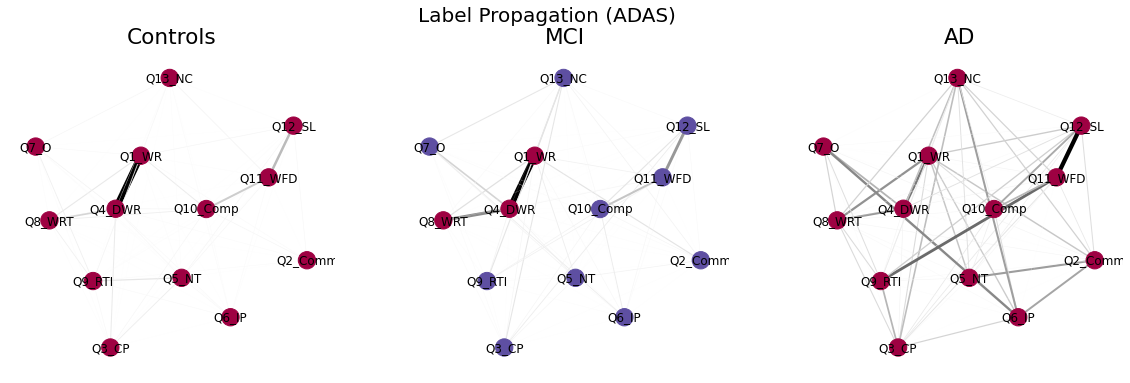

In [165]:
draw_graph_communities(graphs_ls, ADAS_Label_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Label Propagation')

#### Subgraph metrics

In [166]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78  0.024934     1.0  0.596719          1.0  0.049668  1.0   

                                               Tests    Memory Executive  \
0  [Q1_WR, Q2_Comm, Q3_CP, Q4_DWR, Q5_NT, Q6_IP, ...  0.307692  0.153846   

  Orientation Attention  Language  
0    0.076923  0.076923  0.384615

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3  0.439859     1.0  0.686782          1.0   0.48111  1.0   
1     1     10     45  0.036085     1.0  0.463587          1.0  0.127819  1.0   

                                               Tests Memory Executive  \
0                            [Q1_WR, Q4_DWR, Q8_WRT]    1.0       0.0   
1  [Q2_Comm, Q3_CP, Q5_NT, Q6_IP, Q7_O, Q9_RTI, Q...    0.1       0.2   

  Orientation Attention Language  
0         0.0       0.0      0.0  
1         0.1       0.1      0.5

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78  0.072843     1.0  1.133648          1.0  0.177877  1.0   

                                               Tests    Memory Executive  \
0  [Q1_WR, Q2_Comm, Q3_CP, Q4_DWR, Q5_NT, Q6_IP, ...  0.307692  0.153846   

  Orientation Attention  Language  
0    0.076923  0.076923  0.384615

#### Export results

In [167]:
domains_rep(graphs_ls, ADAS_Label_partitions, 'ADAS', 'Asyn')

### 8.2. MMSE

In [168]:
graphs_ls = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]

#### 8.2.1. LOUVAIN ALGORITHM

In [169]:
MMSE_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{2, 10}, {8, 1, 4, 5}, {0, 3, 6, 7, 9}]
Modularity Index:  0.0992433660097898 

MCI :  [{0, 1, 2, 4, 6, 9}, {3, 5, 7, 8, 10}]
Modularity Index:  0.13795289044478526 

AD :  [{1, 3, 4, 8, 9, 10}, {0, 2, 5, 6, 7}]
Modularity Index:  0.06706724849025167 



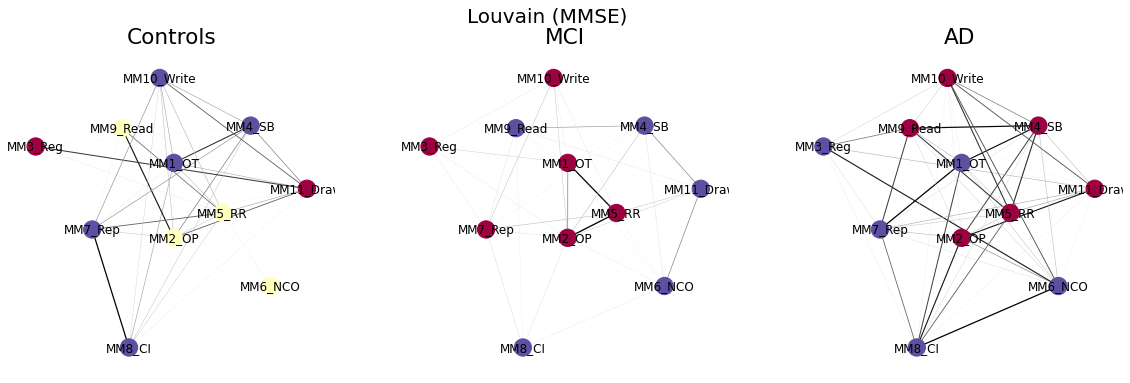

In [170]:
test_labels = None

draw_graph_communities(graphs_ls, MMSE_Louvain_partitions, MMSE_labels, pos_MMSE, 'MMSE', 'Louvain')

#### Subgraph metrics

In [171]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      2      1  0.103104     1.0  0.103104            0       0.0  1.0   
1     1      4      6  0.041413     1.0  0.142663          1.0  0.278342  1.0   
2     2      5     10  0.090433     1.0  0.258472          1.0  0.478115  1.0   

                                           Tests Memory Visuospatial  \
0                           [MM3_Reg, MM11_Draw]    0.5          0.5   
1            [MM9_Read, MM2_OP, MM5_RR, MM6_NCO]   0.25          0.0   
2  [MM1_OT, MM4_SB, MM7_Rep, MM8_CI, MM10_Write]    0.0          0.0   

  Orientation Attention Language  
0         0.0       0.0      0.0  
1        0.25       0.0      0.5  
2         0.2       0.2      0.6

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.047483     1.0  0.242041          1.0   0.30884  1.0   
1     1      5     10  0.035787     1.0  0.137499          1.0  0.350948  1.0   

                                               Tests    Memory Visuospatial  \
0  [MM1_OT, MM2_OP, MM3_Reg, MM5_RR, MM7_Rep, MM1...  0.333333          0.0   
1     [MM4_SB, MM6_NCO, MM8_CI, MM9_Read, MM11_Draw]       0.0          0.2   

  Orientation Attention  Language  
0    0.333333       0.0  0.333333  
1         0.0       0.2       0.6

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.108924     1.0  0.366663          1.0  0.549372  1.0   
1     1      5     10  0.083322     1.0  0.279721          1.0  0.467807  1.0   

                                               Tests    Memory Visuospatial  \
0  [MM2_OP, MM4_SB, MM5_RR, MM9_Read, MM10_Write,...  0.166667     0.166667   
1        [MM1_OT, MM3_Reg, MM6_NCO, MM7_Rep, MM8_CI]       0.2          0.0   

  Orientation Attention  Language  
0    0.166667  0.166667  0.333333  
1         0.2       0.0       0.6

#### Export results

In [172]:
domains_rep(graphs_ls, MMSE_Louvain_partitions, 'MMSE', 'Louvain')

#### 8.2.2. GREEDY ALGORITHM

In [173]:
MMSE_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({0, 3, 6, 7, 9}), frozenset({8, 1, 4, 5}), frozenset({2, 10})]
Modularity Index:  0.0992433660097898 

MCI :  [frozenset({0, 1, 2, 4, 6, 9}), frozenset({3, 5, 7, 8, 10})]
Modularity Index:  0.13795289044478526 

AD :  [frozenset({1, 3, 4, 8, 9, 10}), frozenset({0, 2, 5, 6, 7})]
Modularity Index:  0.06706724849025167 



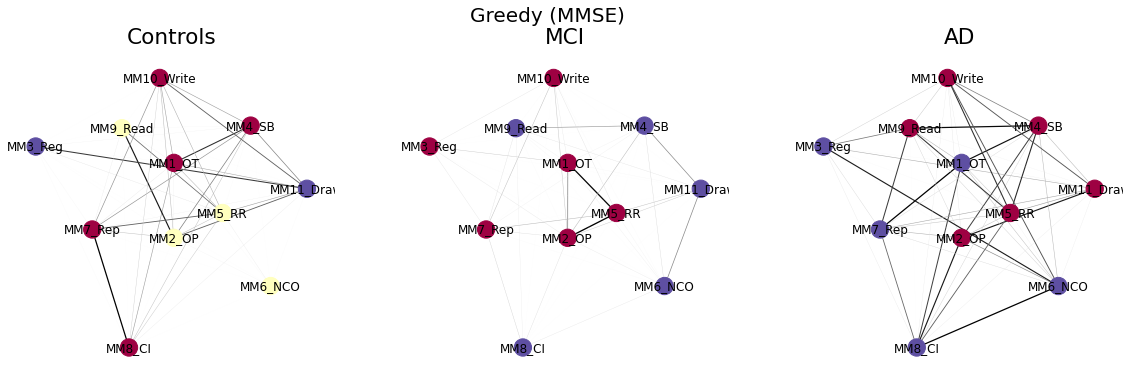

In [174]:
draw_graph_communities(graphs_ls, MMSE_Greedy_partitions, MMSE_labels, pos_MMSE, 'MMSE', 'Greedy')

#### Subgraph metrics

In [175]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10  0.090433     1.0  0.258472          1.0  0.478115  1.0   
1     1      4      6  0.041413     1.0  0.142663          1.0  0.278342  1.0   
2     2      2      1  0.103104     1.0  0.103104            0       0.0  1.0   

                                           Tests Memory Visuospatial  \
0  [MM1_OT, MM4_SB, MM7_Rep, MM8_CI, MM10_Write]    0.0          0.0   
1            [MM9_Read, MM2_OP, MM5_RR, MM6_NCO]   0.25          0.0   
2                           [MM3_Reg, MM11_Draw]    0.5          0.5   

  Orientation Attention Language  
0         0.2       0.2      0.6  
1        0.25       0.0      0.5  
2         0.0       0.0      0.0

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.047483     1.0  0.242041          1.0   0.30884  1.0   
1     1      5     10  0.035787     1.0  0.137499          1.0  0.350948  1.0   

                                               Tests    Memory Visuospatial  \
0  [MM1_OT, MM2_OP, MM3_Reg, MM5_RR, MM7_Rep, MM1...  0.333333          0.0   
1     [MM4_SB, MM6_NCO, MM8_CI, MM9_Read, MM11_Draw]       0.0          0.2   

  Orientation Attention  Language  
0    0.333333       0.0  0.333333  
1         0.0       0.2       0.6

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.108924     1.0  0.366663          1.0  0.549372  1.0   
1     1      5     10  0.083322     1.0  0.279721          1.0  0.467807  1.0   

                                               Tests    Memory Visuospatial  \
0  [MM2_OP, MM4_SB, MM5_RR, MM9_Read, MM10_Write,...  0.166667     0.166667   
1        [MM1_OT, MM3_Reg, MM6_NCO, MM7_Rep, MM8_CI]       0.2          0.0   

  Orientation Attention  Language  
0    0.166667  0.166667  0.333333  
1         0.2       0.0       0.6

#### Export results

In [176]:
domains_rep(graphs_ls, MMSE_Greedy_partitions, 'MMSE', 'Greedy')

#### 8.2.3. BISECTION ALGORITHM

In [177]:
MMSE_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({1, 2, 5, 8, 10}, {0, 3, 4, 6, 7, 9})
Modularity Index:  0.05852955426572551 

MCI :  ({2, 6, 7, 8, 9}, {0, 1, 3, 4, 5, 10})
Modularity Index:  0.06715453477233611 

AD :  ({1, 2, 5, 9, 10}, {0, 3, 4, 6, 7, 8})
Modularity Index:  0.06152500117465062 



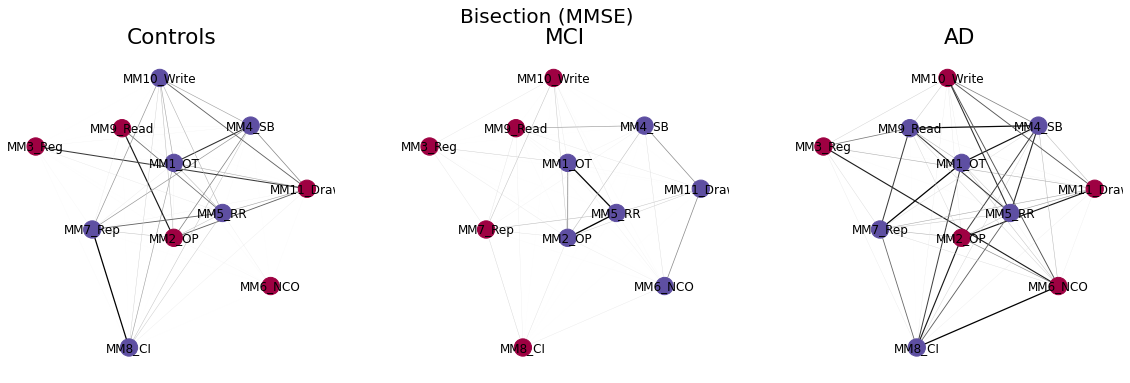

In [178]:
draw_graph_communities(graphs_ls, MMSE_Bisection_partitions, MMSE_labels, pos_MMSE, 'MMSE', 'Bisection')

#### Subgraph metrics

In [179]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10   0.01944     1.0  0.142955          1.0   0.15395  1.0   
1     1      6     15  0.085341     1.0  0.296392          1.0  0.429853  1.0   

                                               Tests    Memory Visuospatial  \
0    [MM2_OP, MM3_Reg, MM6_NCO, MM9_Read, MM11_Draw]       0.2          0.2   
1  [MM1_OT, MM4_SB, MM5_RR, MM7_Rep, MM8_CI, MM10...  0.166667          0.0   

  Orientation Attention Language  
0         0.2       0.0      0.4  
1    0.166667  0.166667      0.5

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10   0.03672     1.0  0.092546          1.0  0.381191  1.0   
1     1      6     15  0.051334     1.0  0.256486          1.0  0.312932  1.0   

                                               Tests    Memory Visuospatial  \
0   [MM3_Reg, MM7_Rep, MM8_CI, MM9_Read, MM10_Write]       0.2          0.0   
1  [MM1_OT, MM2_OP, MM4_SB, MM5_RR, MM6_NCO, MM11...  0.166667     0.166667   

  Orientation Attention  Language  
0         0.0       0.0       0.8  
1    0.333333  0.166667  0.166667

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10   0.09289     1.0  0.252848          1.0  0.462048  1.0   
1     1      6     15  0.096978     1.0  0.390169          1.0  0.550378  1.0   

                                               Tests    Memory Visuospatial  \
0  [MM2_OP, MM3_Reg, MM6_NCO, MM10_Write, MM11_Draw]       0.2          0.2   
1  [MM1_OT, MM4_SB, MM5_RR, MM7_Rep, MM8_CI, MM9_...  0.166667          0.0   

  Orientation Attention Language  
0         0.2       0.0      0.4  
1    0.166667  0.166667      0.5

#### Export results

In [180]:
domains_rep(graphs_ls, MMSE_Bisection_partitions, 'MMSE', 'Bisection')

#### 8.2.4. LABEL PROPAGATION ALGORITHM

In [181]:
MMSE_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]
Modularity Index:  2.220446049250313e-16 

MCI :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]
Modularity Index:  -2.220446049250313e-16 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]
Modularity Index:  -3.3306690738754696e-16 



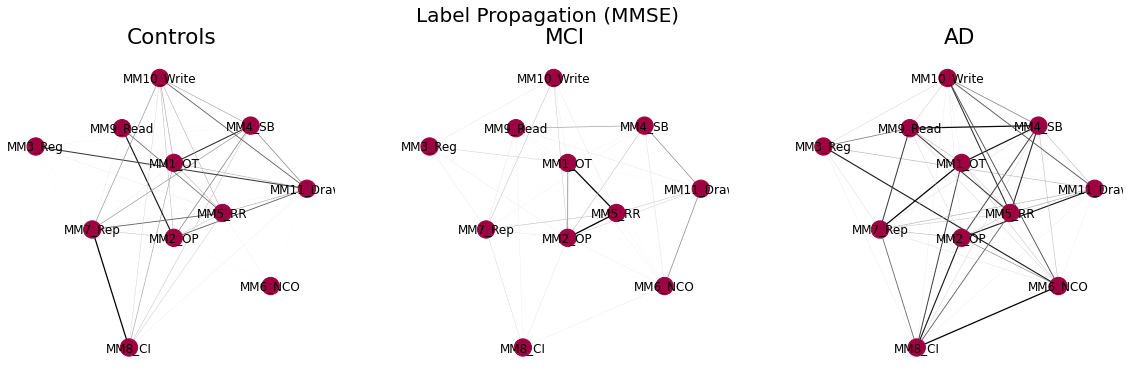

In [182]:
draw_graph_communities(graphs_ls, MMSE_Label_partitions, MMSE_labels, pos_MMSE, 'MMSE', 'Label Propagation')

#### Subgraph metrics

In [183]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density AvDegree Transitivity      AvCC AvGE  \
0     0     11     55  0.03063     1.0    0.384          1.0  0.236921  1.0   

                                               Tests    Memory Visuospatial  \
0  [MM1_OT, MM2_OP, MM3_Reg, MM4_SB, MM5_RR, MM6_...  0.181818     0.090909   

  Orientation Attention  Language  
0    0.181818  0.090909  0.454545

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55  0.027727     1.0  0.291939          1.0  0.169387  1.0   

                                               Tests    Memory Visuospatial  \
0  [MM1_OT, MM2_OP, MM3_Reg, MM4_SB, MM5_RR, MM6_...  0.181818     0.090909   

  Orientation Attention  Language  
0    0.181818  0.090909  0.454545

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55  0.047426     1.0  0.568676          1.0  0.359604  1.0   

                                               Tests    Memory Visuospatial  \
0  [MM1_OT, MM2_OP, MM3_Reg, MM4_SB, MM5_RR, MM6_...  0.181818     0.090909   

  Orientation Attention  Language  
0    0.181818  0.090909  0.454545

#### Export results

In [184]:
domains_rep(graphs_ls, MMSE_Label_partitions, 'MMSE', 'Asyn')

### 8.3. MOCA

In [185]:
graphs_ls = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]

#### 8.3.1. LOUVAIN ALGORITHM

In [186]:
MOCA_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{3, 4, 5}, {1, 2, 7, 8, 9, 11, 13}, {0, 6, 10, 12, 14, 15}]
Modularity Index:  0.1108349210493034 

MCI :  [{10, 4, 5, 6}, {15, 14, 7}, {0, 1, 2, 8, 9, 11}, {3, 12, 13}]
Modularity Index:  0.13511941355966406 

AD :  [{10, 4, 5}, {0, 1, 2, 7, 8, 9, 12, 13}, {3, 11, 6}, {14, 15}]
Modularity Index:  0.09579275850770758 



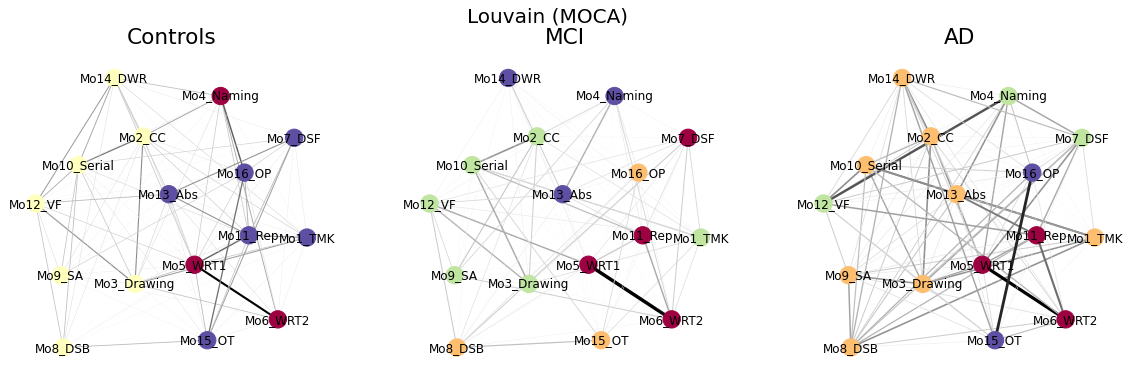

In [187]:
draw_graph_communities(graphs_ls, MOCA_Louvain_partitions, MOCA_labels, pos_MOCA, 'MOCA', 'Louvain')

#### Subgraph metrics

In [188]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3  0.162487     1.0   0.24851          1.0  0.526908  1.0   
1     1      7     21  0.100936     1.0  0.374439          1.0  0.395749  1.0   
2     2      6     15  0.107763     1.0  0.357954          1.0  0.498663  1.0   

                                               Tests    Memory Visuospatial  \
0                   [Mo4_Naming, Mo5_WRT1, Mo6_WRT2]  0.666667          0.0   
1  [Mo2_CC, Mo3_Drawing, Mo8_DSB, Mo9_SA, Mo10_Se...  0.142857     0.285714   
2  [Mo1_TMK, Mo7_DSF, Mo11_Rep, Mo13_Abs, Mo15_OT...       0.0     0.166667   

  Executive Orientation Attention  Language  
0       0.0         0.0       0.0  0.333333  
1       0.0         0.0  0.428571  0.142857  
2  0.166667    0.333333  0.166667  0.166667

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      4      6   0.16665     1.0  0.426132          1.0   0.36182  1.0   
1     1      3      3  0.121783     1.0  0.186575          1.0  0.748542  1.0   
2     2      6     15   0.11603     1.0  0.422068          1.0  0.436152  1.0   
3     3      3      3  0.102545     1.0  0.163164          1.0  0.217906  1.0   

                                               Tests    Memory Visuospatial  \
0            [Mo11_Rep, Mo5_WRT1, Mo6_WRT2, Mo7_DSF]       0.5          0.0   
1                        [Mo8_DSB, Mo15_OT, Mo16_OP]       0.0          0.0   
2  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo9_SA, Mo10_Se...       0.0          0.5   
3                   [Mo4_Naming, Mo13_Abs, Mo14_DWR]  0.333333          0.0   

  Executive Orientation Attention  Language  
0       0.0         0.0      0.25      0.25  
1       0.0    0.666667  0.333333       0.0  
2       0.0         0.0  0.333333  0.166667  
3  0.333333         0.0       0.0  0.333333

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3  0.320578     1.0  0.448859          1.0  0.664588  1.0   
1     1      8     28  0.138399     1.0  0.739245          1.0  0.466876  1.0   
2     2      3      3  0.239491     1.0  0.323857          1.0  0.634918  1.0   
3     3      2      1  0.280114     1.0  0.280114            0       0.0  1.0   

                                               Tests    Memory Visuospatial  \
0                     [Mo11_Rep, Mo5_WRT1, Mo6_WRT2]  0.666667          0.0   
1  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo8_DSB, Mo9_SA...     0.125        0.375   
2                     [Mo12_VF, Mo4_Naming, Mo7_DSF]       0.0          0.0   
3                                 [Mo15_OT, Mo16_OP]       0.0          0.0   

  Executive Orientation Attention  Language  
0       0.0         0.0       0.0  0.333333  
1     0.125         0.0     0.375       0.0  
2       0.0         0.0  0.333333  0.666667  
3       0.0         1.0       0.0       0.0

#### Export results

In [189]:
domains_rep(graphs_ls, MOCA_Louvain_partitions, 'MOCA', 'Louvain')

#### 8.3.2. GREEDY ALGORITHM

In [190]:
MOCA_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({0, 3, 4, 5, 6, 10, 12, 14, 15}), frozenset({1, 2, 7, 8, 9, 11, 13})]
Modularity Index:  0.1099507048993103 

MCI :  [frozenset({0, 1, 2, 8, 9, 11}), frozenset({10, 4, 5, 6}), frozenset({3, 12, 13}), frozenset({15, 14, 7})]
Modularity Index:  0.13511941355966406 

AD :  [frozenset({0, 1, 2, 7, 8, 9, 12, 13}), frozenset({10, 4, 5}), frozenset({3, 11, 6}), frozenset({14, 15})]
Modularity Index:  0.09579275850770758 



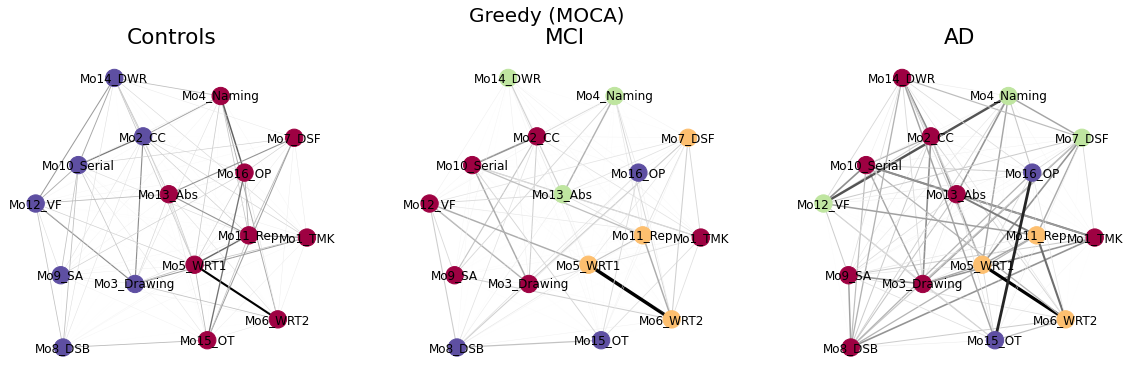

In [191]:
draw_graph_communities(graphs_ls, MOCA_Greedy_partitions, MOCA_labels, pos_MOCA, 'MOCA', 'Greedy')

#### Subgraph metrics

In [192]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      9     36  0.080723     1.0  0.534769          1.0   0.26429  1.0   
1     1      7     21  0.100936     1.0  0.374439          1.0  0.395749  1.0   

                                               Tests    Memory Visuospatial  \
0  [Mo1_TMK, Mo4_Naming, Mo5_WRT1, Mo6_WRT2, Mo7_...  0.222222     0.111111   
1  [Mo2_CC, Mo3_Drawing, Mo8_DSB, Mo9_SA, Mo10_Se...  0.142857     0.285714   

  Executive Orientation Attention  Language  
0  0.111111    0.222222  0.111111  0.222222  
1       0.0         0.0  0.428571  0.142857

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15   0.11603     1.0  0.422068          1.0  0.436152  1.0   
1     1      4      6   0.16665     1.0  0.426132          1.0   0.36182  1.0   
2     2      3      3  0.102545     1.0  0.163164          1.0  0.217906  1.0   
3     3      3      3  0.121783     1.0  0.186575          1.0  0.748542  1.0   

                                               Tests    Memory Visuospatial  \
0  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo9_SA, Mo10_Se...       0.0          0.5   
1            [Mo11_Rep, Mo5_WRT1, Mo6_WRT2, Mo7_DSF]       0.5          0.0   
2                   [Mo4_Naming, Mo13_Abs, Mo14_DWR]  0.333333          0.0   
3                        [Mo8_DSB, Mo15_OT, Mo16_OP]       0.0          0.0   

  Executive Orientation Attention  Language  
0       0.0         0.0  0.333333  0.166667  
1       0.0         0.0      0.25      0.25  
2  0.333333         0.0       0.0  0.333333  
3       0.0    0.666667  0.333333       0.0

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      8     28  0.138399     1.0  0.739245          1.0  0.466876  1.0   
1     1      3      3  0.320578     1.0  0.448859          1.0  0.664588  1.0   
2     2      3      3  0.239491     1.0  0.323857          1.0  0.634918  1.0   
3     3      2      1  0.280114     1.0  0.280114            0       0.0  1.0   

                                               Tests    Memory Visuospatial  \
0  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo8_DSB, Mo9_SA...     0.125        0.375   
1                     [Mo11_Rep, Mo5_WRT1, Mo6_WRT2]  0.666667          0.0   
2                     [Mo12_VF, Mo4_Naming, Mo7_DSF]       0.0          0.0   
3                                 [Mo15_OT, Mo16_OP]       0.0          0.0   

  Executive Orientation Attention  Language  
0     0.125         0.0     0.375       0.0  
1       0.0         0.0       0.0  0.333333  
2       0.0         0.0  0.333333  0.666667  
3       0.0         1.0       0.0       0.0

#### Export results

In [193]:
domains_rep(graphs_ls, MOCA_Greedy_partitions, 'MOCA', 'Greedy')

#### 8.3.3. BISECTION ALGORITHM

In [194]:
MOCA_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({3, 4, 5, 6, 10, 12, 14, 15}, {0, 1, 2, 7, 8, 9, 11, 13})
Modularity Index:  0.10831232610730876 

MCI :  ({0, 1, 2, 3, 8, 9, 11, 12}, {4, 5, 6, 7, 10, 13, 14, 15})
Modularity Index:  0.10688422327993274 

AD :  ({0, 3, 6, 7, 9, 10, 11, 12}, {1, 2, 4, 5, 8, 13, 14, 15})
Modularity Index:  0.07549276647617575 



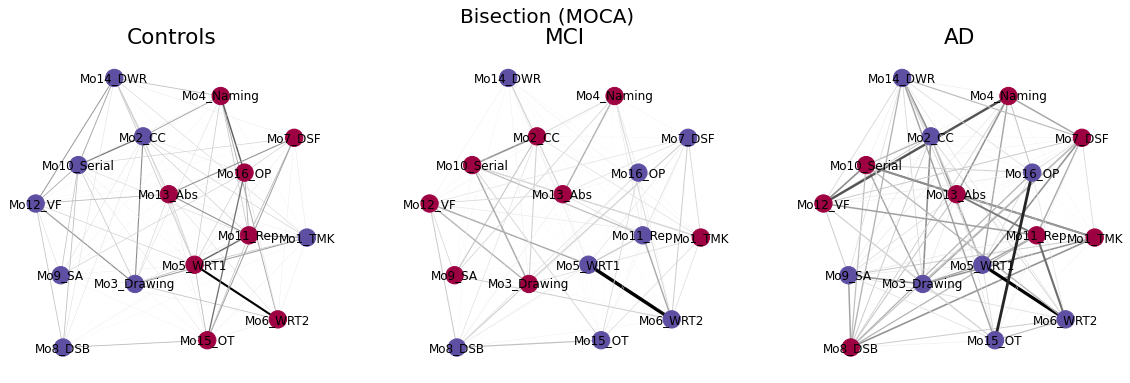

In [195]:
draw_graph_communities(graphs_ls, MOCA_Bisection_partitions, MOCA_labels, pos_MOCA, 'MOCA', 'Bisection')

#### Subgraph metrics

In [196]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      8     28  0.080723     1.0  0.507111          1.0  0.280981  1.0   
1     1      8     28  0.052747     1.0  0.398373          1.0  0.346028  1.0   

                                               Tests Memory Visuospatial  \
0  [Mo4_Naming, Mo5_WRT1, Mo6_WRT2, Mo7_DSF, Mo11...   0.25          0.0   
1  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo8_DSB, Mo9_SA...  0.125        0.375   

  Executive Orientation Attention Language  
0     0.125        0.25     0.125     0.25  
1       0.0         0.0     0.375    0.125

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      8     28  0.064095     1.0   0.48908          1.0  0.334239  1.0   
1     1      8     28  0.062832     1.0  0.466767          1.0  0.156511  1.0   

                                               Tests Memory Visuospatial  \
0  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo4_Naming, Mo9...    0.0        0.375   
1  [Mo5_WRT1, Mo6_WRT2, Mo7_DSF, Mo8_DSB, Mo11_Re...  0.375          0.0   

  Executive Orientation Attention Language  
0     0.125         0.0      0.25     0.25  
1       0.0        0.25      0.25    0.125

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      8     28  0.107974     1.0  0.748094          1.0  0.368598  1.0   
1     1      8     28  0.120423     1.0  0.707898          1.0  0.259141  1.0   

                                               Tests Memory Visuospatial  \
0  [Mo1_TMK, Mo4_Naming, Mo7_DSF, Mo8_DSB, Mo10_S...    0.0        0.125   
1  [Mo2_CC, Mo3_Drawing, Mo5_WRT1, Mo6_WRT2, Mo9_...  0.375         0.25   

  Executive Orientation Attention Language  
0     0.125         0.0     0.375    0.375  
1       0.0        0.25     0.125      0.0

#### Export results

In [197]:
domains_rep(graphs_ls, MOCA_Bisection_partitions, 'MOCA', 'Bisection')

#### 8.3.4. LABEL PROPAGATION ALGORITHM

In [198]:
MOCA_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}]
Modularity Index:  -1.1102230246251565e-16 

MCI :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}]
Modularity Index:  -4.440892098500626e-16 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}]
Modularity Index:  -2.220446049250313e-16 



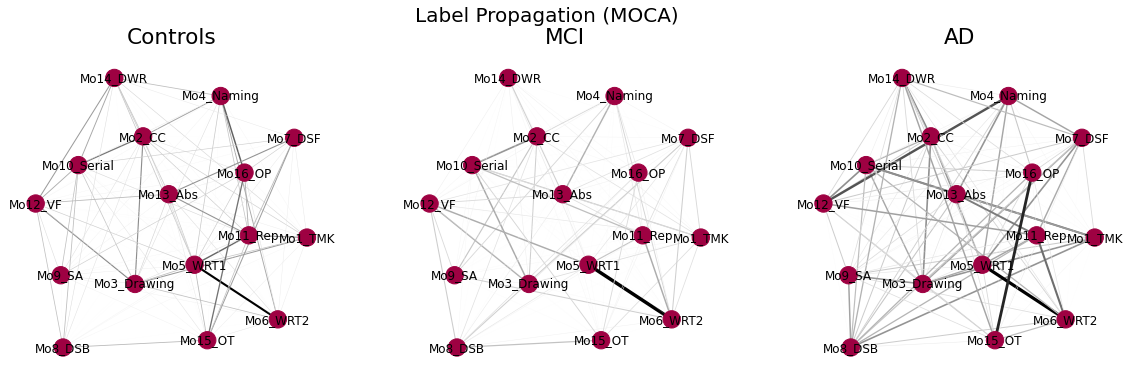

In [199]:
draw_graph_communities(graphs_ls, MOCA_Label_partitions, MOCA_labels, pos_MOCA, 'MOCA', 'Label Propagation')

#### Subgraph metrics

In [200]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density AvDegree Transitivity      AvCC AvGE  \
0     0     16    120  0.050079     1.0  0.74098          1.0  0.182495  1.0   

                                               Tests  Memory Visuospatial  \
0  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo4_Naming, Mo5...  0.1875       0.1875   

  Executive Orientation Attention Language  
0    0.0625       0.125      0.25   0.1875

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     16    120  0.036204     1.0  0.787374          1.0  0.112654  1.0   

                                               Tests  Memory Visuospatial  \
0  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo4_Naming, Mo5...  0.1875       0.1875   

  Executive Orientation Attention Language  
0    0.0625       0.125      0.25   0.1875

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity     AvCC AvGE  \
0     0     16    120  0.045455     1.0  1.264718          1.0  0.20536  1.0   

                                               Tests  Memory Visuospatial  \
0  [Mo1_TMK, Mo2_CC, Mo3_Drawing, Mo4_Naming, Mo5...  0.1875       0.1875   

  Executive Orientation Attention Language  
0    0.0625       0.125      0.25   0.1875

#### Export results

In [201]:
domains_rep(graphs_ls, MOCA_Label_partitions, 'MOCA', 'Asyn')

### 8.4. Merged

In [202]:
graphs_ls = [merged_CN_graph, merged_MCI_graph, merged_AD_graph]

#### 8.4.1. LOUVAIN ALGORITHM

In [203]:
merged_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{1, 33, 34, 36, 21, 26, 14, 31}, {2, 37, 38, 6, 19, 24, 25, 28}, {4, 5, 9, 10, 11, 12, 16, 18, 27}, {32, 35, 13, 17, 22, 23, 29, 30}, {0, 3, 20, 7, 39, 8, 15}]
Modularity Index:  0.09793737886561726 

MCI :  [{0, 17, 3, 20, 7, 13}, {38, 6, 39}, {32, 33, 2, 1, 5, 37, 8, 9, 10, 11, 15, 16, 21, 22, 24, 25, 26}, {18, 4, 36, 23, 27, 30, 31}, {34, 29, 35, 19, 12, 28, 14}]
Modularity Index:  0.1151523973490664 

AD :  [{32, 2, 9, 13, 14, 15, 16, 20, 22, 23, 25, 26}, {18, 38, 39, 8, 6, 10, 11}, {0, 3, 37, 7, 12, 17, 19, 28, 29, 30, 31}, {1, 33, 35, 4, 5, 36, 34, 21, 24, 27}]
Modularity Index:  0.09057866895432677 



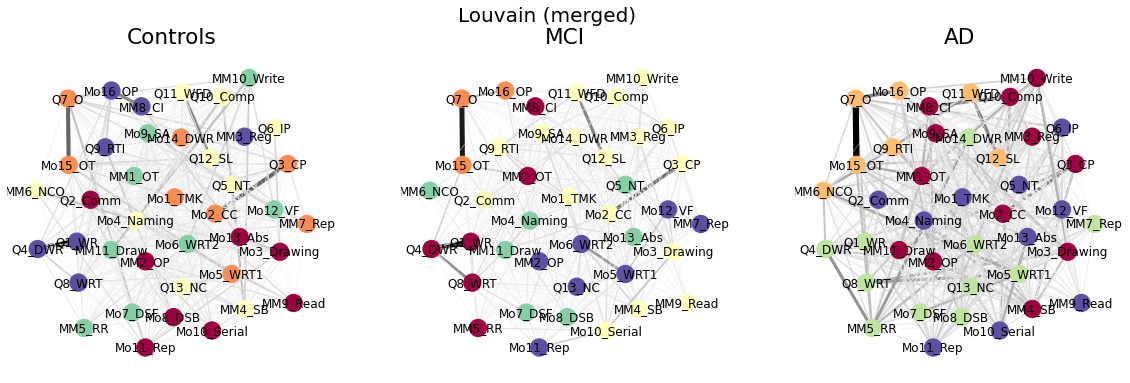

In [204]:
draw_graph_communities(graphs_ls, merged_Louvain_partitions, merged_labels, pos_merged, 'merged', 'Louvain')

#### Subgraph metrics

In [205]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter   Density  AvDegree Transitivity      AvCC  \
0     0      8     28  0.125199       1.0  0.621175          1.0  0.388136   
1     1      8     28   0.09604       1.0  0.746274          1.0  0.207922   
2     2      9     36  0.076827       1.0  0.645029          1.0    0.1875   
3     3      8     28  0.106723       1.0  0.561745          1.0  0.303304   
4     4      7     19  0.166581  0.904762  0.727689     0.906977  0.168667   

       AvGE                                              Tests    Memory  \
0       1.0  [Q2_Comm, Mo11_Rep, Mo10_Serial, Mo13_Abs, MM2...       0.0   
1       1.0  [Q3_CP, Mo14_DWR, Mo15_OT, Q7_O, MM7_Rep, Mo1_...      0.25   
2       1.0  [Q5_NT, Q6_IP, Q10_Comp, Q11_WFD, Q12_SL, Q13_...       0.0   
3       1.0  [Mo9_SA, Mo12_VF, MM1_OT, MM5_RR, MM10_Write, ...      0.25   
4  0.952381  [Q1_WR, Q4_DWR, Mo16_OP, Q8_WRT, Q9_RTI, MM3_R...  0.714286   

  Visuospatial Executive Orientation Attention  Language  
0        0.125     0.125       0.125      0.25     0.375  
1         0.25     0.125        0.25       0.0     0.125  
2          0.0  0.111111         0.0  0.222222  0.666667  
3        0.125       0.0       0.125      0.25      0.25  
4          0.0       0.0    0.142857       0.0  0.142857

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15  0.134645     1.0  0.629488          1.0  0.174465  1.0   
1     1      3      3  0.266004     1.0   0.51058          1.0  0.356947  1.0   
2     2     17    136  0.044734     1.0   0.97342          1.0  0.127722  1.0   
3     3      7     21  0.100162     1.0  0.444341          1.0  0.407695  1.0   
4     4      7     21  0.102156     1.0  0.508748          1.0  0.274076  1.0   

                                               Tests    Memory Visuospatial  \
0    [Q1_WR, Q4_DWR, Q8_WRT, MM1_OT, MM5_RR, MM8_CI]  0.666667          0.0   
1                           [Mo16_OP, Mo15_OT, Q7_O]       0.0          0.0   
2  [Mo9_SA, Mo10_Serial, Q3_CP, Q2_Comm, Q6_IP, M...  0.176471     0.176471   
3  [Q5_NT, Mo13_Abs, MM6_NCO, MM11_Draw, Mo4_Nami...       0.0     0.142857   
4  [Mo11_Rep, Mo12_VF, Q13_NC, MM2_OP, MM7_Rep, M...  0.285714          0.0   

  Executive Orientation Attention  Language  
0       0.0    0.166667       0.0  0.166667  
1       0.0         1.0       0.0       0.0  
2  0.117647         0.0  0.176471  0.352941  
3  0.142857         0.0  0.285714  0.428571  
4       0.0    0.142857  0.142857  0.428571

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     12     66   0.14713     1.0  1.349884          1.0  0.294319  1.0   
1     1      7     21  0.156204     1.0  1.016992          1.0  0.202363  1.0   
2     2     11     55  0.141277     1.0  1.230047          1.0  0.314867  1.0   
3     3     10     45  0.138613     1.0  0.956352          1.0   0.37172  1.0   

                                               Tests    Memory Visuospatial  \
0  [Mo9_SA, Q3_CP, Q10_Comp, MM1_OT, MM2_OP, MM3_...  0.083333         0.25   
1  [Q7_O, Mo15_OT, Q9_RTI, Mo16_OP, Q11_WFD, Q12_...  0.142857          0.0   
2  [Q1_WR, Q4_DWR, Mo14_DWR, Q8_WRT, Q13_NC, MM5_...  0.636364          0.0   
3  [Q2_Comm, Mo10_Serial, Mo12_VF, Q5_NT, Q6_IP, ...       0.0          0.1   

  Executive Orientation Attention  Language  
0  0.083333    0.166667  0.166667      0.25  
1       0.0    0.428571       0.0  0.428571  
2       0.0         0.0  0.272727  0.090909  
3       0.2         0.0       0.1       0.6

#### Export results

In [206]:
domains_rep(graphs_ls, merged_Louvain_partitions, 'merged', 'Louvain')

#### 8.4.2. GREEDY ALGORITHM

In [207]:
merged_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({1, 34, 4, 36, 5, 9, 14, 16, 18, 19, 21, 24, 26, 27}), frozenset({32, 17, 28, 35, 12, 29, 30}), frozenset({0, 3, 20, 39, 7, 13, 15}), frozenset({33, 37, 8, 10, 11, 31}), frozenset({2, 23, 38, 6, 22, 25})]
Modularity Index:  0.10021750502111575 

MCI :  [frozenset({34, 35, 4, 36, 12, 18, 19, 21, 27, 28, 29, 30, 31}), frozenset({33, 8, 9, 10, 11, 15, 22, 24, 26}), frozenset({16, 32, 2, 1, 5, 37, 23, 25}), frozenset({0, 17, 3, 20, 7, 13, 14}), frozenset({38, 6, 39})]
Modularity Index:  0.12020936991983261 

AD :  [frozenset({32, 2, 9, 13, 14, 15, 16, 20, 23, 24, 25, 31}), frozenset({0, 3, 7, 8, 10, 11, 18, 19, 22, 26, 28}), frozenset({1, 33, 35, 4, 36, 5, 12, 21, 27, 30}), frozenset({17, 34, 37, 38, 6, 39, 29})]
Modularity Index:  0.0918521601744821 



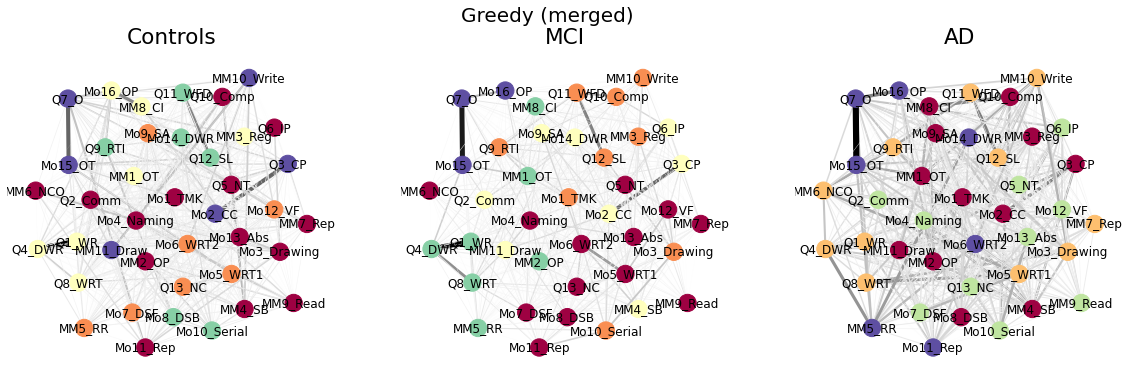

In [208]:
draw_graph_communities(graphs_ls, merged_Greedy_partitions, merged_labels, pos_merged, 'merged', 'Greedy')

#### Subgraph metrics

In [209]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     14     91  0.079515       1.0  0.977722          1.0  0.272001   
1     1      7     21  0.105977       1.0  0.459632          1.0  0.331226   
2     2      7     19  0.158246  0.904762  0.705191     0.906977  0.163864   
3     3      6     15  0.103308       1.0  0.503466          1.0   0.23737   
4     4      6     15  0.139286       1.0  0.700361          1.0  0.272903   

       AvGE                                              Tests    Memory  \
0       1.0  [Q2_Comm, Mo11_Rep, Q5_NT, Q6_IP, Mo13_Abs, Q1...       0.0   
1       1.0  [Mo9_SA, Mo12_VF, Q13_NC, MM5_RR, Mo5_WRT1, Mo...  0.428571   
2  0.952381  [Q1_WR, Q4_DWR, Q8_WRT, Mo16_OP, MM1_OT, MM3_R...  0.571429   
3       1.0  [Mo10_Serial, Mo14_DWR, Q9_RTI, Q11_WFD, Q12_S...  0.333333   
4       1.0  [Q3_CP, Q7_O, Mo15_OT, MM10_Write, MM11_Draw, ...       0.0   

  Visuospatial Executive Orientation Attention  Language  
0     0.142857  0.142857    0.071429  0.071429  0.571429  
1          0.0       0.0         0.0  0.428571  0.142857  
2          0.0       0.0    0.285714       0.0  0.142857  
3          0.0       0.0         0.0  0.333333  0.333333  
4     0.333333  0.166667    0.333333       0.0  0.166667

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78  0.069318     1.0  0.739926          1.0  0.195524  1.0   
1     1      9     36  0.095988     1.0   0.67353          1.0  0.222177  1.0   
2     2      8     28  0.081137     1.0  0.557407          1.0  0.169926  1.0   
3     3      7     21  0.134645     1.0  0.621483          1.0  0.144677  1.0   
4     4      3      3  0.266004     1.0   0.51058          1.0  0.356947  1.0   

                                               Tests    Memory Visuospatial  \
0  [Mo11_Rep, Mo12_VF, Q5_NT, Mo13_Abs, Q13_NC, M...  0.153846          0.0   
1  [Mo10_Serial, Q9_RTI, Q10_Comp, Q11_WFD, Q12_S...  0.222222     0.222222   
2  [Mo9_SA, Q2_Comm, Q3_CP, Q6_IP, Mo14_DWR, MM4_...     0.125         0.25   
3  [Q1_WR, Q4_DWR, Q8_WRT, MM1_OT, MM2_OP, MM5_RR...  0.571429          0.0   
4                           [Mo16_OP, Mo15_OT, Q7_O]       0.0          0.0   

  Executive Orientation Attention  Language  
0  0.076923         0.0  0.230769  0.538462  
1       0.0         0.0  0.111111  0.444444  
2      0.25         0.0      0.25     0.125  
3       0.0    0.285714       0.0  0.142857  
4       0.0         1.0       0.0       0.0

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     12     66  0.122417     1.0  1.300546          1.0  0.278903  1.0   
1     1     11     55  0.109797     1.0  1.278475          1.0  0.294285  1.0   
2     2     10     45   0.12148     1.0  0.959158          1.0  0.363637  1.0   
3     3      7     21  0.242833     1.0  1.026237          1.0  0.230676  1.0   

                                               Tests    Memory Visuospatial  \
0  [Mo9_SA, Q3_CP, Q10_Comp, MM1_OT, MM2_OP, MM3_...  0.083333         0.25   
1  [Q1_WR, Q4_DWR, Q8_WRT, Q9_RTI, Q11_WFD, Q12_S...  0.454545     0.090909   
2  [Q2_Comm, Mo10_Serial, Mo12_VF, Q5_NT, Mo13_Ab...       0.0          0.0   
3  [Mo11_Rep, Mo14_DWR, Mo15_OT, Q7_O, Mo16_OP, M...  0.428571          0.0   

  Executive Orientation Attention  Language  
0  0.083333    0.166667      0.25  0.166667  
1       0.0         0.0       0.0  0.454545  
2       0.2         0.0       0.3       0.5  
3       0.0    0.428571       0.0  0.142857

In [210]:
domains_rep(graphs_ls, merged_Greedy_partitions, 'merged', 'Greedy')

#### 8.4.3. BISECTION ALGORITHM

In [211]:
merged_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({1, 2, 4, 6, 8, 10, 11, 14, 15, 19, 21, 24, 25, 30, 31, 32, 33, 34, 37, 38}, {0, 3, 5, 7, 9, 12, 13, 16, 17, 18, 20, 22, 23, 26, 27, 28, 29, 35, 36, 39})
Modularity Index:  0.07714473476248354 

MCI :  ({0, 1, 3, 4, 7, 8, 12, 13, 14, 15, 17, 19, 20, 22, 28, 29, 34, 35, 36, 37}, {2, 5, 6, 9, 10, 11, 16, 18, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 38, 39})
Modularity Index:  0.08188097525547411 

AD :  ({0, 3, 7, 8, 10, 11, 12, 16, 18, 19, 21, 22, 26, 27, 28, 29, 30, 31, 32, 39}, {1, 2, 4, 5, 6, 9, 13, 14, 15, 17, 20, 23, 24, 25, 33, 34, 35, 36, 37, 38})
Modularity Index:  0.07668544339234146 



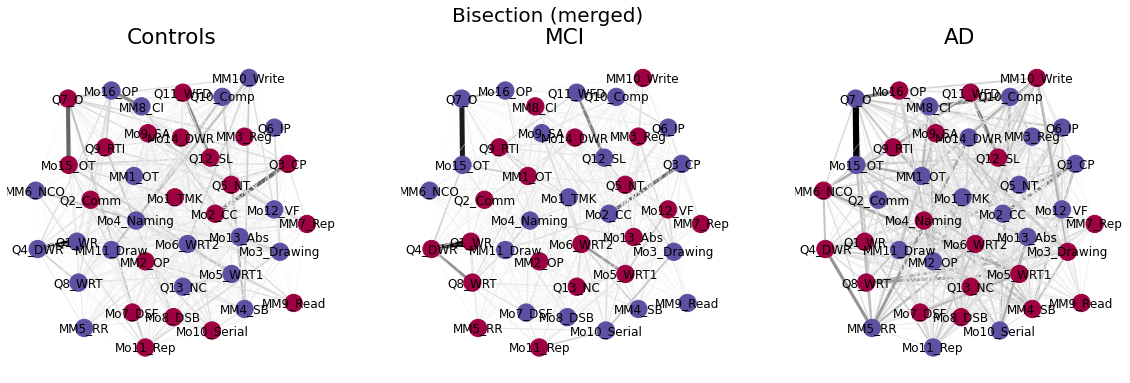

In [212]:
draw_graph_communities(graphs_ls, merged_Bisection_partitions, merged_labels, pos_merged, 'merged', 'Bisection')

#### Subgraph metrics

In [213]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     20    179  0.053337  0.942105  1.270812     0.971419  0.137258   
1     1     20    190  0.033094       1.0  1.268427          1.0  0.087813   

       AvGE                                              Tests Memory  \
0  0.971053  [Q2_Comm, Q3_CP, Q5_NT, Q7_O, Q9_RTI, Q11_WFD,...   0.15   
1       1.0  [Q1_WR, Q4_DWR, Q6_IP, Q8_WRT, Q10_Comp, Q13_N...    0.3   

  Visuospatial Executive Orientation Attention Language  
0          0.1      0.05        0.15       0.2     0.35  
1          0.1       0.1         0.1       0.1      0.3

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity     AvCC AvGE  \
0     0     20    190  0.030017     1.0  1.090025          1.0  0.07993  1.0   
1     1     20    190  0.049434     1.0  1.066221          1.0  0.08427  1.0   

                                               Tests Memory Visuospatial  \
0  [Q1_WR, Q2_Comm, Q4_DWR, Q5_NT, Q8_WRT, Q9_RTI...   0.45          0.0   
1  [Q3_CP, Q6_IP, Q7_O, Q10_Comp, Q11_WFD, Q12_SL...    0.0          0.2   

  Executive Orientation Attention Language  
0      0.05         0.1      0.05     0.35  
1       0.1        0.15      0.25      0.3

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity     AvCC AvGE  \
0     0     20    190  0.084489     1.0  1.966951          1.0  0.23957  1.0   
1     1     20    190  0.066541     1.0  1.866885          1.0  0.12702  1.0   

                                               Tests Memory Visuospatial  \
0  [Q1_WR, Q4_DWR, Q8_WRT, Q9_RTI, Q11_WFD, Q12_S...    0.3         0.05   
1  [Q2_Comm, Q3_CP, Q5_NT, Q6_IP, Q7_O, Q10_Comp,...   0.15         0.15   

  Executive Orientation Attention Language  
0       0.0        0.05      0.25     0.35  
1      0.15         0.2      0.05      0.3

#### Export results

In [214]:
domains_rep(graphs_ls, merged_Bisection_partitions, 'merged', 'Bisection')

#### 8.4.4. LABEL PROPAGATION ALGORITHM

In [215]:
merged_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}]
Modularity Index:  3.3306690738754696e-16 

MCI :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}]
Modularity Index:  5.551115123125783e-16 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}]
Modularity Index:  -6.661338147750939e-16 



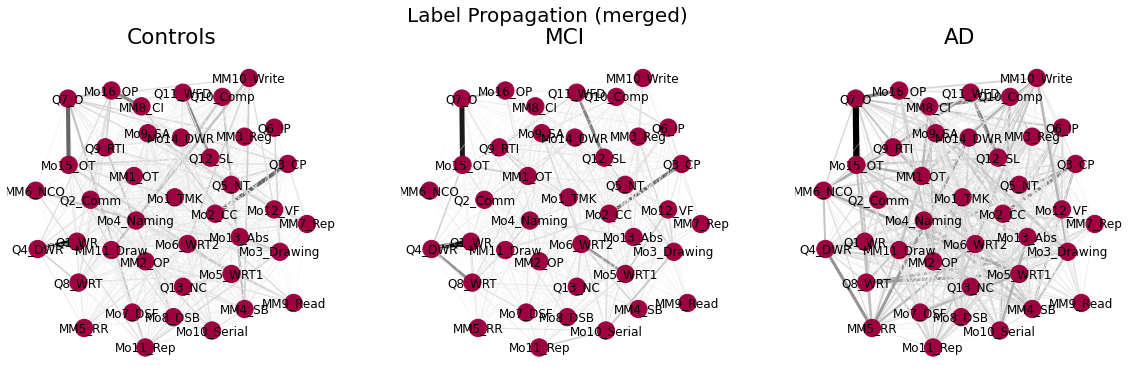

In [216]:
draw_graph_communities(graphs_ls, merged_Label_partitions, merged_labels, pos_merged, 'merged', 'Label Propagation')

In [217]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     40    756  0.02798  0.969231  2.199828     0.987185  0.075977   

       AvGE                                              Tests Memory  \
0  0.984615  [Q1_WR, Q2_Comm, Q3_CP, Q4_DWR, Q5_NT, Q6_IP, ...  0.225   

  Visuospatial Executive Orientation Attention Language  
0          0.1     0.075       0.125      0.15    0.325

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity    AvCC AvGE  \
0     0     40    780  0.014572     1.0  1.852759          1.0  0.0658  1.0   

                                               Tests Memory Visuospatial  \
0  [Q1_WR, Q2_Comm, Q3_CP, Q4_DWR, Q5_NT, Q6_IP, ...  0.225          0.1   

  Executive Orientation Attention Language  
0     0.075       0.125      0.15    0.325

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     40    780  0.031649     1.0  3.323374          1.0  0.108622  1.0   

                                               Tests Memory Visuospatial  \
0  [Q1_WR, Q2_Comm, Q3_CP, Q4_DWR, Q5_NT, Q6_IP, ...  0.225          0.1   

  Executive Orientation Attention Language  
0     0.075       0.125      0.15    0.325

#### Export results

In [218]:
domains_rep(graphs_ls, merged_Label_partitions, 'merged', 'Asyn')